<font size="4"> <b> • DOMAIN: </b>Banking and finance</font>

<font size="4"> <b> • CONTEXT: </b>A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee
majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the
borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an
average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit
with same budget as per last campaign.</font>

<font size="4"> <b> • DATA DESCRIPTION: </b>The data consists of the following attributes

1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.</font>

<font size="4"> <b> • PROJECT OBJECTIVE: </b>Build an AIML model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.
    
Steps and tasks: [ Total Score: 30 points ]
    

1 Import and warehouse data:
    
>• Import all the given datasets and explore shape and size of each.
    
>• Merge all datasets onto one and explore final shape and size.
    
2. Data cleansing:
    
>• Explore and if required correct the datatypes of each attribute
    
>• Explore for null values in the attributes and if required drop or impute values.
    
3. Data analysis & visualisation:
    
>• Perform detailed statistical analysis on the data.
    
>• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.
    
4. Data pre-processing:
    
>• Segregate predictors vs target attributes
    
>• Check for target balancing and fix it if found imbalanced.
    
>• Perform train-test split.
    
5. Model training, testing and tuning:
    
>• Design and train a Logistic regression and Naive Bayes classifiers.
    
>• Display the classification accuracies for train and test data.
    
>• Display and explain the classification report in detail.
    
>• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.
    
6. Conclusion and improvisation:
    
>• Write your conclusion on the results.
    
>• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future.

</font>
 

### Answer: 

<font size="5"><p style="color:black"> <b> 1. Import and warehouse data:</p></font>

In [151]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">1.1 Import all the given datasets and explore shape and size of each.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.1 Dataset 1

In [152]:
df1 = pd.read_csv('Part2 - Data1.csv') # Import the dataset 
df1.head()  # view the first 5 rows of the data

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [153]:
df1.shape

(5000, 8)

In [154]:
df1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.2 Dataset 2

In [155]:
df2 = pd.read_csv('Part2 -Data2.csv') # Import the dataset 
df2.head()  # view the first 5 rows of the data

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [156]:
df2.shape

(5000, 7)

In [157]:
df2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">1.2 Merge all datasets onto one and explore final shape and size.

In [158]:
# Merging dataset 1, and 2
df = pd.merge(df1, df2, on="ID", how="outer")
df

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [159]:
df.shape

(5000, 14)

In [160]:
df.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB




<font size="5"><p style="color:black"> <b> 2. Data cleansing:</p></font>





<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.1 Explore and if required correct the datatypes of each attribute

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.1 Screening for duplicates

In [162]:
# Identify duplicates records in the data
dupe = df.duplicated()
sum(dupe)

0

* There are no duplicate values in the dataset

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.2 Screening for duplicate index

In [163]:
df.index.is_unique

True

In [164]:
index_series = pd.Series(Data.index.values)
i = index_series.value_counts()
i

0      1
204    1
211    1
210    1
209    1
      ..
102    1
101    1
100    1
99     1
309    1
Length: 310, dtype: int64

In [165]:
df #before with duplicate index values

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [166]:
resetDataind = df.reset_index(drop=True, inplace = True)
resetDataind 

In [167]:
df #after index values are fixed

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [168]:
df.index.is_unique #now it shows 'True' indicating that there are no more duplicate indexes

True

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.2 Explore for null values in the attributes and if required drop or impute values.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.1 Screening for Missing Values

In [169]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
LoanOnCard,20,0.004
ID,0,0.000
Age,0,0.000
CustomerSince,0,0.000
HighestSpend,0,0.000
ZipCode,0,0.000
HiddenScore,0,0.000
MonthlyAverageSpend,0,0.000
Level,0,0.000
Mortgage,0,0.000


In [170]:
df.isnull().sum() #To check whether there are missing values

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [171]:
df.isnull().sum().sum()   # Total number of recognised missing values in the entire dataframe

20

* It is observed that there 20 missing values in the target attribute, hence, we can use the model for prediction of this after optimization.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.2 Finding the city for the ZipCode

In [172]:
!python -m pip install zipcodes

In [173]:
import zipcodes as zcode # to get zipcodes

In [174]:
df.ZipCode.nunique()

467

In [175]:
# get unique zipcodes
list_zipcode=df.ZipCode.unique()

In [176]:
#here i am creating a dictionary of county by using library zipcode and matching method.
dict_zip={}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county)==1: # if  zipcode is present then get county else, assign zipcode to county
        county=my_city_county[0].get('county')
    else:
        county=zipcode
    
    dict_zip.update({zipcode:county})

In [177]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

In [178]:
dict_zip.update({92717:'Orange County'})
dict_zip.update({92634:'Orange County'})

In [179]:
df['County']=df['ZipCode'].map(dict_zip)

In [180]:
df.County.nunique()

40

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
 14  County               5000 non-null   object 
dtypes: float64(2), int64(12), object(1)
me

In [182]:
df

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard,County
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN,Los Angeles County
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN,Los Angeles County
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN,Alameda County
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN,San Francisco County
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN,Los Angeles County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0,Orange County
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0,San Diego County
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0,Ventura County
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0,Los Angeles County


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.3 Changing the datatypes for the attributes

In [183]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
County                  object
dtype: object

In [184]:
# only attributes with very few magnitude values were converted to categorical as they wont be that useful in analysis
df['HiddenScore'] = pd.Categorical(df.HiddenScore)
df['Level'] = pd.Categorical(df.Level)
df['Security'] = pd.Categorical(df.Security)
df['FixedDepositAccount'] = pd.Categorical(df.FixedDepositAccount)
df['InternetBanking'] = pd.Categorical(df.InternetBanking)
df['CreditCard'] = pd.Categorical(df.CreditCard)
df['LoanOnCard'] = pd.Categorical(df.LoanOnCard)
df['ZipCode'] = pd.Categorical(df.ZipCode)
df

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard,County
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN,Los Angeles County
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN,Los Angeles County
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN,Alameda County
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN,San Francisco County
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN,Los Angeles County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0,Orange County
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0,San Diego County
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0,Ventura County
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0,Los Angeles County


* Since there are many counties, turning them into regions would be much easier for the model

In [185]:
counties = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',             
'San Bernardino County':'Southern',       
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',           
'Riverside County':'Southern',            
'Kern County':'Southern',                 
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',     
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',               
'Placer County':'Central',                
'Butte County':'Superior',               
'Shasta County':'Superior',                
'El Dorado County':'Central',             
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',           
'Mendocino County':'Superior',             
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                 
'Napa County':'Bay Area',                   
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'
}

In [186]:
df['Regions'] = df['County'].map(counties)

In [187]:
df['Regions'].unique()

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior',
       'Central', nan], dtype=object)

In [188]:
df.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                category
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
County                   object
Regions                  object
dtype: object

In [189]:
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
County                  0
Regions                 1
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.4 Dropping the rows with null values rows 

In [190]:
df3 = df.copy()
df3.dropna(axis=0,inplace=True)
df3

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard,County,Regions
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0,Ventura County,Southern
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0,Alameda County,Bay Area
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0,Los Angeles County,Los Angeles Region
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0,Santa Barbara County,Southern
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0,Marin County,Bay Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0,Orange County,Southern
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0,San Diego County,Southern
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0,Ventura County,Southern
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0,Los Angeles County,Los Angeles Region


In [191]:
df3.reset_index(drop=True, inplace = True) #Resetting the index

In [192]:
df3 #after resetting the index

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard,County,Regions
0,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0,Ventura County,Southern
1,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0,Alameda County,Bay Area
2,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0,Los Angeles County,Los Angeles Region
3,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0,Santa Barbara County,Southern
4,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0,Marin County,Bay Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0,Orange County,Southern
4975,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0,San Diego County,Southern
4976,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0,Ventura County,Southern
4977,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0,Los Angeles County,Los Angeles Region


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.6 Dropping 'ID' column

In [193]:
df3 = df3.drop(['ID'],axis=1)
df3

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard,County,Regions
0,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0,Ventura County,Southern
1,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0,Alameda County,Bay Area
2,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0,Los Angeles County,Los Angeles Region
3,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0,Santa Barbara County,Southern
4,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0,Marin County,Bay Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0,Orange County,Southern
4975,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0,San Diego County,Southern
4976,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0,Ventura County,Southern
4977,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0,Los Angeles County,Los Angeles Region


* ID column is dropped as it wont be useful in analysis and statistics

In [194]:
df3.dtypes

Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                category
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
County                   object
Regions                  object
dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.7 Creating a numerical dataset by removing all categorical attributes

In [195]:
dfnumeric = df3.copy()

In [196]:
dfnumeric = dfnumeric.drop(['ZipCode','County','HiddenScore','Level','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard','Regions'],axis=1)
dfnumeric

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage
0,34,9,180,8.9,0
1,65,39,105,2.4,0
2,29,5,45,0.1,0
3,48,23,114,3.8,0
4,59,32,40,2.5,0
...,...,...,...,...,...
4974,29,3,40,1.9,0
4975,30,4,15,0.4,85
4976,63,39,24,0.3,0
4977,65,40,49,0.5,0


* 'dfnumeric' dataset is a purely numerical dataset for statistical and data analysis

In [197]:
dfnumeric.dtypes

Age                      int64
CustomerSince            int64
HighestSpend             int64
MonthlyAverageSpend    float64
Mortgage                 int64
dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.8 Creating a Categorical dataset by removing all numerical attributes

In [198]:
dfcategorical = df3.copy()

In [199]:
dfcategorical = dfcategorical.drop(['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage'],axis=1)
dfcategorical

,ZipCode,HiddenScore,Level,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard,County,Regions
0,93023,1,3,0,0,0,0,1.0,Ventura County,Southern
1,94710,4,3,0,0,0,0,0.0,Alameda County,Bay Area
2,90277,3,2,0,0,1,0,0.0,Los Angeles County,Los Angeles Region
3,93106,2,3,1,0,0,0,0.0,Santa Barbara County,Southern
4,94920,4,2,0,0,1,0,0.0,Marin County,Bay Area
...,...,...,...,...,...,...,...,...,...,...
4974,92697,1,3,0,0,1,0,0.0,Orange County,Southern
4975,92037,4,1,0,0,1,0,0.0,San Diego County,Southern
4976,93023,2,3,0,0,0,0,0.0,Ventura County,Southern
4977,90034,3,2,0,0,1,0,0.0,Los Angeles County,Los Angeles Region


In [200]:
dfcategorical.dtypes

ZipCode                category
HiddenScore            category
Level                  category
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
County                   object
Regions                  object
dtype: object

<font size="5"><p style="color:black"> <b> 3. Data analysis & visualisation:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">3.1 Perform detailed statistical analysis on the data

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.1 Mean, Median and Mode

In [201]:
dfnumeric.mean() # Mean of each numeric attribute

Age                    45.351476
CustomerSince          20.116690
HighestSpend           73.863025
MonthlyAverageSpend     1.939805
Mortgage               56.601125
dtype: float64

In [202]:
dfnumeric.median() #Median of each numeric attribute

Age                    45.0
CustomerSince          20.0
HighestSpend           64.0
MonthlyAverageSpend     1.5
Mortgage                0.0
dtype: float64

In [203]:
dfnumeric.mode(axis=0, numeric_only = True).T  # Prints the mode of the numeric attributes

,0
Age,43.0
CustomerSince,32.0
HighestSpend,44.0
MonthlyAverageSpend,0.3
Mortgage,0.0


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.3 Quantile 25%, 50% and 75%

In [204]:
dfnumeric.quantile(q=0.25)

Age                    35.0
CustomerSince          10.0
HighestSpend           39.0
MonthlyAverageSpend     0.7
Mortgage                0.0
Name: 0.25, dtype: float64

In [205]:
dfnumeric.quantile(q=0.50)

Age                    45.0
CustomerSince          20.0
HighestSpend           64.0
MonthlyAverageSpend     1.5
Mortgage                0.0
Name: 0.5, dtype: float64

In [206]:
dfnumeric.quantile(q=0.75)

Age                     55.00
CustomerSince           30.00
HighestSpend            98.00
MonthlyAverageSpend      2.55
Mortgage               101.00
Name: 0.75, dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.4 Min, Max, Variance, Standard Deviation, Covariance, and Correlation

In [207]:
dfnumeric.min() # Minimum Values

Age                    23.0
CustomerSince          -3.0
HighestSpend            8.0
MonthlyAverageSpend     0.0
Mortgage                0.0
dtype: float64

In [208]:
dfnumeric.max() # Maximum values

Age                     67.0
CustomerSince           43.0
HighestSpend           224.0
MonthlyAverageSpend     10.0
Mortgage               635.0
dtype: float64

In [209]:
dfnumeric.var() #Variance

Age                      131.448155
CustomerSince            131.553074
HighestSpend            2122.318317
MonthlyAverageSpend        3.062777
Mortgage               10372.165093
dtype: float64

In [210]:
dfnumeric.std() #Standard Deviation

Age                     11.465084
CustomerSince           11.469659
HighestSpend            46.068626
MonthlyAverageSpend      1.750079
Mortgage               101.843827
dtype: float64

In [211]:
dfnumeric.cov() #Covariance

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage
Age,131.448155,130.739010,-28.968520,-1.039857,-15.433702
CustomerSince,130.739010,131.553074,-24.306432,-1.000757,-13.238500
HighestSpend,-28.968520,-24.306432,2122.318317,52.087454,971.869419
MonthlyAverageSpend,-1.039857,-1.000757,52.087454,3.062777,19.641449
Mortgage,-15.433702,-13.238500,971.869419,19.641449,10372.165093


In [212]:
dfnumeric.corr() #Correlation

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage
Age,1.000000,0.994208,-0.054846,-0.051825,-0.013218
CustomerSince,0.994208,1.000000,-0.046001,-0.049856,-0.011333
HighestSpend,-0.054846,-0.046001,1.000000,0.646056,0.207142
MonthlyAverageSpend,-0.051825,-0.049856,0.646056,1.000000,0.110200
Mortgage,-0.013218,-0.011333,0.207142,0.110200,1.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.5 Skewness and Kurtosis

In [213]:
from scipy.stats import norm, kurtosis
dfnumeric.skew()  # to measure the skeweness of every attribute

Age                   -0.030520
CustomerSince         -0.027641
HighestSpend           0.839385
MonthlyAverageSpend    1.595752
Mortgage               2.101714
dtype: float64

In [214]:
dfnumeric.kurt(axis=0)  # to measure the Kurtosis of every attribute

Age                   -1.154776
CustomerSince         -1.123479
HighestSpend          -0.050161
MonthlyAverageSpend    2.631403
Mortgage               4.740469
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.6 Five Summary Analysis

In [215]:
dfnumeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4979.0,45.351476,11.465084,23.0,35.0,45.0,55.00,67.0
CustomerSince,4979.0,20.116690,11.469659,-3.0,10.0,20.0,30.00,43.0
HighestSpend,4979.0,73.863025,46.068626,8.0,39.0,64.0,98.00,224.0
MonthlyAverageSpend,4979.0,1.939805,1.750079,0.0,0.7,1.5,2.55,10.0
Mortgage,4979.0,56.601125,101.843827,0.0,0.0,0.0,101.00,635.0


* Mean and Median of Age,customer since column is nearly equal,So there wont be any skewness

* Mean is greater than Median in highestspend and monthly average spend.So Positive skewness will exist

* We can see high fluctuation in mortage column. 50% of data has zero values but maximum value is 635. This is hugely affected by outliers

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.7 Spearman rank coefficient

For spearman Rank coefficient the ideal values for coefficient (Rho) are 

-1: a perfect negative relationship between two variables
0: no relationship between two variables
1: a perfect positive relationship between two variables

The probability (pvalue) should also be less than 0.05 to be statistically significant

#### Age - Spearman Rank Coefficient

In [216]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho1, p1 = spearmanr(df3['Age'], df3['CustomerSince'])
rho2, p2 = spearmanr(df3['Age'], df3['HighestSpend'])
rho3, p3 = spearmanr(df3['Age'], df3['MonthlyAverageSpend'])
rho4, p4 = spearmanr(df3['Age'], df3['Mortgage'])

#print Spearman rank correlation and p-value
print('Rho1 is',rho1,',Rho2 is',rho2,',Rho3 is',rho3,',Rho4 is',rho4,'\n\n')

print('p1 is',p1,',p2 is',p2,',p3 is',p3,',p4 is',p4)

Rho1 is 0.9944141413670594 ,Rho2 is -0.05613739326692484 ,Rho3 is -0.048928996813862466 ,Rho4 is -0.011351595183307164 


p1 is 0.0 ,p2 is 7.39210317272918e-05 ,p3 is 0.00055288852700706 ,p4 is 0.42323801430100516


From Spearman Rank coefficient and probability it is understood that:

1) Rho1, p1 for Age and CustomerSince = 0.9944 which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

2) Rho2, p2 for Age and HighestSpend = -0.0562 which indicates negative correlation, The probability is more than 0.05, hence it is not statistically significant

4) Rho3, p3 for Age and MonthlyAverageSpend = -0.0490 which indicates negative correlation, The probability is less than 0.05, hence it is statistically significant

5) Rho4, p4 for Age and Mortgage = -0.0114 which indicates negative correlation, The probability is more than 0.05, hence it is not statistically significant

#### CustomerSince - Spearman Rank Coefficient

In [217]:
#calculate Spearman Rank correlation and corresponding p-value

rho1, p1 = spearmanr(df3['CustomerSince'], df3['HighestSpend'])
rho2, p2 = spearmanr(df3['CustomerSince'], df3['MonthlyAverageSpend'])
rho3, p3 = spearmanr(df3['CustomerSince'], df3['Mortgage'])

#print Spearman rank correlation and p-value
print('Rho1 is',rho1,',Rho2 is',rho2,',Rho3 is',rho3,'\n\n')

print('p1 is',p1,',p2 is',p2,',p3 is',p3)

Rho1 is -0.0491687587767351 ,Rho2 is -0.05060905129342456 ,Rho3 is -0.010177428716233975 


p1 is 0.0005191510666161012 ,p2 is 0.00035363000556024656 ,p3 is 0.472770664014999


From Spearman Rank coefficient and probability it is understood that:

1) Rho1, p1 for CustomerSince and HighestSpend = -0.0492 which indicates negative correlation, The probability is less than 0.05, hence it is statistically significant

3) Rho2, p2 for CustomerSince and MonthlyAverageSpend = -0.0506 which indicates negative correlation, The probability is less than 0.05, hence it is statistically significant

4) Rho3, p3 for CustomerSince and Mortgage = -0.0102 which indicates negative correlation, The probability is more than 0.05, hence it is not statistically significant

#### HighestSpend - Spearman Rank Coefficient

In [218]:
#calculate Spearman Rank correlation and corresponding p-value

rho1, p1 = spearmanr(df3['HighestSpend'], df3['MonthlyAverageSpend'])
rho2, p2 = spearmanr(df3['HighestSpend'], df3['Mortgage'])

#print Spearman rank correlation and p-value
print('Rho1 is',rho1,',Rho2 is',rho2,'\n\n')

print('p1 is',p1,',p2 is',p2)

Rho1 is 0.580306682170775 ,Rho2 is 0.06164429158716738 


p1 is 0.0 ,p2 is 1.3441343541690984e-05


From Spearman Rank coefficient and probability it is understood that:

1) Rho1, p1 for HighestSpend and MonthlyAverageSpend = 0.5803 which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

2) Rho2, p2 for HighestSpend and Mortgage = 0.0618 which indicates positive correlation, The probability is less than 0.05, hence it is statistically significant

#### MonthlyAverageSpend - Spearman Rank Coefficient

In [219]:
#calculate Spearman Rank correlation and corresponding p-value

rho1, p1 = spearmanr(df3['MonthlyAverageSpend'], df3['Mortgage'])

#print Spearman rank correlation and p-value
print('Rho1 is',rho1,'\n\n')

print('p1 is',p1)

Rho1 is 0.02470958934664274 


p1 is 0.08126601022376989


From Spearman Rank coefficient and probability it is understood that:

1) Rho1, p1 for ZipCode and MonthlyAverageSpend = 0.02482 which indicates positive correlation, The probability is not than 0.05, hence it is not statistically significant

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.8 EDA

In [220]:
for column in df3:
    print(df3[column].value_counts())
    print("#" * 40)


43    149
35    148
52    145
58    143
54    143
50    136
30    136
56    135
41    135
34    134
39    132
57    132
59    132
51    128
60    126
45    126
46    126
42    126
31    125
55    125
40    124
29    123
62    123
61    122
44    121
32    120
33    119
48    117
49    115
38    115
47    112
53    111
63    108
36    107
37    105
28    103
27     90
65     79
64     78
26     78
25     51
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
########################################
 32    154
 20    148
 5     146
 9     145
 23    144
 35    143
 25    141
 28    138
 18    137
 19    134
 26    133
 24    130
 3     129
 14    127
 30    126
 17    125
 16    125
 34    125
 29    124
 27    124
 7     121
 22    121
 6     119
 15    118
 8     118
 33    117
 10    117
 11    116
 37    116
 13    116
 4     113
 21    113
 36    113
 31    104
 12    102
 38     88
 39     85
 2      84
 1      73
 0      66
 40     57
 41     42
-1      32
-2      15
 

In [221]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4979.0,45.351476,11.465084,23.0,35.0,45.0,55.00,67.0
CustomerSince,4979.0,20.116690,11.469659,-3.0,10.0,20.0,30.00,43.0
HighestSpend,4979.0,73.863025,46.068626,8.0,39.0,64.0,98.00,224.0
MonthlyAverageSpend,4979.0,1.939805,1.750079,0.0,0.7,1.5,2.55,10.0
Mortgage,4979.0,56.601125,101.843827,0.0,0.0,0.0,101.00,635.0


**Observations**
- Customers age is in range of 23 - 67, with mean and median  of ~45.
- CustomerSince is 3 years to 43 years, where as mean and median are ~20.
- HighestSpend are in range  8k to 224k. Mean is 73k USD and median is 64k.
- Mortgage is maximum 635k USD. Need to verify this
- MonthlyAverageSpend on credit card per month  ranges from 0- 10k with mean of 1.9k USD and median of 1.5k.
- 1090 customers are from Los Angeles County.
- 1931 customers are from Bay Area.
- 480 customers had borrowed loan before.


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">3.2 Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.1 Univariate Analysis
   

In [222]:
dfnumeric

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage
0,34,9,180,8.9,0
1,65,39,105,2.4,0
2,29,5,45,0.1,0
3,48,23,114,3.8,0
4,59,32,40,2.5,0
...,...,...,...,...,...
4974,29,3,40,1.9,0
4975,30,4,15,0.4,85
4976,63,39,24,0.3,0
4977,65,40,49,0.5,0


<AxesSubplot:ylabel='Density'>

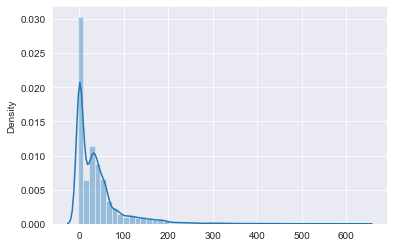

In [223]:
sns.distplot(dfnumeric) # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

* From the above plot, the dataset as a whole does not follow a normal distribution. Hence, it would be bi modal in nature from the plot alone. We can use Chebyshevs inequality for estimation for better understanding of the dataset.
* The model is bi modal, which means, it has two modes. This would mean that, it follows Chebyshevs rule, 1-1/K, here, K=2. mean ± 2 standard deviations

* We can also normalize the dataset to get a better understanding of the dataset within non standardised scales and to avoid Chebyshevs rule.

In [224]:
# Normalizing the dataset for getting better understanding of the dataset and to tackle Chebyshevs inequality
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

std_scale

StandardScaler()

In [225]:
df3normal= dfnumeric.copy()

In [226]:
# returns z-scores of the values of the attribute
df3normal['Age'] = std_scale.fit_transform(df3normal[['Age']]) 
df3normal['CustomerSince'] = std_scale.fit_transform(df3normal[['CustomerSince']]) 
df3normal['HighestSpend'] = std_scale.fit_transform(df3normal[['HighestSpend']]) 
df3normal['MonthlyAverageSpend'] = std_scale.fit_transform(df3normal[['MonthlyAverageSpend']]) 
df3normal['Mortgage'] = std_scale.fit_transform(df3normal[['Mortgage']]) 

In [227]:
df3normal #after normalization of dataset

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage
0,-0.990190,-0.969323,2.304120,3.977474,-0.555820
1,1.713943,1.646536,0.675950,0.262983,-0.555820
2,-1.426341,-1.318104,-0.626585,-1.051375,-0.555820
3,0.231031,0.251411,0.871331,1.063027,-0.555820
4,1.190562,1.036169,-0.735130,0.320129,-0.555820
...,...,...,...,...,...
4974,-1.426341,-1.492495,-0.735130,-0.022747,-0.555820
4975,-1.339111,-1.405300,-1.277853,-0.879937,0.278875
4976,1.539482,1.646536,-1.082473,-0.937083,-0.555820
4977,1.713943,1.733731,-0.539750,-0.822791,-0.555820


<AxesSubplot:ylabel='Density'>

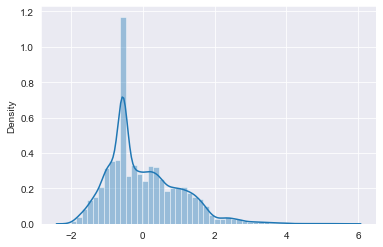

In [228]:
sns.distplot(df3normal) #Plotting graph after normalization

* After normalizing the dataset, it follows a normal distribution. Hence, no need to find Chebyshev's inequality and K value for it.

* The data is normalized/scaled to fit within 1 and is standardless hence showing the arrangement of the entire dataset. Hence, it will be easier to identify outliers and gain better understanding of the dataset in processing and analysis.

**Piechart and Barplot of categorical attributes in the dataset**

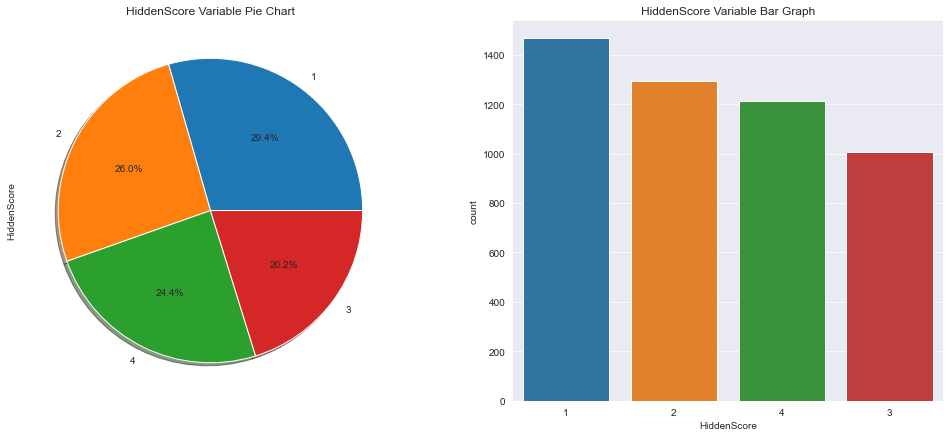

In [229]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df3['HiddenScore'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('HiddenScore',data=df3,ax=axes[1],order=[1,2,4,3])
axes[0].set_title('HiddenScore Variable Pie Chart')
axes[1].set_title('HiddenScore Variable Bar Graph')
plt.show()

* Hidden score is the score associated to the customers, from the barplot we can understand that the bank assigned the hidden score 1 (29.44%) to most of the customers followed by hidden score 2 (25.96%) ,then hidden score 4 (24.4%) and the least assigned hidden score is 3 (20.2%).

* Hidden Score 1 > Hidden Score 2 > Hidden Score 4 > Hidden Score 3 in count

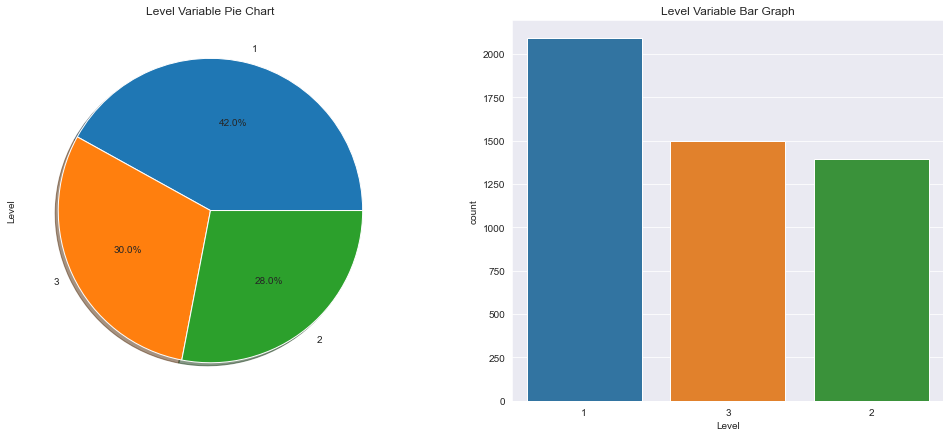

In [230]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df3['Level'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('Level',data=df3,ax=axes[1],order=[1,3,2])
axes[0].set_title('Level Variable Pie Chart')
axes[1].set_title('Level Variable Bar Graph')
plt.show()

* A level is a stage associated to the customers, from the barplot, we can understand that the level 1 (41.95%) is the most assigned to the customers, followed by level 3 (30.04%) and then level 2 being the lowest but almost the same as level 3 (28.01%)

* Level 1 > Level 3 > Level 2 in count

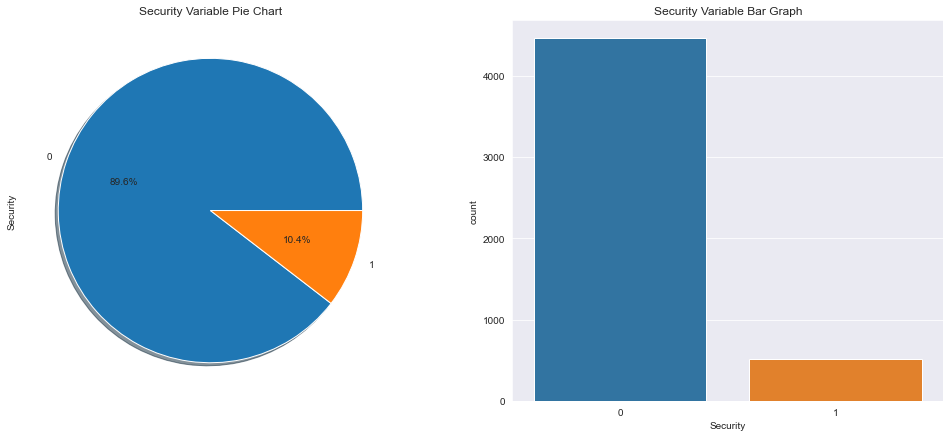

In [231]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df3['Security'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('Security',data=df3,ax=axes[1],order=[0,1])
axes[0].set_title('Security Variable Pie Chart')
axes[1].set_title('Security Variable Bar Graph')
plt.show()

* Security is the customer's security asset with the bank, from the above barplot, we can understand that customers prefer without security (0) as it is being the most opted (89.56%) and with security (1) being the least opted (10.44%)

* Security (0) > Secuiry (1) in count

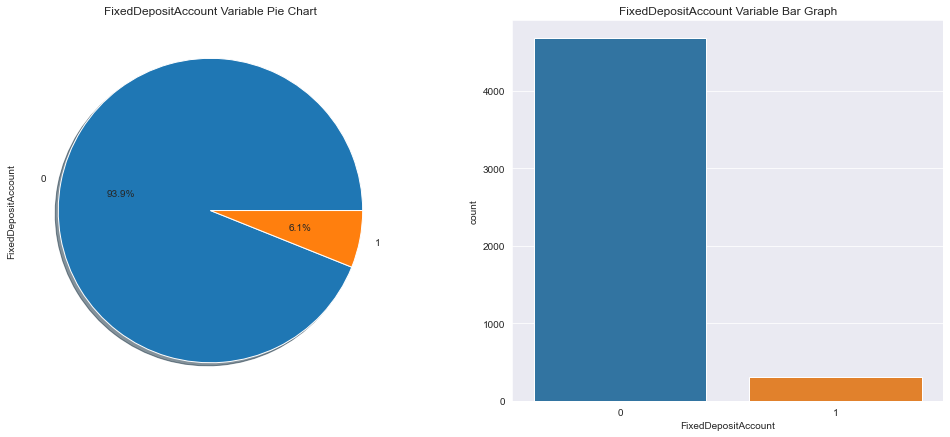

In [232]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df3['FixedDepositAccount'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('FixedDepositAccount',data=df3,ax=axes[1])
axes[0].set_title('FixedDepositAccount Variable Pie Chart')
axes[1].set_title('FixedDepositAccount Variable Bar Graph')
plt.show()

* FixedDepositAccount is the customer's fixed deposit account with the bank. From the above barplot, we can understand that customers prefer without FixedDepositAccount (0) as it is the most opted (93.94%) and with FixedDepositAccount (1) is the least opted (6.06%).

* FixedDepositAccount (0) > FixedDepositAccount (1) in count

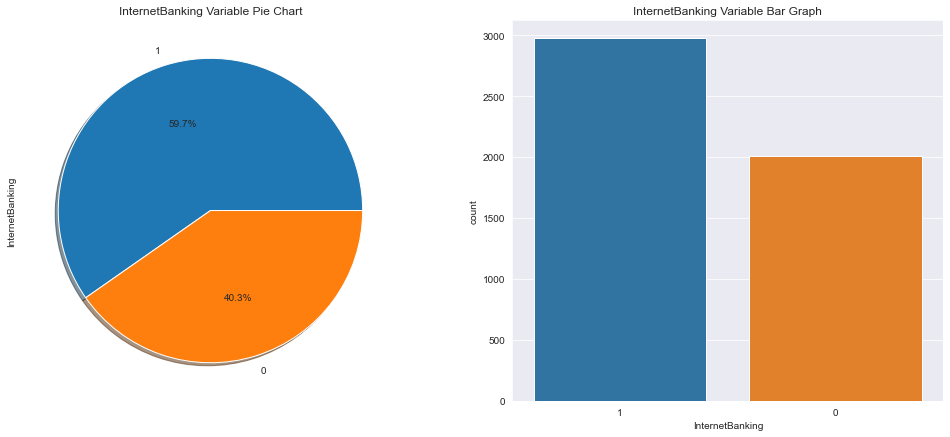

In [233]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df3['InternetBanking'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('InternetBanking',data=df3,ax=axes[1],order=[1,0])
axes[0].set_title('InternetBanking Variable Pie Chart')
axes[1].set_title('InternetBanking Variable Bar Graph')
plt.show()

* InternetBanking is the customer's usage of Internet Banking, From the above barplot, we can understand that, the feature of InternetBanking is the most opted (1) for (59.72%) and 40.28% of the customers are not opting (0) for internet banking.

* Internet Banking (1) > Internet Banking (0) in count

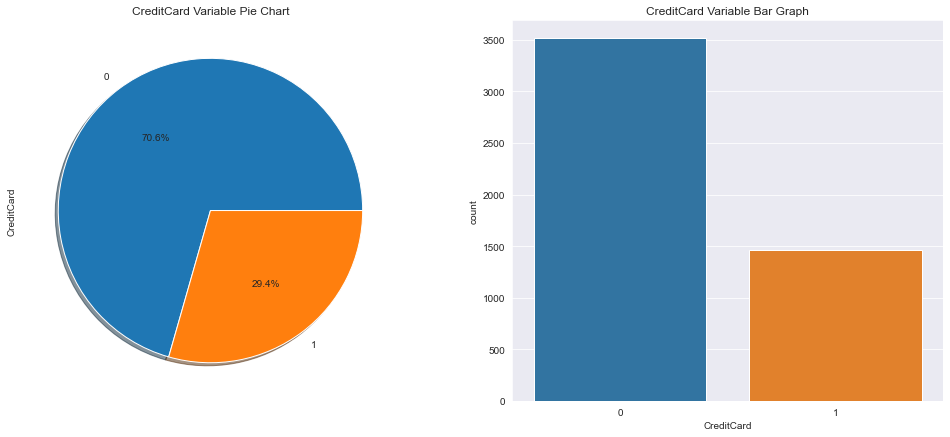

In [234]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df3['CreditCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('CreditCard',data=df3,ax=axes[1],order=[0,1])
axes[0].set_title('CreditCard Variable Pie Chart')
axes[1].set_title('CreditCard Variable Bar Graph')
plt.show()

* Creditcard is the customer usage of bank's credit card. From the above barplot, we can understand that, majority of the customers (70.56%) dont use credit card (0) , while only 29.44% use credit card (1).

* Credit card (0) > Credit Card (1) in count

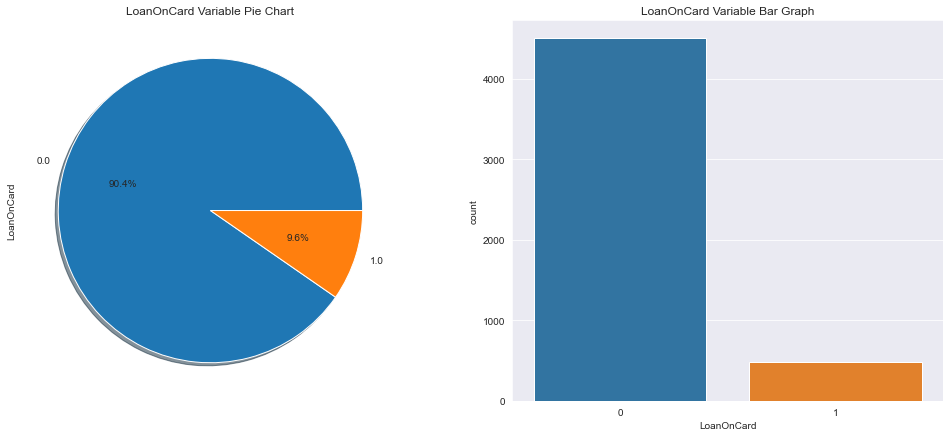

In [235]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df3['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=df3,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

* The LoanOnCard is if customer has taken loan on credit card, from the above barplot, we can understand that, majority of customers (90.36%) didnt take loan (0) and only 9.64% customers took loan (1).

* LoanOnCard (0) > LoanOnCard (1) in count

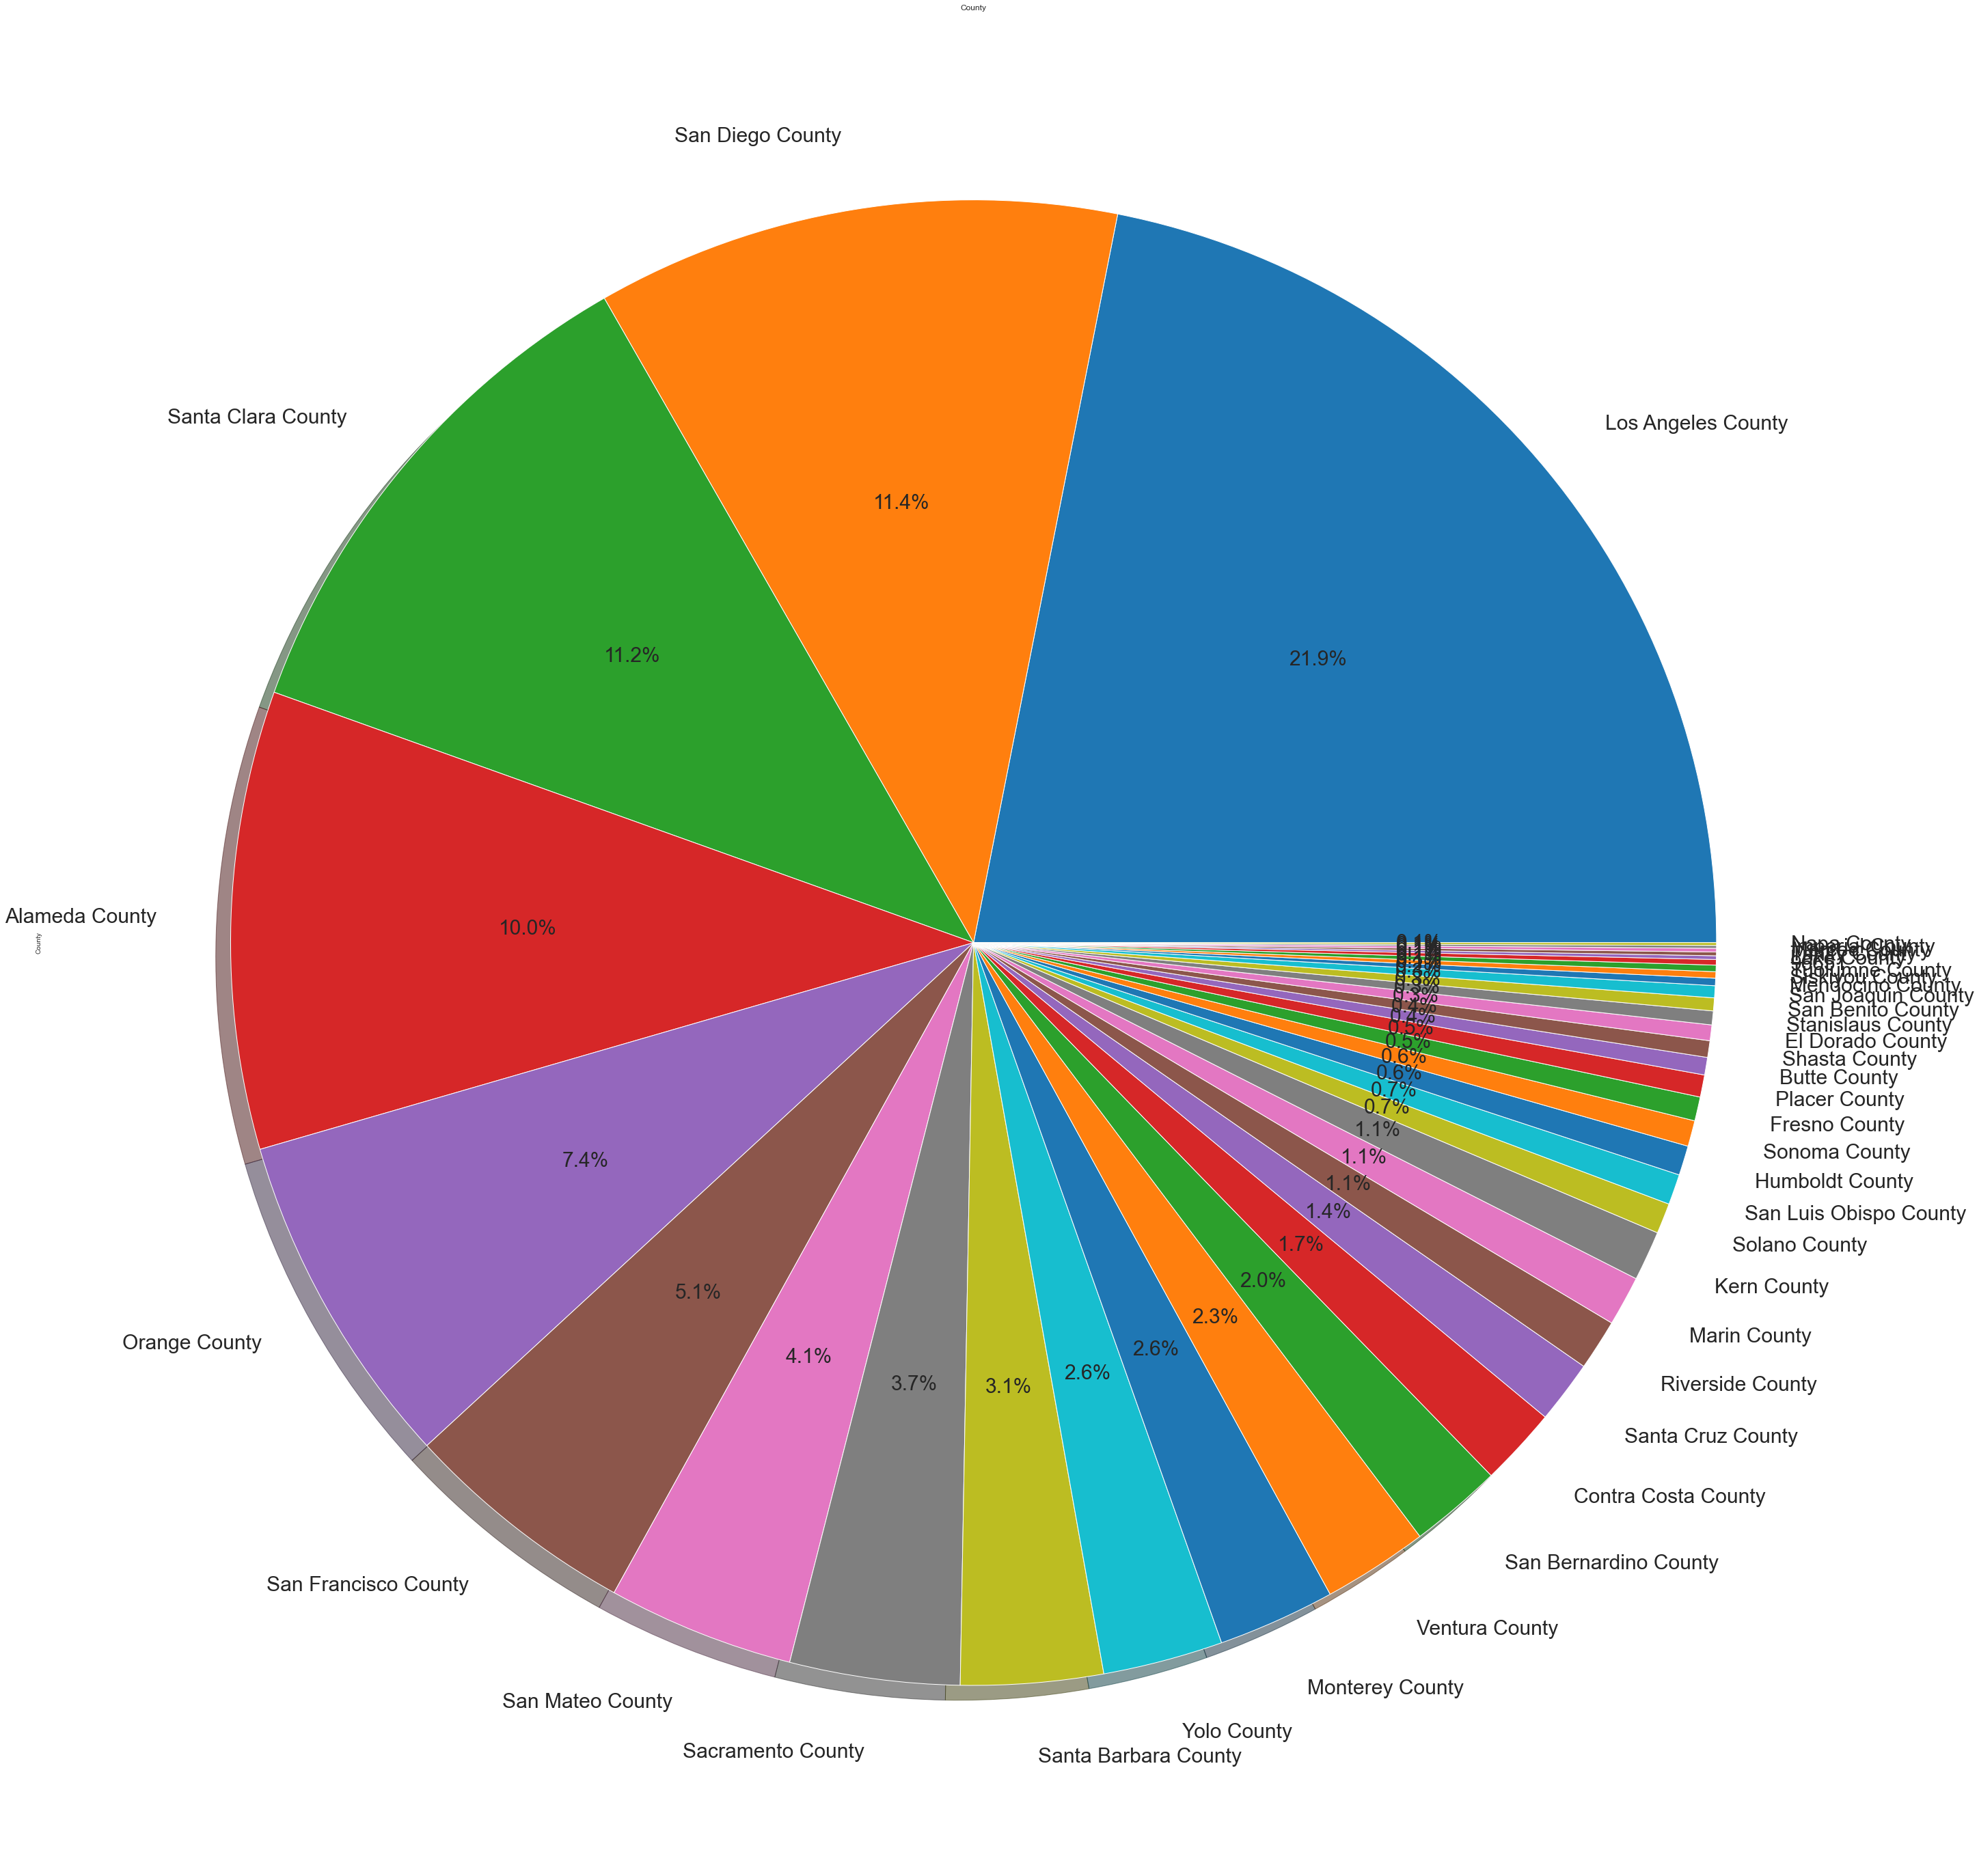

In [236]:
plt.figure(figsize=(50,50))
df3['County'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, fontsize = 30)
plt.title('County')
plt.show()

* From the above plot, we can understand that majority of the customers are from the 21.9% Los Angeles county, followed by the San Diego county, Santa clara county etc. 

* As this plot is very big, we can instead use Regions attribute for further analysis

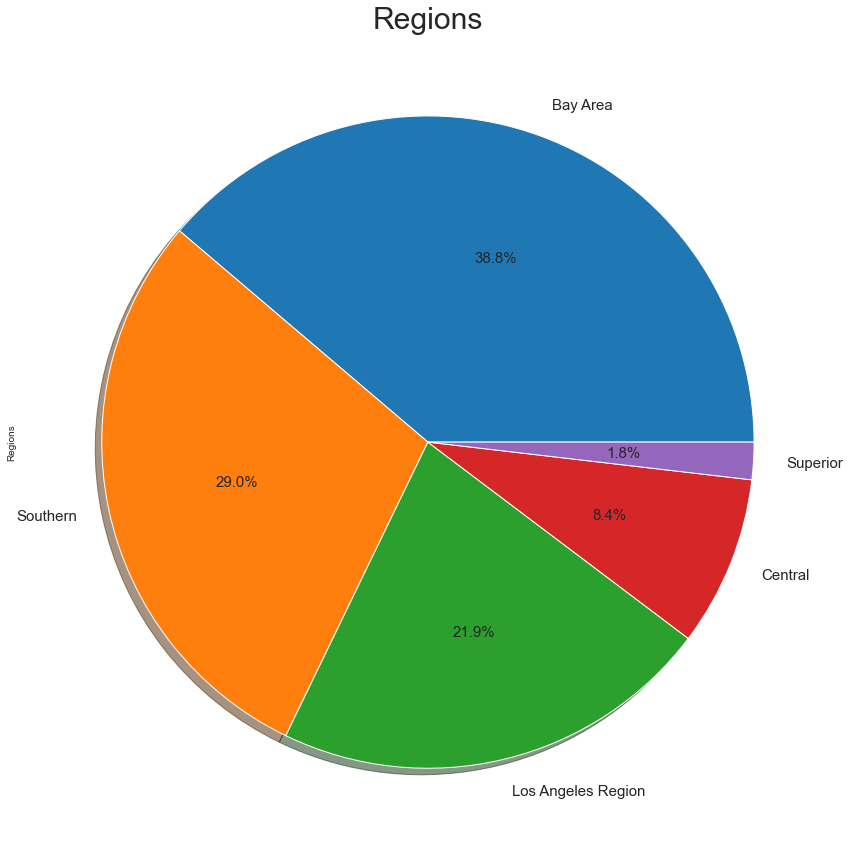

In [237]:
plt.figure(figsize=(15,15))
df3['Regions'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, fontsize = 15)
plt.title('Regions', fontsize = 30)
plt.show()

* From the above plot, we can understand that the customers are from regions: Bay area (38.8%), Southern (29.0%), Los Angeles Region (21.9), Central (8.4%), Superior (1.8%)

* Bay Area > Southern > Los Angeles Region > Central > Superior in count

**BoxPlot**

In [238]:
dfnumeric.dtypes

Age                      int64
CustomerSince            int64
HighestSpend             int64
MonthlyAverageSpend    float64
Mortgage                 int64
dtype: object

<AxesSubplot:title={'center':'Mortgage'}, xlabel='Mortgage'>

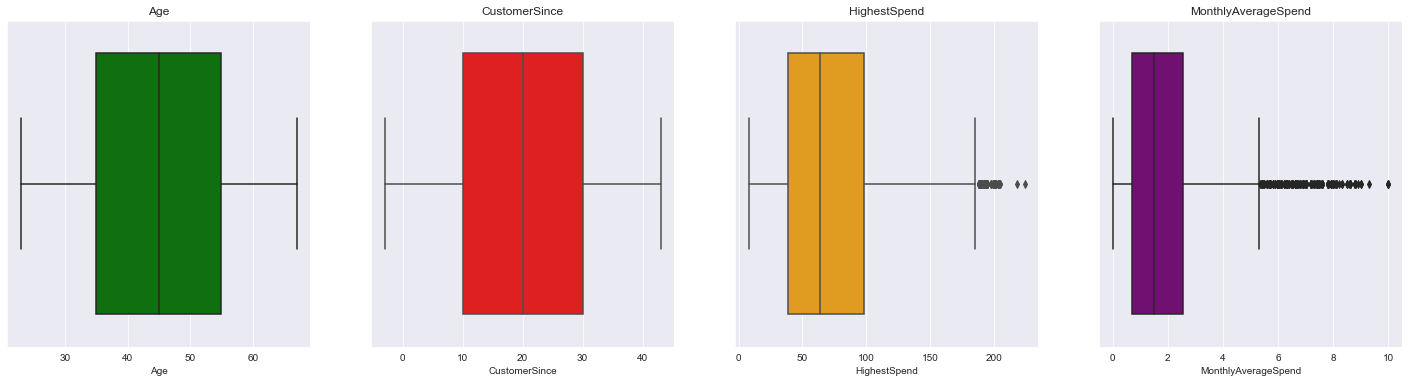

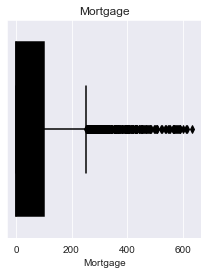

In [239]:
plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
plt.title('Age')
sns.boxplot(df3['Age'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('CustomerSince')
sns.boxplot(df3['CustomerSince'],orient='vertical',color='red')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('HighestSpend')
sns.boxplot(df3['HighestSpend'],orient='vertical',color='orange')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('MonthlyAverageSpend')
sns.boxplot(df3['MonthlyAverageSpend'],orient='vertical',color='purple')

plt.figure(figsize=(16,4))

plt.subplot(1, 4, 1)
plt.title('Mortgage')
sns.boxplot(df3['Mortgage'],orient='vertical',color='black')


* HighestSpend, MonthlyAverageSpend and Mortgage need outlier treatment. Rest of them have no outliers

In [240]:
# Finding the Interquartile Range for the Dataset
Q1 = df3.quantile(0.25)
Q2 = df3.quantile(0.50)
Q3 = df3.quantile(0.75) 
IQR = Q3 - Q1
IQR

Age                     20.00
CustomerSince           20.00
HighestSpend            59.00
MonthlyAverageSpend      1.85
Mortgage               101.00
dtype: float64

In [241]:
# Finding the Lowerfence values in the Dataset
Lowerfence_inner = Q1-(1.5 * IQR)
Lowerfence_inner

Age                      5.000
CustomerSince          -20.000
HighestSpend           -49.500
MonthlyAverageSpend     -2.075
Mortgage              -151.500
dtype: float64

In [242]:
# Finding the Upperfence values in the Dataset
Upperfence_inner = Q3+(1.5 * IQR)
Upperfence_inner

Age                     85.000
CustomerSince           60.000
HighestSpend           186.500
MonthlyAverageSpend      5.325
Mortgage               252.500
dtype: float64

**Total number of Upper fence outliers**

In [243]:
# Count of Outliers over the upper fence
countoutup =(dfnumeric>Upperfence_inner).sum()
countoutup

Age                      0
CustomerSince            0
HighestSpend            96
MonthlyAverageSpend    320
Mortgage               291
dtype: int64

**Total number of Lower fence outliers**

In [244]:
# Count of Outliers below the lower fence
countoutdown =(dfnumeric<Lowerfence_inner).sum()
countoutdown

Age                    0
CustomerSince          0
HighestSpend           0
MonthlyAverageSpend    0
Mortgage               0
dtype: int64

**Total number of outliers**

In [245]:
#Count of Total Outliers
Totalout = countoutup + countoutdown
Totalout

Age                      0
CustomerSince            0
HighestSpend            96
MonthlyAverageSpend    320
Mortgage               291
dtype: int64

**Removing Outliers from the Doutlier dataset**

In [246]:
# We can further remove the outliers for better clarity on the data
dfoutlier = dfnumeric.copy()
def remove_outliers(dfoutlier, q=0.05):
    upper = dfoutlier.quantile(1-q)
    lower = dfoutlier.quantile(q)
    mask = (dfoutlier < upper) & (dfoutlier > lower)
    return mask
mask = remove_outliers(dfoutlier, 0.1)
dfoutlier = dfoutlier[mask]

**Boxplot after removing outliers for Doutlier**

<AxesSubplot:title={'center':'Mortgage'}, xlabel='Mortgage'>

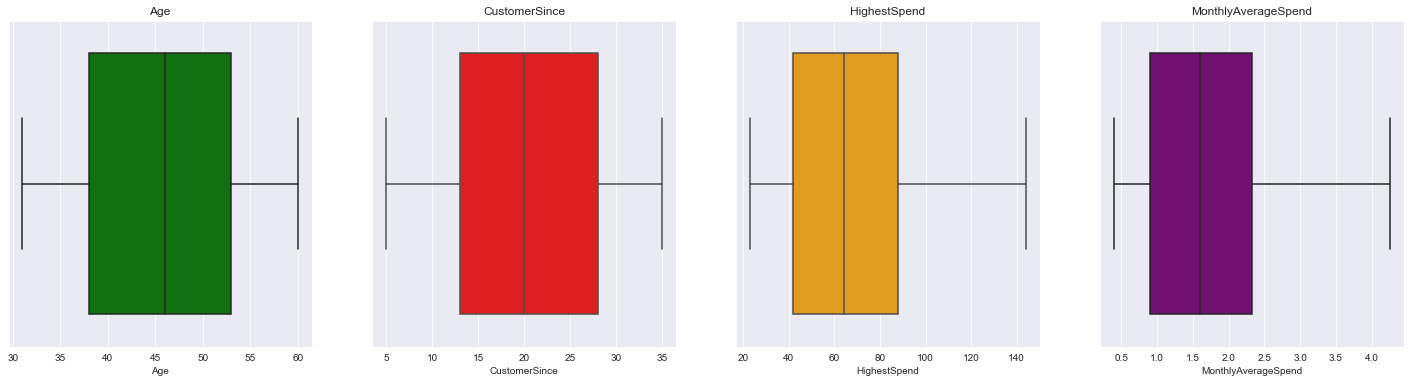

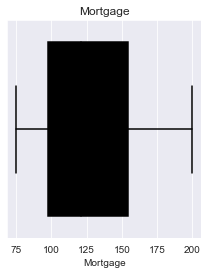

In [247]:
plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
plt.title('Age')
sns.boxplot(dfoutlier['Age'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('CustomerSince')
sns.boxplot(dfoutlier['CustomerSince'],orient='vertical',color='red')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('HighestSpend')
sns.boxplot(dfoutlier['HighestSpend'],orient='vertical',color='orange')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('MonthlyAverageSpend')
sns.boxplot(dfoutlier['MonthlyAverageSpend'],orient='vertical',color='purple')

plt.figure(figsize=(16,4))

plt.subplot(1, 4, 1)
plt.title('Mortgage')
sns.boxplot(dfoutlier['Mortgage'],orient='vertical',color='black')


* After outlier treatment, there are no outliers in the dataset and it is processed and can be used for further data analysis

In [248]:
dfoutlier.dtypes

Age                    float64
CustomerSince          float64
HighestSpend           float64
MonthlyAverageSpend    float64
Mortgage               float64
dtype: object

**Checking for Null/missing values**

In [249]:
dfoutlier.isnull().sum()

Age                    1167
CustomerSince          1028
HighestSpend           1009
MonthlyAverageSpend    1248
Mortgage               3944
dtype: int64

**Imputing with mean values**

In [250]:
dfoutlier1 = dfoutlier.fillna(dfoutlier.mean())
dfoutlier1 

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage
0,34.00000,9.000000,68.804786,1.719847,127.188406
1,45.69937,20.164262,105.000000,2.400000,127.188406
2,45.69937,5.000000,45.000000,1.719847,127.188406
3,48.00000,23.000000,114.000000,3.800000,127.188406
4,59.00000,32.000000,40.000000,2.500000,127.188406
...,...,...,...,...,...
4974,45.69937,20.164262,40.000000,1.900000,127.188406
4975,45.69937,20.164262,68.804786,0.400000,85.000000
4976,45.69937,20.164262,24.000000,1.719847,127.188406
4977,45.69937,20.164262,49.000000,0.500000,127.188406


* This wont be used for data analysis mostly because the null values are almost the entire dataset, hence, that would mean on imputing with median would trend the dataset towards median which is not recommended.

**MEAN, MEDIAN AND MODE HISTOGRAM**

Mean:  45.699370409234 
Median:  46.0 
Mode:  43.0


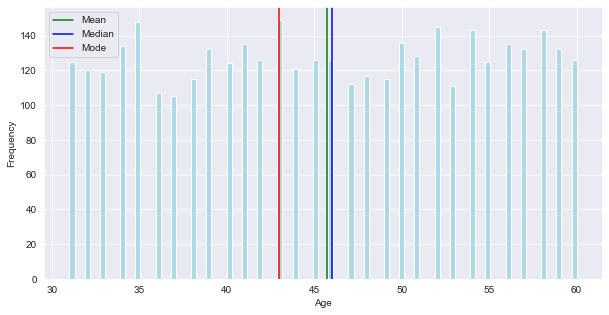

In [251]:
mean=dfoutlier['Age'].mean()
median=dfoutlier['Age'].median()
mode=dfoutlier['Age'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(dfoutlier['Age'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')  
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('Age')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (45.7~46) = Median (46) ~ Mode (43)
* From the above plot, it is observed that the mean and median are equal, hence it can be considered that, this is Symmetrical and single mode value. Hence, This is unimodal and Symmetrical.
* Here since, Mode < (Median > Mean) =It is slightly left skewed or Negatively skewed

Mean:  20.164262212098205 
Median:  20.0 
Mode:  32.0


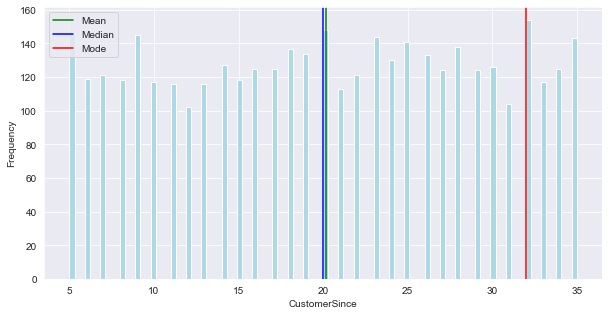

In [252]:
mean=dfoutlier['CustomerSince'].mean()
median=dfoutlier['CustomerSince'].median()
mode=dfoutlier['CustomerSince'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(dfoutlier['CustomerSince'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean') 
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('CustomerSince')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (20.16) = Median (20.0 ) != Mode (32)
* From the above plot, it is observed that the mean and median are equal, hence it can be considered that, this is Symmetrical and single mode value. Hence, This is unimodal and Symmetrical.
* Here since, Mode > Mean > Median   = It is slightly left skewed or Negatively skewed

Mean:  68.80478589420655 
Median:  64.0 
Mode:  44.0


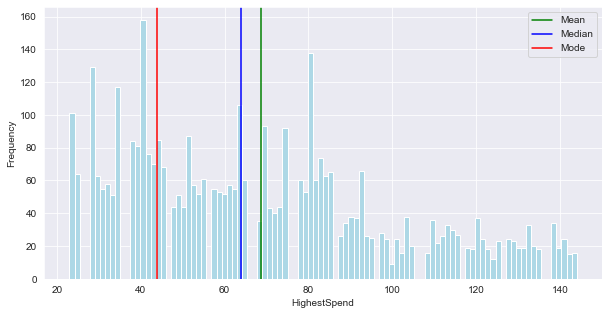

In [253]:
mean=dfoutlier['HighestSpend'].mean()
median=dfoutlier['HighestSpend'].median()
mode=dfoutlier['HighestSpend'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(dfoutlier['HighestSpend'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')   
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('HighestSpend')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (68.8) != Median (64 ) != Mode (44)
* From the above plot, it is observed that the mean and median are not equal, hence it can be considered that, this is Asymmetrical but with single mode value. Hence, This is unimodal and Asymmetrical.
* Here since, Mode < Median < Mean - It is Right skewed or Postive Skewness. 

Mean:  1.719847225944786 
Median:  1.6 
Mode:  1.0


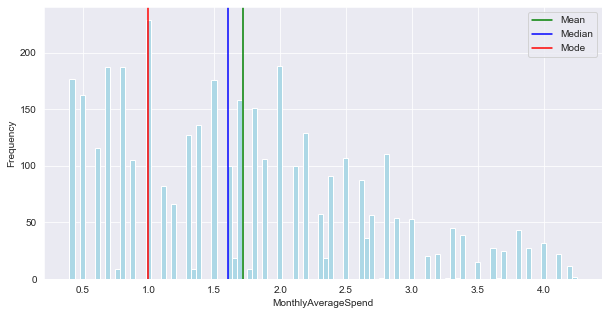

In [254]:
mean=dfoutlier['MonthlyAverageSpend'].mean()
median=dfoutlier['MonthlyAverageSpend'].median()
mode=dfoutlier['MonthlyAverageSpend'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(dfoutlier['MonthlyAverageSpend'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')   
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('MonthlyAverageSpend')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (1.719) != Median (1.6) != Mode (1.0)
* From the above plot, it is observed that the mean and median are not equal, hence it can be considered that, this is Asymmetrical but with single mode value. Hence, This is unimodal and Asymmetrical.
* Here since, Mode < Median < Mean - It is Right skewed or Postive Skewness. 

Mean:  127.18840579710145 
Median:  121.0 
Mode:  98.0


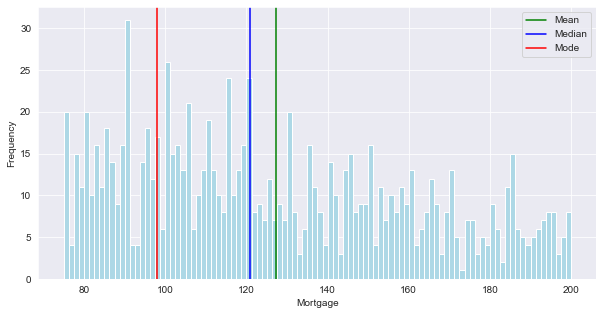

In [255]:
mean=dfoutlier['Mortgage'].mean()
median=dfoutlier['Mortgage'].median()
mode=dfoutlier['Mortgage'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(dfoutlier['Mortgage'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')   
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('Mortgage')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

* Mean (127.1) != Median (121.0) != Mode (98.0)
* From the above plot, it is observed that the mean and median are not equal, hence it can be considered that, this is Asymmetrical but with single mode value. Hence, This is unimodal and Asymmetrical.
* Here since, Mode < Median < Mean - It is Right skewed or Postive Skewness. 

**DISTPLOT FOR SKEWNESS and Kurtosis**

**Before outlier Treatment**

<AxesSubplot:title={'center':'Mortgage'}, xlabel='Mortgage', ylabel='Density'>

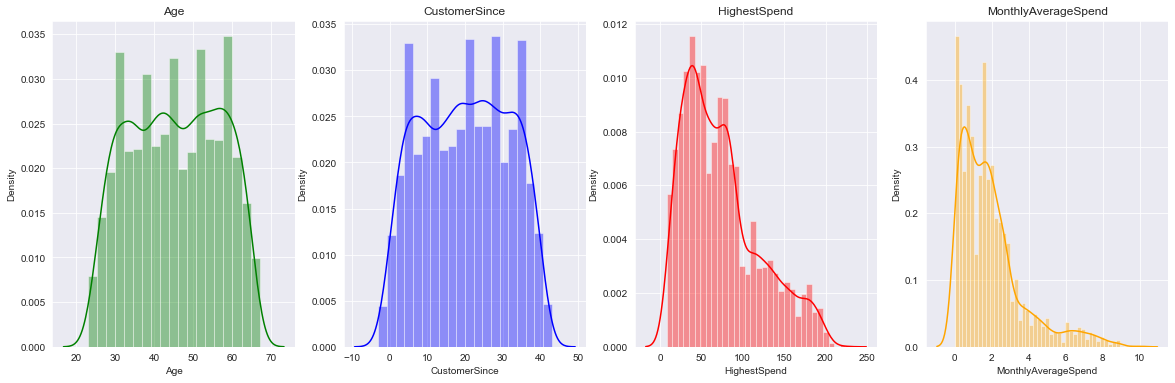

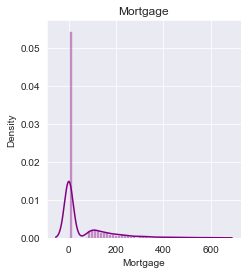

In [256]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Age')
sns.distplot(dfnumeric['Age'],color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('CustomerSince')
sns.distplot(dfnumeric['CustomerSince'],color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('HighestSpend')
sns.distplot(dfnumeric['HighestSpend'],color='red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('MonthlyAverageSpend')
sns.distplot(dfnumeric['MonthlyAverageSpend'],color='orange')

plt.figure(figsize=(16,4))

# subplot 5
plt.subplot(1, 4, 1)
plt.title('Mortgage')
sns.distplot(dfnumeric['Mortgage'],color='purple')

In [257]:
from scipy.stats import norm, kurtosis
dfnumeric.skew()  # to measure the skeweness of every attribute

Age                   -0.030520
CustomerSince         -0.027641
HighestSpend           0.839385
MonthlyAverageSpend    1.595752
Mortgage               2.101714
dtype: float64

In [258]:
dfnumeric.kurt(axis=0)

Age                   -1.154776
CustomerSince         -1.123479
HighestSpend          -0.050161
MonthlyAverageSpend    2.631403
Mortgage               4.740469
dtype: float64

* Skewness is the distortion of symmetry and when skewness value is between 0 to 1 are moderately skewed while greater than 1 or lesser than -1 are highly skewed. Postive and Negative skewness is as per the sign.  

* From the above data, its observed that:

  1) Age - It has skew value of -0.0285 which has low negative Skewness or left Skewed

  2) CustomerSince - It has a skew value of -0.027 which has moderate negative Skewness or left Skewed

  3) HighestSpend - It has a skew value of 0.839 which has high skewness or Rightly Skewed

  4) MonthlyAverageSpend  - It has a skew value of 1.595 which has very high Positive skewness or Rightly Skewed

  5) Mortgage  - It has a skew value of 2.101 is which has extremely high Positive skewness or Rightly Skewed

* Kurtosis is a measure of tailedness that indicates the sharpness and flatness of peaks, Kurtosis 0 to 1 have flatter peaks while over 1 have sharper peaks and negative Kurtosis have the the least or more flatter peaks

* From the kurtosis above, we can infer that, 

  1) Age = -1.154 signifies peak with high depression

  2) CustomerSince = -1.123 signifies signifies peak with high depression

  3) HighestSpend = -0.050 signifies peak with moderate depression

  4) MonthlyAverageSpend =  2.631 signifies peak with extremely high sharpness

  5) Mortgage = 4.740 signifies peak with extremely high sharpness

**After outlier Treatment**

<AxesSubplot:title={'center':'Mortgage'}, xlabel='Mortgage', ylabel='Density'>

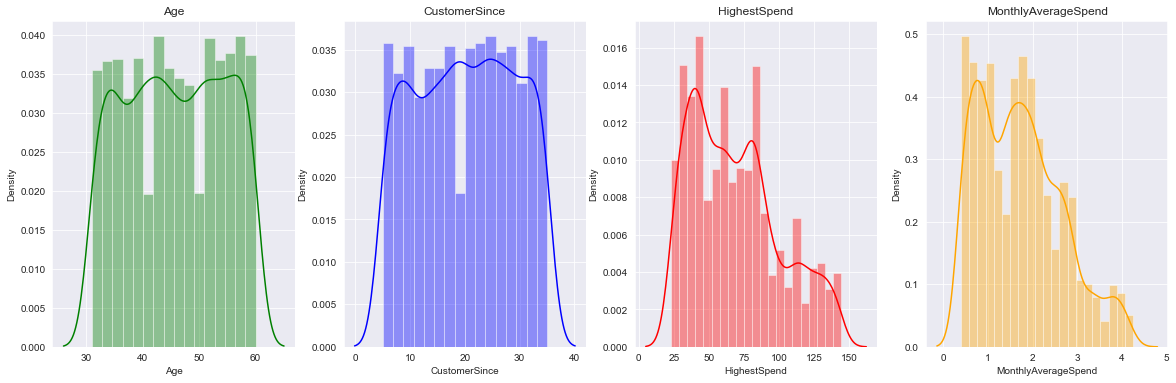

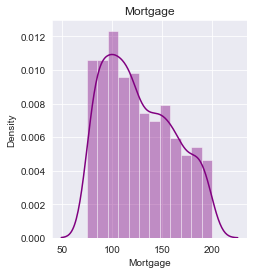

In [259]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Age')
sns.distplot(dfoutlier['Age'],color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('CustomerSince')
sns.distplot(dfoutlier['CustomerSince'],color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('HighestSpend')
sns.distplot(dfoutlier['HighestSpend'],color='red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('MonthlyAverageSpend')
sns.distplot(dfoutlier['MonthlyAverageSpend'],color='orange')

plt.figure(figsize=(16,4))

# subplot 5
plt.subplot(1, 4, 1)
plt.title('Mortgage')
sns.distplot(dfoutlier['Mortgage'],color='purple')

* From the above Plot, we can get a visual representation of the skewness in the data.

In [260]:
dfoutlier.skew()  # to measure the skeweness of every attribute

Age                   -0.028132
CustomerSince         -0.038821
HighestSpend           0.566913
MonthlyAverageSpend    0.564509
Mortgage               0.381977
dtype: float64

In [261]:
dfoutlier.kurt(axis=0)  # to measure the Kurtosis of every attribute

Age                   -1.213440
CustomerSince         -1.177999
HighestSpend          -0.594730
MonthlyAverageSpend   -0.382254
Mortgage              -0.959836
dtype: float64

* Skewness is the distortion of symmetry and when skewness value is between 0 to 1 are moderately skewed while greater than 1 or lesser than -1 are highly skewed. Postive and Negative skewness is as per the sign.  

* From the above data, its observed that:

  1) Age - It has 0 outliers, and has skew value of -0.0285 which has low negative Skewness or left Skewed

  2) CustomerSince - It has 0 outliers, and has a skew value of -0.0391 which has moderate negative Skewness or left Skewed

  3) HighestSpend - It has 96 outliers, and has a skew value of 0.566 which has moderate skewness or Rightly Skewed

  4) MonthlyAverageSpend  - It has  324 outliers, and has a skew value of 0.564 which has moderate Positive skewness or Rightly Skewed

  5) Mortgage  - It has 291 outliers, and has a skew value of 0.381 is which has moderate Positive skewness or Rightly Skewed

* Kurtosis is a measure of tailedness that indicates the sharpness and flatness of peaks, Kurtosis 0 to 1 have flatter peaks while over 1 have sharper peaks and negative Kurtosis have the the least or more flatter peaks

* From the kurtosis above, we can infer that, 

  1) Age = -1.21 signifies peak with high depression

  2) CustomerSince = 1.17 signifies signifies peak with high depression

  3) HighestSpend = -0.59 signifies peak with moderate depression

  4) MonthlyAverageSpend =  -0.38 signifies peak with moderate depression

  5) Mortgage = -0.959 signifies peak with high depression

#### It is understood that the original distribution of data is masked by outliers, and only after removing it, we're able to see the hidden structures/patterns.

**CUMULATIVE DISTRIBUTION**

<AxesSubplot:ylabel='Density'>

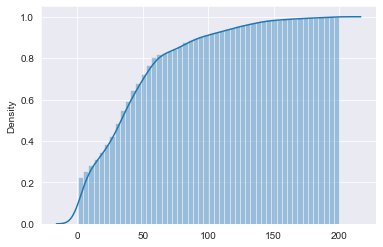

In [262]:
#Cumulative Distribution Plot
sns.distplot(dfoutlier, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

* The cumulative distribution function (CDF) calculates the cumulative probability for a given x-value. Use the CDF to determine the probability that a random observation that is taken from the population will be less than or equal to a certain value.


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.2 Bivariate Analysis
   

**Barplot between Hidden Score vs other Numerical Attributes**

In [263]:
df3.dtypes

Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                category
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
County                   object
Regions                  object
dtype: object

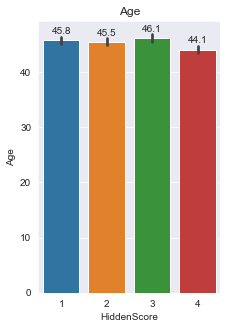

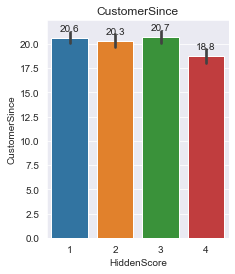

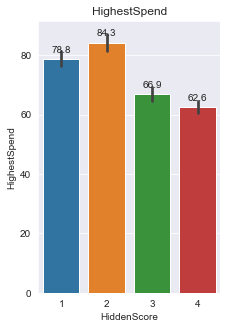

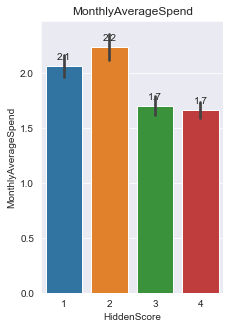

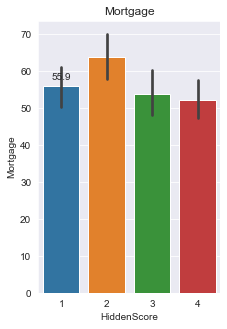

In [264]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(15,5))
# HiddenScore Vs Age
plt.subplot(1, 4, 1)
plt.title('Age')
splot = sns.barplot(x=df3['HiddenScore'], y=df3['Age'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
# HiddenScore Vs CustomerSince
plt.title('CustomerSince')
splot = sns.barplot(x=df3['HiddenScore'], y=df3['CustomerSince'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
# HiddenScore Vs HighestSpend
plt.subplot(1, 4, 1)
plt.title('HighestSpend')
splot = sns.barplot(x=df3['HiddenScore'], y=df3['HighestSpend'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
# HiddenScore vs MonthlyAverageSpend
plt.title('MonthlyAverageSpend')
splot = sns.barplot(x=df3['HiddenScore'], y=df3['MonthlyAverageSpend'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
# HiddenScore Vs Mortgage
plt.subplot(1, 4, 1)
plt.title('Mortgage')
splot = sns.barplot(x=df3['HiddenScore'], y=df3['Mortgage'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    

    plt.show()

From the above plot, the relationship between hiddenscores and other attributes are as follows: 

*Note:Hidden score is shortened to 'HS' for easier understanding.*

* HiddenScore Vs Age - Average age to hidden scores of customer is as follows: HS3 (46.1) > HS1 (45.8) > HS2 (45.5) > HS4 (44.4)

* HiddenScore Vs CustomerSince - Average customer since the bank opened to hidden scores of customer is as follows: HS3 (20.7) >  HS1 (20.6) > HS2 (20.3) >HS4 (18.8)  

* HiddenScore Vs HighestSpend - Average highest spent in the bank to hidden scores of customer is as follows: HS2 (84.3) >  HS1 (78.8) > HS3(66.9) > HS4 (62.6)  

* HiddenScore Vs MonthlyAverageSpend - Monthly Average spent in the bank to hidden scores of customer is as follows: HS2 (2.2) >  HS1 (2.1) > HS3(1.7) = HS4 (1.7)  

* HiddenScore Vs Mortgage - Average Mortgage taken in the bank to hidden scores of customer is as follows: HS2 (63.7) >  HS1 (55.9) > HS3(53.7) > HS4 (52.3)  

From this we can understand that, 

* For Hidden score 4, They are lowest for age and lowest for customer since the bank opened, the least max expenditure, least monthly average expenditure and least with mortgage (loans). This indicates that Hidden score 4 are younger age group people that have been in with the bank for the least and have lowest max expenditure, have least monthly expense and have least history for loans.

* For Hidden score 3, They are the highest for age and highest for customer since the bank opened, the 2nd lowest for max expenditure, 2nd lowest monthly average expenditure and 2nd lowest with mortgage (loans). This indicates that Hidden score 3 are older age group of people that have been in with the bank for the longest and still have 2nd lowest max expenditure even after the prolonged time, have 2nd lowest monthly expense and have 2nd lowest history for loans.

* For Hidden score 2, They are 2nd lowest for age and 2nd lowest for customer since the bank opened, the highest max expenditure, highest monthly average expenditure and highest with mortgage (loans). This indicates that Hidden score 2 are same as Hidden score 4 of younger age group of people that have been with the bank for much longer than Hidden score 4 and have the highest expenditure, highest avg monthly expense and highest history for loans.

* For Hidden score 1, They are 2nd highest for age and 2nd highest for customer since the bank opened, the 2nd highest max expenditure, 2nd highest monthly average expenditure and 2nd highest with mortgage (loans). This indicates that Hidden score 1 belongs to an older age group of people that have been with the bank for less than Hidden score 3 and have the 2nd highest expenditure, 2nd highest avg monthly expense and 2nd highest history for loans.


Which means bank prioritizes Hidden score 1 > Hidden score 2 > Hidden score 3 > Hidden score 4. The Hidden score seems to be credit scores which is a number that is calculated based on credit information collected by bank, so that lenders use this to assess the risk based on this score, and will accordingly charge interest rate when loaning money. 


**Barplot between Level vs other Numerical Attributes**

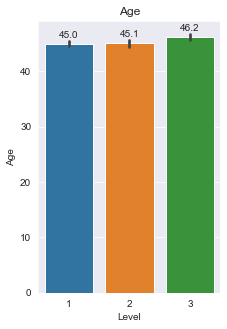

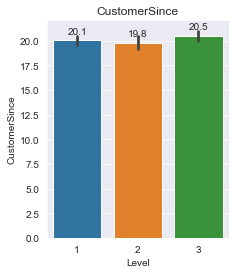

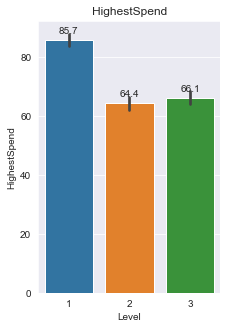

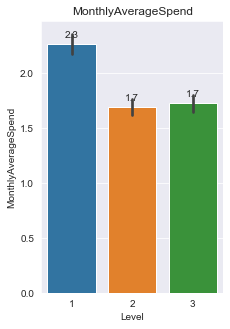

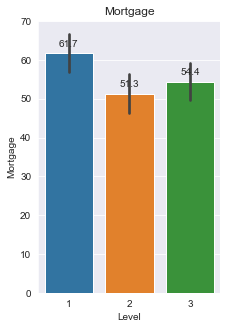

In [265]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(15,5))
# Level Vs Age
plt.subplot(1, 4, 1)
plt.title('Age')
splot = sns.barplot(x=df3['Level'], y=df3['Age'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
# Level Vs CustomerSince
plt.title('CustomerSince')
splot = sns.barplot(x=df3['Level'], y=df3['CustomerSince'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
# Level Vs HighestSpend
plt.subplot(1, 4, 1)
plt.title('HighestSpend')
splot = sns.barplot(x=df3['Level'], y=df3['HighestSpend'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
# Level vs MonthlyAverageSpend
plt.title('MonthlyAverageSpend')
splot = sns.barplot(x=df3['Level'], y=df3['MonthlyAverageSpend'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
# Level Vs Mortgage
plt.subplot(1, 4, 1)
plt.title('Mortgage')
splot = sns.barplot(x=df3['Level'], y=df3['Mortgage'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

From the above plot, the relationship between Level and other attributes are as follows: 

*Note:Level is shortened to 'lvl' for easier understanding.*

* Level Vs Age - Average age to Level associated with customers is as follows: lvl3 (46.2) > lvl2 (45.1) > lvl1 (45.0)

* Level Vs CustomerSince - Average customer since the bank opened to Level associated with customers is as follows: lvl3 (20.5) > lvl1 (20.1) > lvl2 (19.8)

* Level Vs HighestSpend - Average highest spent in the bank to Level associated with customersr is as follows: lvl1 (85.7) >  lvl3 (66.1) > lvl2(64.4)  

* Level Vs MonthlyAverageSpend - Monthly Average spent in the bank to Level associated with customers is as follows: lvl1 (2.3) > lvl2 (1.7) = lvl3(1.7) 

* Level Vs Mortgage - Average Mortgage taken in the bank to Level associated with customers is as follows: lvl1 (63.7) > lvl3 (55.9) > lvl2(53.7)

From this we can understand that, 

* For level 3, They are highest for age and customer since the bank opened, the 2nd highest max expenditure, least monthly average expenditure and moderate with mortgage (loans). This indicates that level 3 are older age group people that have been in with the bank for the longest and have highest max expenditure due to prolonged time, have least monthly expense and have moderate history for loans.

* For level 2, They are 2nd highest for age and lowest for customer since the bank opened, the least highest max expenditure, 2nd highest monthly average expenditure and least with mortgage (loans). This indicates that level 2 are younger age group of people that have been in with the bank for the shortest and have lowest max expenditure due to prolonged time, have 2nd highest monthly expense and have lowest history for loans.

* For level 1, They are lowest for age and 2nd highest for customer since the bank opened, the highest max expenditure, highest monthly average expenditure and highest with mortgage (loans). This indicates that level 1 are same as level 2 of younger age group of people that have been with the bank for much longer than level 2 and have the highest expenditure, highest avg monthly expense and highest history for loans.


Which means bank prioritizes level 1 > level 2 > level 2 > level 3. These are priority levels.


**Barplot between Security vs other Numerical Attributes**

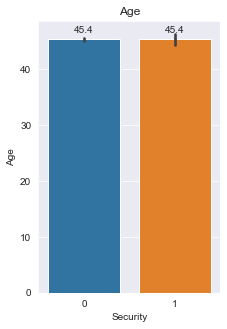

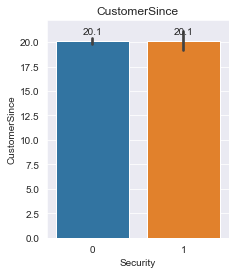

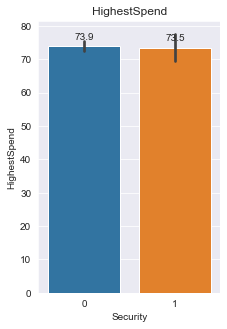

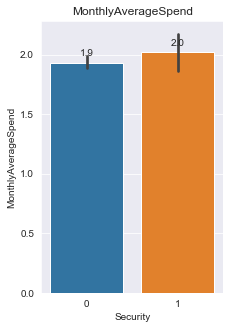

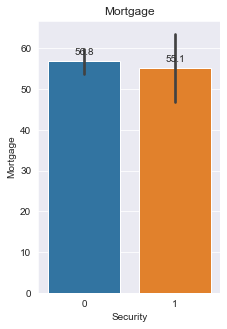

In [266]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(15,5))
# Security Vs Age
plt.subplot(1, 4, 1)
plt.title('Age')
splot = sns.barplot(x=df3['Security'], y=df3['Age'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
# Security Vs CustomerSince
plt.title('CustomerSince')
splot = sns.barplot(x=df3['Security'], y=df3['CustomerSince'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
# Security Vs HighestSpend
plt.subplot(1, 4, 1)
plt.title('HighestSpend')
splot = sns.barplot(x=df3['Security'], y=df3['HighestSpend'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
# Security vs MonthlyAverageSpend
plt.title('MonthlyAverageSpend')
splot = sns.barplot(x=df3['Security'], y=df3['MonthlyAverageSpend'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
# Security Vs Mortgage
plt.subplot(1, 4, 1)
plt.title('Mortgage')
splot = sns.barplot(x=df3['Security'], y=df3['Mortgage'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

From the above plot, the relationship between Security and other attributes are as follows: 

*Note:Security is shortened to 'Sec' for easier understanding. Also in this case, it is only 0 or 1 so we can interpret it as security present (1) or absent (0).*

* Security Vs Age - Average age to Security associated with customers is as follows: 45.4 for both security present and absent.

* Security Vs CustomerSince - Average customer since the bank opened to Security associated with customers is as follows: 20.1 for both security present and absent 

* Security Vs HighestSpend - Average highest spent in the bank to Security associated with customersr is as follows: 73.9 for security absent and 73.5 for security present.

* Security Vs MonthlyAverageSpend - Monthly Average spent in the bank to Security associated with customers is as follows: 2.0 for security present and 1.9 for security absent. 

* Security Vs Mortgage - Average Mortgage taken in the bank to Security associated with customers is as follows: 56.8 for security absent and 55.1 for security absent.

From this we can understand that, 

* For Security (0) which means no security for the assets with the bank, They are same for age and customer since the bank opened, have the highest max expenditure, with fewer monthly average expenditure and fewer mortgage (loans). This indicates that no security on assets indicates that the customer has higher max expenditure, fewer monthly average expenditure and fewer mortgage. 

* For Security (1) which means security for the assets with the bank, They are same for age and customer since the bank opened, have the lower max expenditure, with more monthly average expenditure and more mortgage (loans). This indicates that security on assets indicates that the customer has lower max expenditure, more monthly average expenditure and more mortgage. 


Which means that when a customer leaves security assets with the bank, they have slightly higher expenditure monthly and would take more loans but lower maximum expenditure and vice versa for without security assets with the bank.

The bank is benefitted with customers with security assets (1) rather than customers without security assets (0)


**Barplot between FixedDepositAccount vs other Numerical Attributes**

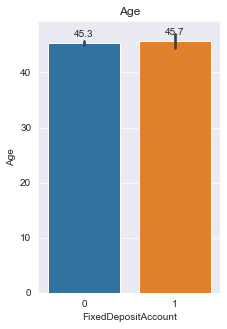

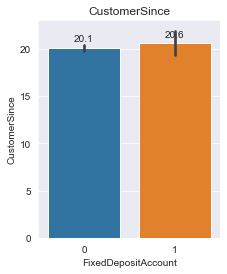

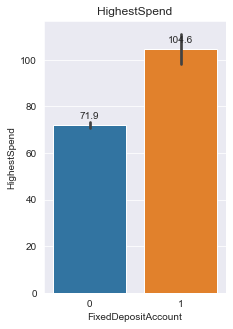

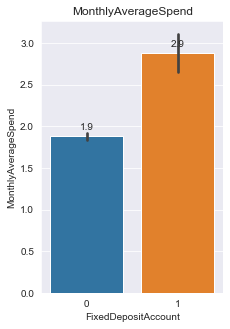

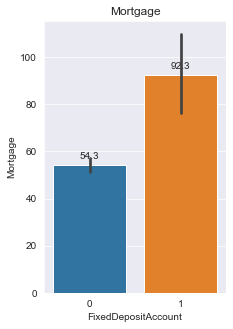

In [267]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(15,5))
# FixedDepositAccount Vs Age
plt.subplot(1, 4, 1)
plt.title('Age')
splot = sns.barplot(x=df3['FixedDepositAccount'], y=df3['Age'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
# FixedDepositAccount Vs CustomerSince
plt.title('CustomerSince')
splot = sns.barplot(x=df3['FixedDepositAccount'], y=df3['CustomerSince'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
# FixedDepositAccount Vs HighestSpend
plt.subplot(1, 4, 1)
plt.title('HighestSpend')
splot = sns.barplot(x=df3['FixedDepositAccount'], y=df3['HighestSpend'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
# FixedDepositAccount vs MonthlyAverageSpend
plt.title('MonthlyAverageSpend')
splot = sns.barplot(x=df3['FixedDepositAccount'], y=df3['MonthlyAverageSpend'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
# FixedDepositAccount Vs Mortgage
plt.subplot(1, 4, 1)
plt.title('Mortgage')
splot = sns.barplot(x=df3['FixedDepositAccount'], y=df3['Mortgage'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

From the above plot, the relationship between FixedDepositAccount and other attributes are as follows: 

*Note:FixedDepositAccount is shortened to 'FD' for easier understanding. Also in this case, it is only 0 or 1 so we can interpret it as FD present (1) or absent (0).*

* FixedDepositAccount Vs Age - Average age to FixedDepositAccount associated with customers is as follows: 45.7 with FD (1) and 45.3 without FD (0).

* FixedDepositAccount Vs CustomerSince - Average customer since the bank opened to FixedDepositAccount associated with customers is as follows: 20.6 with FD (1) and 20.1 without FD (0).

* FixedDepositAccount Vs HighestSpend - Average highest spent in the bank to FixedDepositAccount associated with customersr is as follows: 104.6 with FD (1) and 71.9 without FD (0).

* FixedDepositAccount Vs MonthlyAverageSpend - Monthly Average spent in the bank to FixedDepositAccount associated with customers is as follows: 2.9 with FD (1) and 1.9 without FD (0).

* FixedDepositAccount Vs Mortgage - Average Mortgage taken in the bank to FixedDepositAccount associated with customers is as follows: 92.3 with FD (1) and 54.3 without FD (0).

From this we can understand that, 

* For FixedDepositAccount (0) which means no fixed deposits with the bank, They are fewer for age and fewer for customer since the bank opened, have fewer max expenditure, with fewer monthly average expenditure and fewer mortgage (loans). This indicates that no FixedDepositAccount with bank indicates that the customer has lower max expenditure, lower monthly average expenditure and lower mortgage. 

* For FixedDepositAccount (1) which means fixed deposits with the bank, They are higher for age and higher for customer since the bank opened, have higher max expenditure, with higher monthly average expenditure and higher mortgage (loans). This indicates that FixedDepositAccount with bank indicates that the customer has higher max expenditure, higher monthly average expenditure and higher mortgage.


Which means that when a customer has a FixedDepositAccount with the bank, they have higher maximum expenditure, higher expenditure monthly and would take more loans with the bank in comparison to customer without FixedDepositAccount with the bank. 

Bank is benefitted by the customers with FD (1) than without FD (0).


**Barplot between InternetBanking vs other Numerical Attributes**

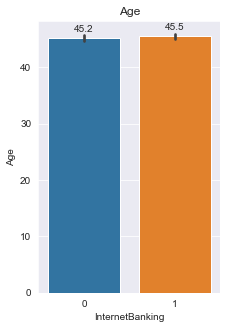

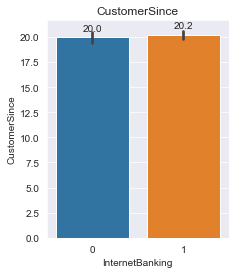

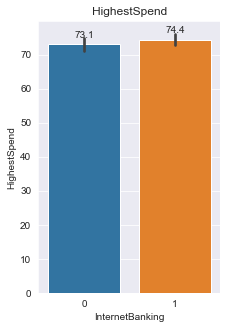

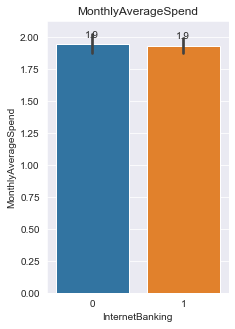

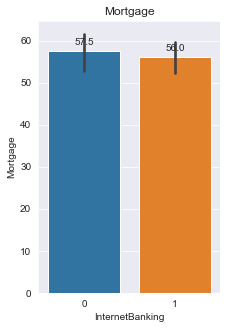

In [268]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(15,5))
# InternetBanking Vs Age
plt.subplot(1, 4, 1)
plt.title('Age')
splot = sns.barplot(x=df3['InternetBanking'], y=df3['Age'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
# InternetBanking Vs CustomerSince
plt.title('CustomerSince')
splot = sns.barplot(x=df3['InternetBanking'], y=df3['CustomerSince'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
# InternetBanking Vs HighestSpend
plt.subplot(1, 4, 1)
plt.title('HighestSpend')
splot = sns.barplot(x=df3['InternetBanking'], y=df3['HighestSpend'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
# InternetBanking vs MonthlyAverageSpend
plt.title('MonthlyAverageSpend')
splot = sns.barplot(x=df3['InternetBanking'], y=df3['MonthlyAverageSpend'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
# InternetBanking Vs Mortgage
plt.subplot(1, 4, 1)
plt.title('Mortgage')
splot = sns.barplot(x=df3['InternetBanking'], y=df3['Mortgage'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

From the above plot, the relationship between InternetBanking and other attributes are as follows: 

*Note:InternetBanking is shortened to 'IB' for easier understanding. Also in this case, it is only 0 or 1 so we can interpret it as IB present (1) or absent (0).*

* InternetBanking Vs Age - Average age to InternetBanking associated with customers is as follows: 45.5 with IB (1) and 45.2 without IB (0).

* InternetBanking Vs CustomerSince - Average customer since the bank opened to InternetBanking associated with customers is as follows: 20.2 with IB (1) and 20.0 without IB (0).

* InternetBanking Vs HighestSpend - Average highest spent in the bank to InternetBanking associated with customersr is as follows: 74.4 with IB (1) and 73.1 without IB (0).

* InternetBanking Vs MonthlyAverageSpend - Monthly Average spent in the bank to InternetBanking associated with customers is as follows: 1.9 for both with IB (1) and without IB (0).

* InternetBanking Vs Mortgage - Average Mortgage taken in the bank to InternetBanking associated with customers is as follows: 56.0 with IB (1) and 57.5 without IB (0).

From this we can understand that, 

* For InternetBanking (0) which signifies absence of usage of the internet banking feature, They are fewer for age and fewer for customer since the bank opened, have fewer max expenditure, with same monthly average expenditure and higher mortgage (loans). This indicates that no InternetBanking with bank indicates that the customer has lower max expenditure, no difference in monthly average expenditure and higher mortgage. 

* For InternetBanking (1) which signifies the usage of the internet banking feature, They are higher for age and higher for customer since the bank opened, have higher max expenditure, with same monthly average expenditure and lower mortgage (loans). This indicates that InternetBanking with bank indicates that the customer has higher max expenditure, no difference in monthly average expenditure and lower mortgage. 


Which means that when a customer has a InternetBanking with the bank, they have higher maximum expenditure, same expenditure monthly and would take fewer loans with the bank in comparison to customer without InternetBanking with the bank. 

Bank is benefitted by the customers with IB (1) than without IB (0) in max expenditure alone but customers without IB would take mortgage which would benefit the bank too. Hence, both are of equivalent weightage to the bank.


**Barplot between CreditCard vs other Numerical Attributes**

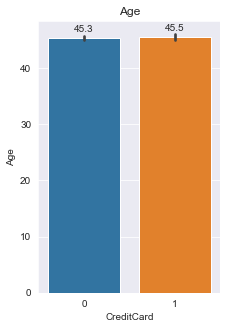

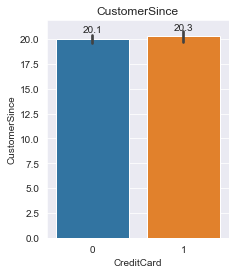

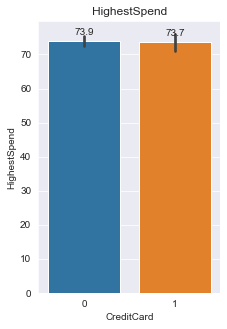

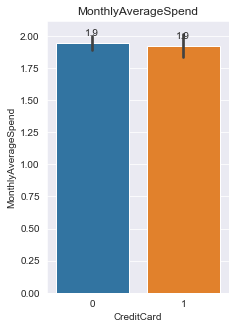

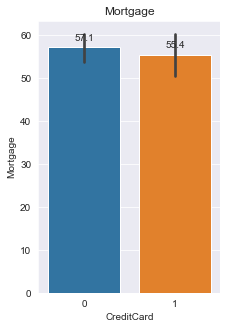

In [269]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(15,5))
# CreditCard Vs Age
plt.subplot(1, 4, 1)
plt.title('Age')
splot = sns.barplot(x=df3['CreditCard'], y=df3['Age'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
# CreditCard Vs CustomerSince
plt.title('CustomerSince')
splot = sns.barplot(x=df3['CreditCard'], y=df3['CustomerSince'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
# CreditCard Vs HighestSpend
plt.subplot(1, 4, 1)
plt.title('HighestSpend')
splot = sns.barplot(x=df3['CreditCard'], y=df3['HighestSpend'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
# CreditCard vs MonthlyAverageSpend
plt.title('MonthlyAverageSpend')
splot = sns.barplot(x=df3['CreditCard'], y=df3['MonthlyAverageSpend'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
# CreditCard Vs Mortgage
plt.subplot(1, 4, 1)
plt.title('Mortgage')
splot = sns.barplot(x=df3['CreditCard'], y=df3['Mortgage'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

From the above plot, the relationship between Creditcard and other attributes are as follows: 

*Note:Creditcard is shortened to 'CredCd' for easier understanding. Also in this case, it is only 0 or 1 so we can interpret it as CredCd present (1) or absent (0).*

* Creditcard Vs Age - Average age to Creditcard associated with customers is as follows: 45.5 with CredCd (1) and 45.3 without CredCd (0).

* Creditcard Vs CustomerSince - Average customer since the bank opened to Creditcard associated with customers is as follows: 20.3 with CredCd (1) and 20.1 without CredCd (0).

* Creditcard Vs HighestSpend - Average highest spent in the bank to Creditcard associated with customersr is as follows: 73.7 with CredCd (1) and 73.9 without CredCd (0).

* Creditcard Vs MonthlyAverageSpend - Monthly Average spent in the bank to Creditcard associated with customers is as follows: 1.9 for both with CredCd (1) and without CredCd (0).

* Creditcard Vs Mortgage - Average Mortgage taken in the bank to Creditcard associated with customers is as follows: 55.4 with CredCd (1) and 57.1 without CredCd (0).

From this we can understand that, 

* For Creditcard (0) which signifies that the customer doesnt have a credit card with the bank, They are fewer for age and fewer for customer since the bank opened, have higher max expenditure, with same monthly average expenditure and higher mortgage (loans). This indicates that no Creditcard with bank indicates that the customer has higher max expenditure, no difference in monthly average expenditure and higher mortgage. 

* For Creditcard (1) which signifies that the customer has a credit card with the bank, They are higher for age and higher for customer since the bank opened, have lower max expenditure, with same monthly average expenditure and lower mortgage (loans). This indicates that Creditcard with bank indicates that the customer has lower max expenditure, no difference in monthly average expenditure and lower mortgage. 


Which means that when a customer has a Creditcard with the bank, they have lower maximum expenditure, same expenditure monthly and would take fewer loans with the bank in comparison to customer without Creditcard with the bank. 

Bank is benefitted by the customers without CredCd (0) than with CredCd (0) as they will get more maximum expenditures and more loans from customers without creditcards. However, this will all vary from person to person, based on their credit score. 


**Barplot between LoanOnCard vs other Numerical Attributes**

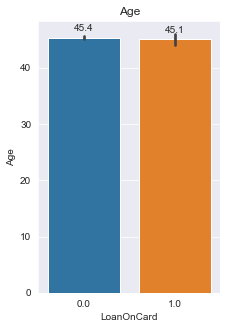

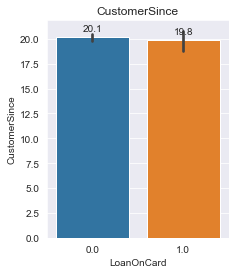

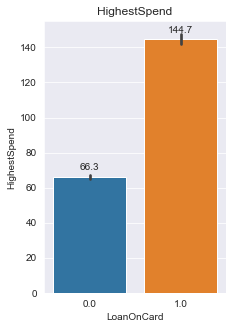

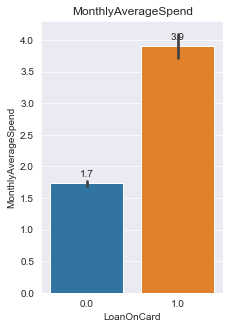

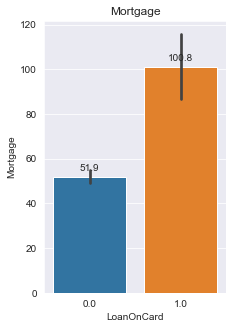

In [270]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(15,5))
# LoanOnCard Vs Age
plt.subplot(1, 4, 1)
plt.title('Age')
splot = sns.barplot(x=df3['LoanOnCard'], y=df3['Age'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
# LoanOnCard Vs CustomerSince
plt.title('CustomerSince')
splot = sns.barplot(x=df3['LoanOnCard'], y=df3['CustomerSince'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
# LoanOnCard Vs HighestSpend
plt.subplot(1, 4, 1)
plt.title('HighestSpend')
splot = sns.barplot(x=df3['LoanOnCard'], y=df3['HighestSpend'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
# LoanOnCard vs MonthlyAverageSpend
plt.title('MonthlyAverageSpend')
splot = sns.barplot(x=df3['LoanOnCard'], y=df3['MonthlyAverageSpend'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(15,5))
# LoanOnCard Vs Mortgage
plt.subplot(1, 4, 1)
plt.title('Mortgage')
splot = sns.barplot(x=df3['LoanOnCard'], y=df3['Mortgage'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

From the above plot, the relationship between LoanonCard and other attributes are as follows: 

*Note:LoanonCard is shortened to 'loan' for easier understanding. Also in this case, it is only 0 or 1 so we can interpret it as loan present (1) or absent (0).*

* LoanonCard Vs Age - Average age to LoanonCard associated with customers is as follows: 45.1 with loan (1) and 45.4 without loan (0).

* LoanonCard Vs CustomerSince - Average customer since the bank opened to LoanonCard associated with customers is as follows: 19.8 with loan (1) and 20.1 without loan (0).

* LoanonCard Vs HighestSpend - Average highest spent in the bank to LoanonCard associated with customersr is as follows: 144.7 with loan (1) and 66.6 without loan (0).

* LoanonCard Vs MonthlyAverageSpend - Monthly Average spent in the bank to LoanonCard associated with customers is as follows: 3.9 with loan (1) and 1.7 without loan (0).

* LoanonCard Vs Mortgage - Average Mortgage taken in the bank to LoanonCard associated with customers is as follows: 100.8 with loan (1) and 51.9 without loan (0).

From this we can understand that, 

* For LoanonCard (0) which signifies that the customer doesnt have a loan on a card with the bank, They are higher for age and higher for customer since the bank opened, have lower max expenditure, with lower average expenditure and lower mortgage (loans). This indicates that no LoanonCard with bank indicates that the customer has lower max expenditure, lower monthly average expenditure and lower mortgage. 

* For LoanonCard (1) which signifies that the customer has a loan on a card with the bank, They are lower for age and lower for customer since the bank opened, have higher max expenditure, with higher average expenditure and higher mortgage (loans). This indicates that LoanonCard with bank indicates that the customer has higher max expenditure, higher monthly average expenditure and higher mortgage. 


Which means that when a customer has a LoanonCard with the bank, they have higher maximum expenditure, higher monthly expenditure and would take more loans with the bank in comparison to customer without LoanonCard with the bank. 

Bank is benefitted by the customers with loan (1) than without loan (0) as they will get more maximum expenditures, monthly expenditure and more loans from customers with loan on cards.

**Barplot between Regions vs other Numerical Attributes**

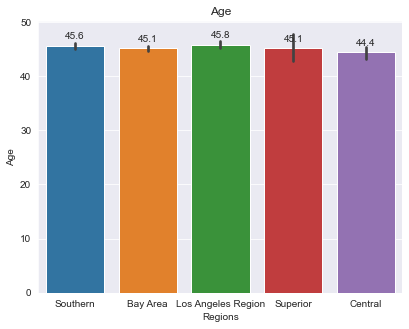

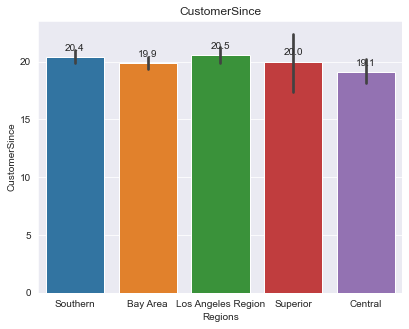

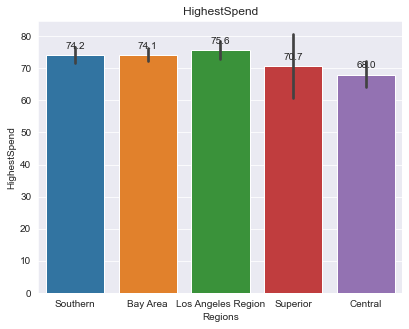

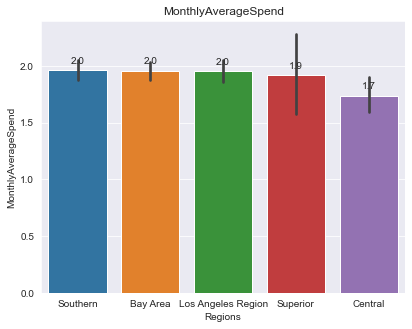

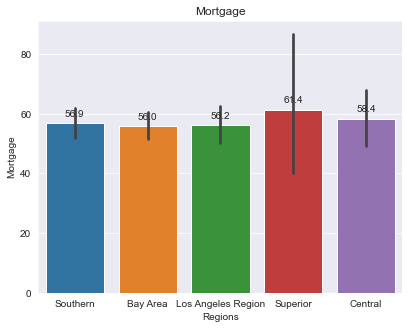

In [271]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(30,5))
# Regions Vs Age
plt.subplot(1, 4, 1)
plt.title('Age')
splot = sns.barplot(x=df3['Regions'], y=df3['Age'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(30,5))
plt.subplot(1, 4, 1)
# Regions Vs CustomerSince
plt.title('CustomerSince')
splot = sns.barplot(x=df3['Regions'], y=df3['CustomerSince'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,5))
# Regions Vs HighestSpend
plt.subplot(1, 4, 1)
plt.title('HighestSpend')
splot = sns.barplot(x=df3['Regions'], y=df3['HighestSpend'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()
plt.figure(figsize=(30,5))
plt.subplot(1, 4, 1)
# Regions vs MonthlyAverageSpend
plt.title('MonthlyAverageSpend')
splot = sns.barplot(x=df3['Regions'], y=df3['MonthlyAverageSpend'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,5))
# Regions Vs Mortgage
plt.subplot(1, 4, 1)
plt.title('Mortgage')
splot = sns.barplot(x=df3['Regions'], y=df3['Mortgage'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

From the above plot, the relationship between Regions and other attributes are as follows: 

*Note: The following regions will be abbreviated for easier depiction of data : Southern - STH, Bay Area- BAY, Los Angeles Region - LA, Superior - SPR, Central - CNL

* Regions Vs Age - Average age to Regions associated with customers is as follows: LA > STH > SPR = BAY > CNL

* Regions Vs CustomerSince - Average customer since the bank opened to Regions associated with customers is as follows:  LA > STH > SPR > BAY > CNL

* Regions Vs HighestSpend - Average highest spent in the bank to Regions associated with customers is as follows: LA > STH > BAY > SPR > CNL

* Regions Vs MonthlyAverageSpend - Monthly Average spent in the bank to Regions associated with customers is as follows: LA = STH = BAY > SPR > CNL

* Regions Vs Mortgage - Average Mortgage taken in the bank to Regions associated with customers is as follows: SPR > CNL > STH > LA > BAY

From this we can understand that, 

* For Los Angeles Region, They are highest for age, highest for customer since the bank opened, highest maximum expenditure, equal monthly average expenditure with Southern and Bay Area, and 2nd Lowest Mortgage (loans). 

* For Southern,  They are 2nd highest for age, 2nd highest for customer since the bank opened, 2nd highest maximum expenditure, equal monthly average expenditure with Los Angeles Region and Bay Area, and 3rd highest with Mortgage (loans). 

* For Bay Area, They are 2nd lowest for age, 2nd lowest for customer since the bank opened, 3rd highest maximum expenditure, equal monthly average expenditure with Los Angeles Region and Southern, and lowest with Mortgage (loans).

* For Central , They are lowest for age and lowest for customer since the bank opened, the lowest max expenditure, lowest monthly average expenditure and 2nd highest with mortgage (loans). 

* For Superior , They are 2nd lowest for age and 3rd highest for customer since the bank opened, the 2nd lowest max expenditure, 2nd lowest monthly average expenditure and highest with mortgage (loans). 


This indicates that, 

Expenditure : LA > STH > BAY > SPR > CNL 

Loan : SPR > CNL > STH > LA > BAY

**BiVariate Analysis with 2 categorical and 1 numerical**

##### Age vs Catgeorical attributes and LoanOnCard

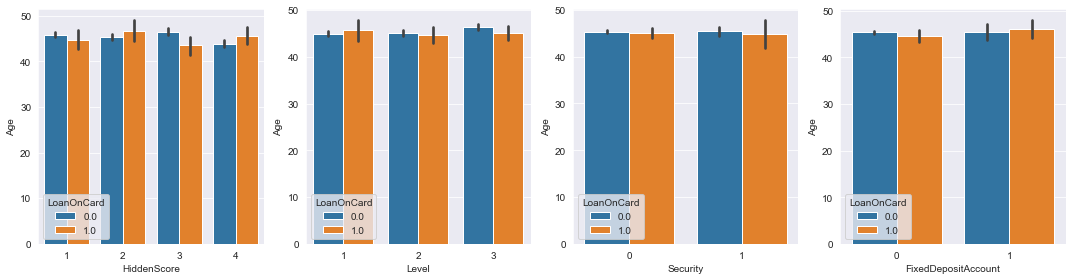

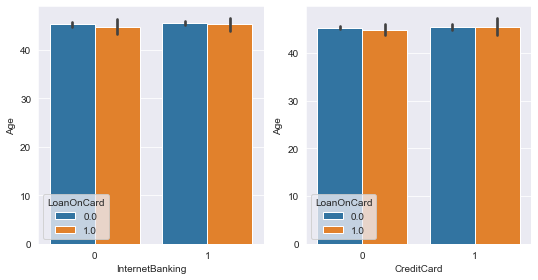

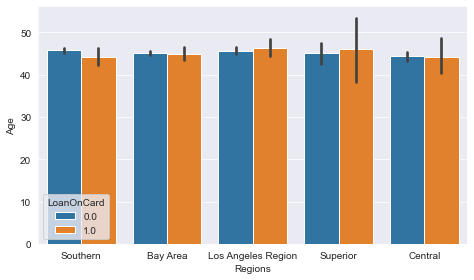

In [272]:
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='Age',x='HiddenScore',hue='LoanOnCard',data=df3);
plt.ylabel('Age')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='Age',x='Level',hue='LoanOnCard',data=df3);
plt.ylabel('Age')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='Age',x='Security',hue='LoanOnCard',data=df3);
plt.ylabel('Age')
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.barplot(y='Age',x='FixedDepositAccount',hue='LoanOnCard',data=df3);
plt.ylabel('Age')
plt.tight_layout()

plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='Age',x='InternetBanking',hue='LoanOnCard',data=df3);
plt.ylabel('Age')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='Age',x='CreditCard',hue='LoanOnCard',data=df3);
plt.ylabel('Age')
plt.tight_layout()

plt.figure(figsize=(25,4))
plt.subplot(1, 4, 1)
sns.barplot(y='Age',x='Regions',hue='LoanOnCard',data=df3);
plt.ylabel('Age')
plt.tight_layout()

* From this we can tell that, For Age where 0 and 1 is for LoanOnCard in which (0) indicates no loan on card and (1) indicates loan on card: 

1) Hidden score - HS1 (0>1) , HS2 (1>0), HS3 (0>1), HS4 (1>0)

* From this, we have understood that Hidden score 2 and 4 has higher proportion of aged customers with loan and Hidden score 1 and 3 higher proportion of aged customers without loan. 

2) Level - lvl1 (1>0), lvl2 (0>1), lvl3 (0>1)

* From this, we have understood that level 1 higher proportion of aged customers with loan while level 2 and 3 have higher proportion of aged customers without loan.

3) Security - sec0 (0>1), sec1 (0>1)

* From this, we have understood that for both with and without security of asset, theres higher proportion of aged customers without loan.

4) FixedDepositAccount - fd0(0>1), fd1(1>0)

* From this, we have understood that for customers with FD, theres a higher proportion of aged customers with loan and for customers without FD, theres higher proportion of aged customers without loan.

5) InternetBanking - IB0 (0>1), IB1 (0>1)

* From this, we have understood that for both with and without Internet Banking, theres higher proportion of aged customers without loan.

6) CreditCard - CredCd0 (0>1), Credcd1 (0=1)

* From this, we have understood that for customers with credit card, theres an equal proportion of aged customers with loan and without loan while the customers without credit card have a higher proportion of aged customers without loan.

7) Regions - STH (0>1), BAY (0>1), LA (1>0), SPR (1>0), CNL (0 = 1)

* From this, we have understood that, In southern and bay area, the higher proportion of aged customers dont have loan. While in Los Angeles and Superior Region, the higher proportion of aged customers have loan. In Central, theres an equal proportion of aged customers with loan and without loan.


##### CustomerSince vs Catgeorical attributes and LoanOnCard

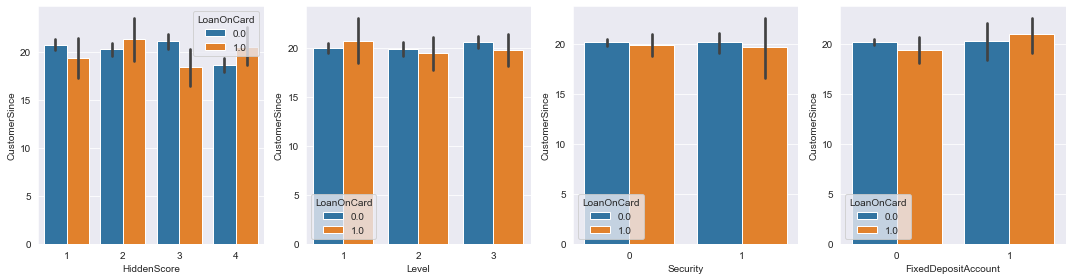

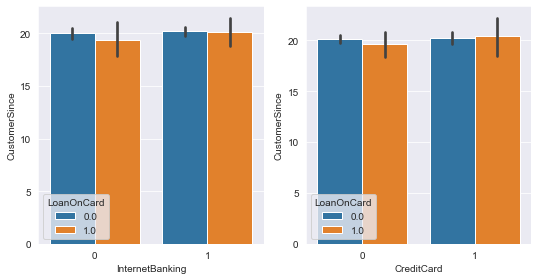

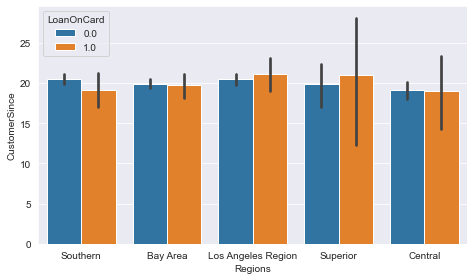

In [273]:
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='CustomerSince',x='HiddenScore',hue='LoanOnCard',data=df3);
plt.ylabel('CustomerSince')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='CustomerSince',x='Level',hue='LoanOnCard',data=df3);
plt.ylabel('CustomerSince')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='CustomerSince',x='Security',hue='LoanOnCard',data=df3);
plt.ylabel('CustomerSince')
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.barplot(y='CustomerSince',x='FixedDepositAccount',hue='LoanOnCard',data=df3);
plt.ylabel('CustomerSince')
plt.tight_layout()

plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='CustomerSince',x='InternetBanking',hue='LoanOnCard',data=df3);
plt.ylabel('CustomerSince')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='CustomerSince',x='CreditCard',hue='LoanOnCard',data=df3);
plt.ylabel('CustomerSince')
plt.tight_layout()

plt.figure(figsize=(25,4))
plt.subplot(1, 4, 1)
sns.barplot(y='CustomerSince',x='Regions',hue='LoanOnCard',data=df3);
plt.ylabel('CustomerSince')
plt.tight_layout()

* From this we can tell that, For CustomerSince where 0 and 1 is for LoanOnCard in which (0) indicates no loan on card and (1) indicates loan on card: 

1) Hidden score - HS1 (0>1) , HS2 (1>0), HS3 (0>1), HS4 (1>0)

* From this, we have understood that Hidden score 2 and 4 has higher proportion of older customers with loan and Hidden score 1 and 3 higher proportion of older customers without loan. 

2) Level - lvl1 (1>0), lvl2 (0>1), lvl3 (0>1)

* From this, we have understood that level 1 higher proportion of older customers with loan while level 2 and 3 have higher proportion of older customers without loan.

3) Security - sec0 (0>1), sec1 (0>1)

* From this, we have understood that for both with and without security of asset, theres higher proportion of older customers without loan.

4) FixedDepositAccount - fd0(0>1), fd1(1>0)

* From this, we have understood that for customers with FD, theres a higher proportion of older customers with loan and for customers without FD, theres higher proportion of older customers without loan.

5) InternetBanking - IB0 (0>1), IB1 (1>0)

* From this, we have understood that for customers with Internet Banking, theres a higher proportion of older customers with loan and for customers without Internet Banking, theres higher proportion of older customers without loan.

6) CreditCard - CredCd0 (0>1), Credcd1 (1>0)

* From this, we have understood that for customers with credit card, theres a higher proportion of older customers with loan and without loan while the customers without credit card have a higher proportion of older customers without loan.

7) Regions - STH (0>1), BAY (0>1), LA (1>0), SPR (1>0), CNL (0>1)

* From this, we have understood that, In Southern, Bay area and Central the higher proportion of older customers dont have loan. While in Los Angeles and Superior Region, the higher proportion of older customers have loan. 

##### HighestSpend vs Catgeorical attributes and LoanOnCard

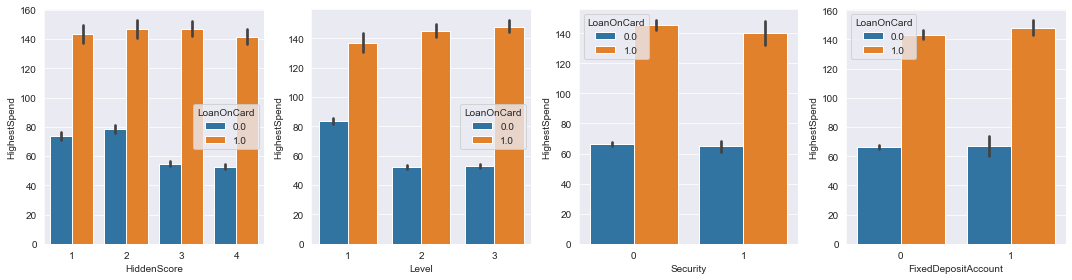

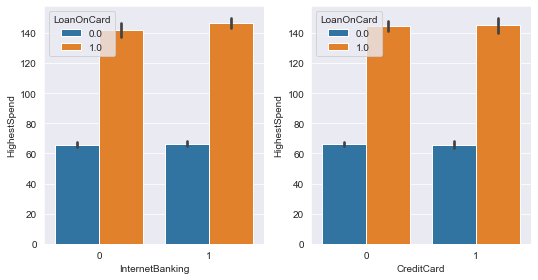

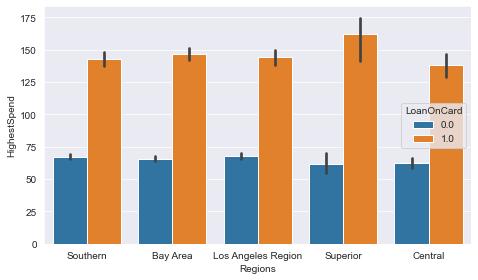

In [274]:
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='HighestSpend',x='HiddenScore',hue='LoanOnCard',data=df3);
plt.ylabel('HighestSpend')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='HighestSpend',x='Level',hue='LoanOnCard',data=df3);
plt.ylabel('HighestSpend')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='HighestSpend',x='Security',hue='LoanOnCard',data=df3);
plt.ylabel('HighestSpend')
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.barplot(y='HighestSpend',x='FixedDepositAccount',hue='LoanOnCard',data=df3);
plt.ylabel('HighestSpend')
plt.tight_layout()

plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='HighestSpend',x='InternetBanking',hue='LoanOnCard',data=df3);
plt.ylabel('HighestSpend')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='HighestSpend',x='CreditCard',hue='LoanOnCard',data=df3);
plt.ylabel('HighestSpend')
plt.tight_layout()

plt.figure(figsize=(25,4))
plt.subplot(1, 4, 1)
sns.barplot(y='HighestSpend',x='Regions',hue='LoanOnCard',data=df3);
plt.ylabel('HighestSpend')
plt.tight_layout()

* From this we can tell that, For HighestSpend where 0 and 1 is for LoanOnCard in which (0) indicates no loan on card and (1) indicates loan on card: 

1) Hidden score - HS1 (1>0) , HS2 (1>0), HS3 (1>0), HS4 (1>0)

* From this, we have understood that for that all hidden scores are favouring loan for customers with highest max expenditure than without loan.

2) Level - lvl1 (1>0), lvl2 (1>0), lvl3 (1>0)

* From this, we have understood that for that all levels are favouring loan for customers with highest max expenditure than without loan.

3) Security - sec0 (1>0), sec1 (1>0)

* From this, we have understood that for with and without security it is favouring loan for customers with highest max expenditure than without loan.

4) FixedDepositAccount - fd0(1>0), fd1(1>0)

* From this, we have understood that for with and without FixedDeposits it is favouring loan for customers with highest max expenditure than without loan.

5) InternetBanking - IB0 (1>0), IB1 (1>0)

* From this, we have understood that for with and without Internet Banking it is favouring loan for customers with highest max expenditure than without loan.

6) CreditCard - CredCd0 (1>0), Credcd1 (1>0)

* From this, we have understood that for with and without Credit Card it is favouring loan for customers with highest max expenditure than without loan.

7) Regions - STH (1>0), BAY (1>0), LA (1>0), SPR (1>0), CNL (1>0)

* From this, we have understood that for all regions it is favouring loan for customers with highest max expenditure than without loan.

##### MonthlyAverageSpend vs Catgeorical attributes and LoanOnCard

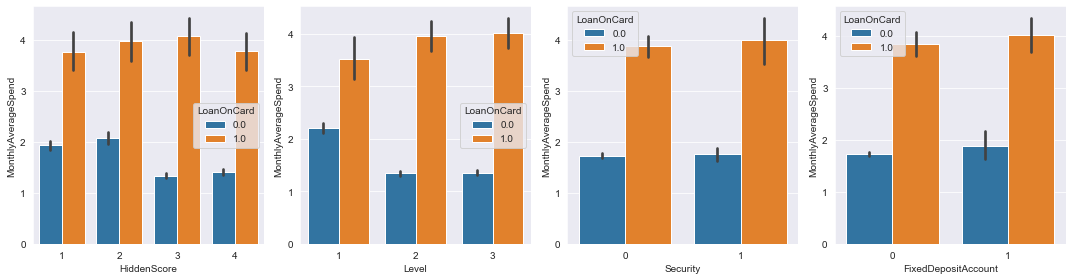

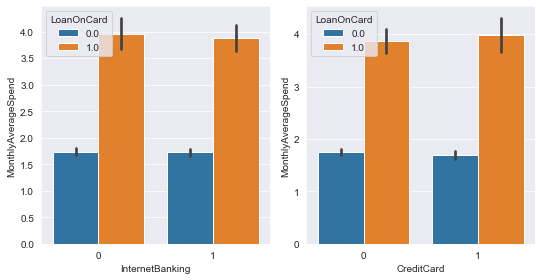

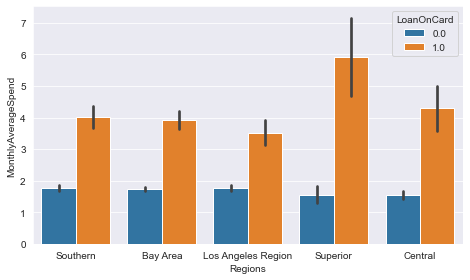

In [275]:
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='MonthlyAverageSpend',x='HiddenScore',hue='LoanOnCard',data=df3);
plt.ylabel('MonthlyAverageSpend')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='MonthlyAverageSpend',x='Level',hue='LoanOnCard',data=df3);
plt.ylabel('MonthlyAverageSpend')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='MonthlyAverageSpend',x='Security',hue='LoanOnCard',data=df3);
plt.ylabel('MonthlyAverageSpend')
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.barplot(y='MonthlyAverageSpend',x='FixedDepositAccount',hue='LoanOnCard',data=df3);
plt.ylabel('MonthlyAverageSpend')
plt.tight_layout()

plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='MonthlyAverageSpend',x='InternetBanking',hue='LoanOnCard',data=df3);
plt.ylabel('MonthlyAverageSpend')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='MonthlyAverageSpend',x='CreditCard',hue='LoanOnCard',data=df3);
plt.ylabel('MonthlyAverageSpend')
plt.tight_layout()

plt.figure(figsize=(25,4))
plt.subplot(1, 4, 1)
sns.barplot(y='MonthlyAverageSpend',x='Regions',hue='LoanOnCard',data=df3);
plt.ylabel('MonthlyAverageSpend')
plt.tight_layout()

* From this we can tell that, For MonthlyAverageSpend where 0 and 1 is for LoanOnCard in which (0) indicates no loan on card and (1) indicates loan on card: 

1) Hidden score - HS1 (1>0) , HS2 (1>0), HS3 (1>0), HS4 (1>0)

* From this, we have understood that for that all hidden scores are favouring loan for customers with highest monthly average expenditure than without loan.

2) Level - lvl1 (1>0), lvl2 (1>0), lvl3 (1>0)

* From this, we have understood that for that all levels are favouring loan for customers with highest monthly average expenditure than without loan.

3) Security - sec0 (1>0), sec1 (1>0)

* From this, we have understood that, for with and without security it is favouring loan for customers with highest monthly average expenditure than without loan.

4) FixedDepositAccount - fd0(1>0), fd1(1>0)

* From this, we have understood that, for with and without Fixed Deposit Account it is favouring loan for customers with highest monthly average expenditure than without loan.

5) InternetBanking - IB0 (1>0), IB1 (1>0)

* From this, we have understood that, for with and without Internet Banking it is favouring loan for customers with highest monthly average expenditure than without loan.

6) CreditCard - CredCd0 (1>0), Credcd1 (1>0)

* From this, we have understood that, for with and without Credit card it is favouring loan for customers with highest monthly average expenditure than without loan.

7) Regions - STH (1>0), BAY (1>0), LA (1>0), SPR (1>0), CNL (1>0)

* From this, we have understood that for all regions it is favouring loan for customers with highest monthly average expenditure than without loan.

##### Mortgage vs Catgeorical attributes and LoanOnCard

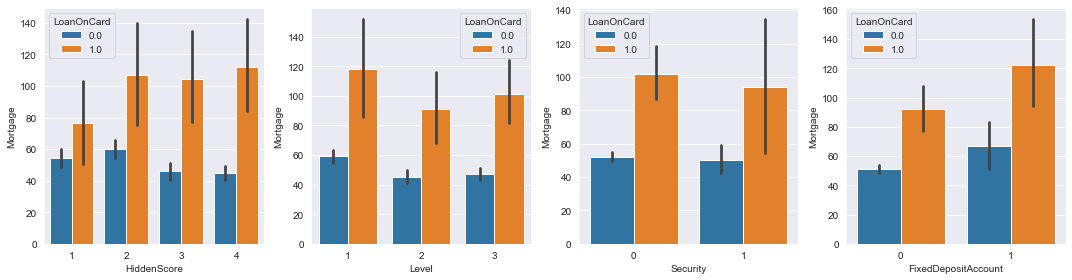

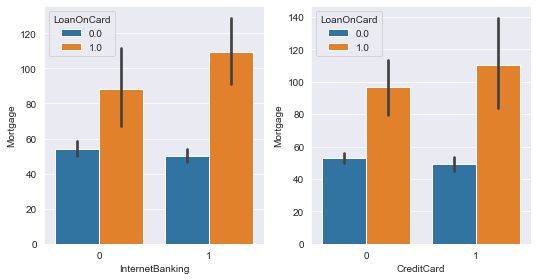

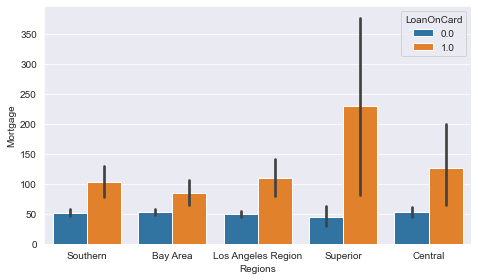

In [276]:
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='Mortgage',x='HiddenScore',hue='LoanOnCard',data=df3);
plt.ylabel('Mortgage')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='Mortgage',x='Level',hue='LoanOnCard',data=df3);
plt.ylabel('Mortgage')
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.barplot(y='Mortgage',x='Security',hue='LoanOnCard',data=df3);
plt.ylabel('Mortgage')
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.barplot(y='Mortgage',x='FixedDepositAccount',hue='LoanOnCard',data=df3);
plt.ylabel('Mortgage')
plt.tight_layout()

plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(y='Mortgage',x='InternetBanking',hue='LoanOnCard',data=df3);
plt.ylabel('Mortgage')
plt.tight_layout()

plt.subplot(1, 4, 2)
sns.barplot(y='Mortgage',x='CreditCard',hue='LoanOnCard',data=df3);
plt.ylabel('Mortgage')
plt.tight_layout()

plt.figure(figsize=(25,4))
plt.subplot(1, 4, 1)
sns.barplot(y='Mortgage',x='Regions',hue='LoanOnCard',data=df3);
plt.ylabel('Mortgage')
plt.tight_layout()

* From this we can tell that, For Mortgage where 0 and 1 is for LoanOnCard in which (0) indicates no loan on card and (1) indicates loan on card: 

1) Hidden score - HS1 (1>0) , HS2 (1>0), HS3 (1>0), HS4 (1>0)


* From this, we have understood that for that all hidden scores are favouring loan for customers with highest Mortgage than without loan.

2) Level - lvl1 (1>0), lvl2 (1>0), lvl3 (1>0)

* From this, we have understood that for that all levels are favouring loan for customers with highest Mortgage than without loan.

3) Security - sec0 (1>0), sec1 (1>0)

* From this, we have understood that, for with and without security it is favouring loan for customers with highest Mortgage than without loan.

4) FixedDepositAccount - fd0(1>0), fd1(1>0)

* From this, we have understood that, for with and without Fixed Deposit Account it is favouring loan for customers with highest Mortgage than without loan.

5) InternetBanking - IB0 (1>0), IB1 (1>0)

* From this, we have understood that, for with and without Internet Banking it is favouring loan for customers with highest Mortgage than without loan.

6) CreditCard - CredCd0 (1>0), Credcd1 (1>0)

* From this, we have understood that, for with and without CreditCard it is favouring loan for customers with highest Mortgage than without loan.

7) Regions - STH (1>0), BAY (1>0), LA (1>0), SPR (1>0), CNL (1>0)

* From this, we have understood that for all regions it is favouring loan for customers with highest Mortgage than without loan.

In [277]:
def stacked_plot(x):
    sns.set_palette(sns.color_palette("Set2", 8))
    tab1 = pd.crosstab(x,df_loan['PersonalLoan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df_loan['PersonalLoan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.3 Multivariate Analysis
   

**PairPlot**

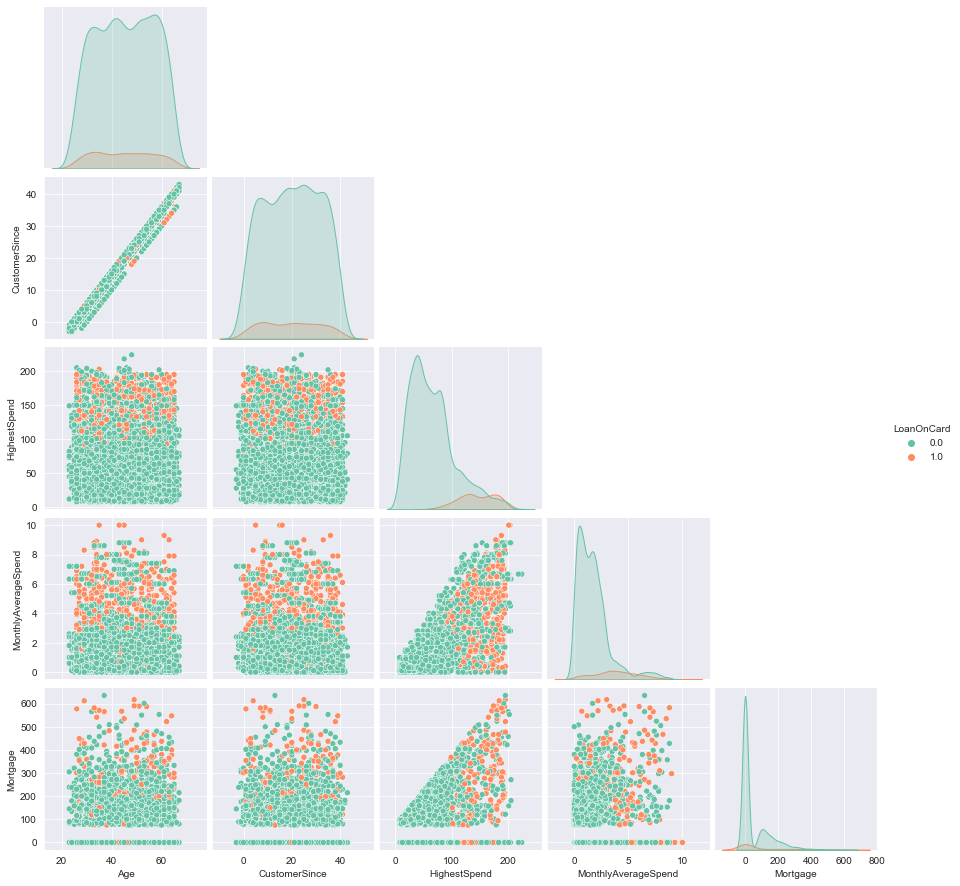

In [278]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.pairplot(df3, hue="LoanOnCard",corner=True)
plt.show()

* from the above pair plot, we're not able to understand much due to the large amount of outlier points.

**Correlation Heatmap**

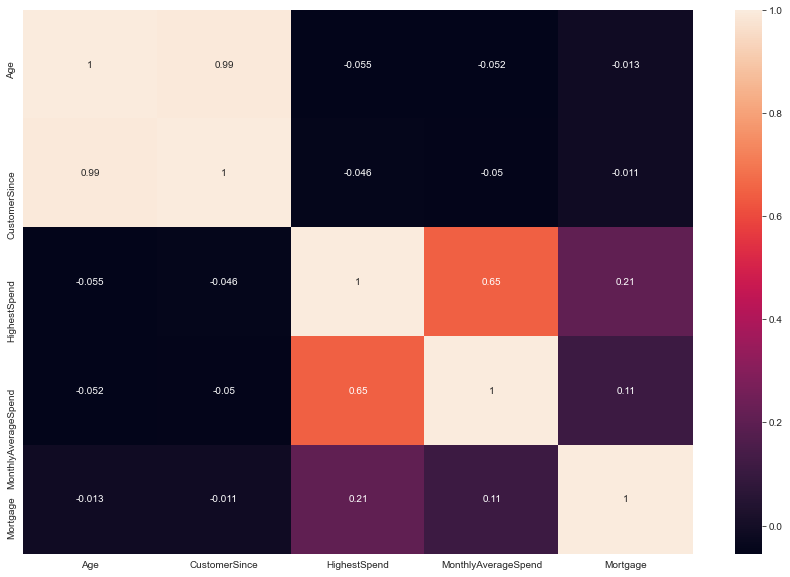

In [279]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df3.corr(),annot=True)
plt.show()

* Since, Age and CustomerSince are extremely correlated, we can drop either one.
* HighestSpend has high correlation with MonthlyAverageSpend

* Mortgage and HighestSpend have low correlation with each other.

* Rest of the variables do not have any relation.



<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.4 Comments for Statistical Univariate ,Bivariate and Multivariate analysis

<font size="3">• The statistical Univariate ,Bivariate ,and Multivariate analysis is crucial for understanding the dataset, using this, we can find hidden patterns and how the different attributes are related to one other. </font>

<font size="3"><b>Univariate Analysis</b></font>

<font size="3"><b>1)</b> We had used distplot on the dataset to understand the shape of the dataset. It turned out to be a bimodal in nature, hence would not be following normal distribution by default and have to use Chebyshevs Inequality rule to understand the nature of the dataset. But that was not performed, instead the data was normalized to make it easier for model building and further analysis. </font>
    
<font size="3"><b>2)</b> We had plotted Piechart and bargraph of the all categorical attributes in the dataset. From that we have found that the following are the distribution within the data:
    
>Hidden Score 1 > Hidden Score 2 > Hidden Score 4 > Hidden Score 3 in count
    
>Level 1 > Level 3 > Level 2 in count
    
>Security (0) > Secuiry (1)
    
>FixedDepositAccount (0) > FixedDepositAccount (1) in count
    
>Internet Banking (1) > Internet Banking (0) in count
    
>Credit card (0) > Credit Card (1) in count
    
>LoanOnCard (0) > LoanOnCard (1) in count
    
>Bay Area > Southern > Los Angeles Region > Central > Superior in count
    
</font>   

<font size="3"><b>3)</b> We had plotted a boxplot for all the numerical attributes in the dataset and found that there are a lot of outliers, Interquartile range (IQR) was calculated for each attribute and using that, the outliers in the lower and upper fence were estimated. It is found that the total number of outliers in the dataset were as follows:  
    
>Age had 0 outliers
    
>CustomerSince had 0 outliers
    
>HighestSpend had 96 outliers
    
>MonthlyAverageSpend had 324 outliers
    
>Mortgage had 291 outliers </font> 


<font size="3"><b>4)</b> We had plotted a histogram for mean, median and mode to understand the positions of the mean,median and mode in the dataset with respect to the attributes. It was observed that for 
    
><i>Age</i> was slightly Left skewed or Negative Skewness.
    
><i>CustomerSince</i> was slightly Left skewed or Negative Skewness.
    
><i>HighestSpend</i> was highly Right skewed or Postive Skewness.
    
><i>MonthlyAverageSpend</i> was very highly Right skewed or Postive Skewness.
    
><i>Mortgage</i> was extremely Right skewed or Postive Skewness.
        

<font size="3"><b>5)</b> We had plotted a distplot for checking the skewness and kurtosis of the attributes in the dataset, the Age, CustomerSince, HighestSpend, MonthlyAverageSpend, Mortgage had the skewness of 
    
><i>Age</i>(-0.030) = Left/negative skewness
    
><i>CustomerSince</i>(-0.027) = Left/negative skewness
    
><i>HighestSpend</i>(0.839) = right/positive skewness
    
><i>MonthlyAverageSpend</i>(1.595) = right/positive skewness 
   
><i>Mortgage</i>(2.101) = right/positive skewness 
    
    
The Kurtosis values are as follows,   
    
>Age = -1.154 signifies peak with high depression 
    
>CustomerSince = -1.123 signifies signifies peak with high depression
    
>HighestSpend =  -0.050 signifies peak with moderate depression
    
>MonthlyAverageSpend = 2.631 signifies peak with extremely high sharpness
    
> Mortgage = 4.740 signifies peak with extremely high sharpness</font> 

<font size="3"><b>6)</b> We had plotted a cumulative distribution plot is used to show the data in dataset from lowest to highest value in a single plot.</font>   

<font size="3"><b>Bivariate Analysis</b></font>

<font size="3"><b>1)</b> We had used a barplot checking the relation between numerical attributes in the dataset 

I) Hidden score is shortened to 'HS' for easier understanding.
    
>HiddenScore Vs Age - Average age to hidden scores of customer is as follows: HS3 (46.1) > HS1 (45.8) > HS2 (45.5) > HS4 (44.4)

>HiddenScore Vs CustomerSince - Average customer since the bank opened to hidden scores of customer is as follows: HS3 (20.7) > HS1 (20.6) > HS2 (20.3) >HS4 (18.8)

>HiddenScore Vs HighestSpend - Average highest spent in the bank to hidden scores of customer is as follows: HS2 (84.3) > HS1 (78.8) > HS3(66.9) > HS4 (62.6)

>HiddenScore Vs MonthlyAverageSpend - Monthly Average spent in the bank to hidden scores of customer is as follows: HS2 (2.2) > HS1 (2.1) > HS3(1.7) = HS4 (1.7)

>HiddenScore Vs Mortgage - Average Mortgage taken in the bank to hidden scores of customer is as follows: HS2 (63.7) > HS1 (55.9) > HS3(53.7) > HS4 (52.3)    
    
* Which means bank prioritizes Hidden score 1 > Hidden score 2 > Hidden score 3 > Hidden score 4. The Hidden score seems to be credit scores which is a number that is calculated based on credit information collected by bank, so that lenders use this to assess the risk based on this score, and will accordingly charge interest rate when loaning money. 

II) Level is shortened to 'lvl' for easier understanding.
    
>Level Vs Age - Average age to Level associated with customers is as follows: lvl3 (46.2) > lvl2 (45.1) > lvl1 (45.0)

>Level Vs CustomerSince - Average customer since the bank opened to Level associated with customers is as follows: lvl3 (20.5)>  lvl1 (20.1) > lvl2 (19.8)

>Level Vs HighestSpend - Average highest spent in the bank to Level associated with customersr is as follows: lvl1 (85.7) > lvl3 (66.1) > lvl2(64.4)

>Level Vs MonthlyAverageSpend - Monthly Average spent in the bank to Level associated with customers is as follows: lvl1 (2.3) > lvl2 (1.7) = lvl3(1.7)

>Level Vs Mortgage - Average Mortgage taken in the bank to Level associated with customers is as follows: lvl1 (63.7) > lvl3 (55.9) > lvl2(53.7)    

* Which means bank prioritizes level 1 > level 2 > level 2 > level 3. These are priority levels.

III) Security is shortened to 'Sec' for easier understanding. Also in this case, it is only 0 or 1 so we can interpret it as security present (1) or absent (0).
    
>Security Vs Age - Average age to Security associated with customers is as follows: 45.4 for both security present and absent.

>Security Vs CustomerSince - Average customer since the bank opened to Security associated with customers is as follows: 20.1 for both security present and absent

>Security Vs HighestSpend - Average highest spent in the bank to Security associated with customersr is as follows: 73.9 for security absent and 73.5 for security present.

>Security Vs MonthlyAverageSpend - Monthly Average spent in the bank to Security associated with customers is as follows: 2.0 for security present and 1.9 for security absent.

>Security Vs Mortgage - Average Mortgage taken in the bank to Security associated with customers is as follows: 56.8 for security absent and 55.1 for security absent.
    
* Which means that when a customer leaves security assets with the bank, they have slightly higher expenditure monthly and would take more loans but lower maximum expenditure and vice versa for without security assets with the bank. The bank is benefitted with customers with security assets (1) rather than customers without security assets (0)

IV) FixedDepositAccount is shortened to 'FD' for easier understanding. Also in this case, it is only 0 or 1 so we can interpret it as FD present (1) or absent (0).
    
>FixedDepositAccount Vs Age - Average age to FixedDepositAccount associated with customers is as follows: 45.7 with FD (1) and 45.3 without FD (0).

>FixedDepositAccount Vs CustomerSince - Average customer since the bank opened to FixedDepositAccount associated with customers is as follows: 20.6 with FD (1) and 20.1 without FD (0).

>FixedDepositAccount Vs HighestSpend - Average highest spent in the bank to FixedDepositAccount associated with customersr is as follows: 104.6 with FD (1) and 71.9 without FD (0).

>FixedDepositAccount Vs MonthlyAverageSpend - Monthly Average spent in the bank to FixedDepositAccount associated with customers is as follows: 2.9 with FD (1) and 1.9 without FD (0).

>FixedDepositAccount Vs Mortgage - Average Mortgage taken in the bank to FixedDepositAccount associated with customers is as follows: 92.3 with FD (1) and 54.3 without FD (0).
    
* Which means that when a customer has a FixedDepositAccount with the bank, they have higher maximum expenditure, higher expenditure monthly and would take more loans with the bank in comparison to customer without FixedDepositAccount with the bank. Bank is benefitted by the customers with FD (1) than without FD (0).

V) InternetBanking is shortened to 'IB' for easier understanding. Also in this case, it is only 0 or 1 so we can interpret it as IB present (1) or absent (0)
    
>InternetBanking Vs Age - Average age to InternetBanking associated with customers is as follows: 45.5 with IB (1) and 45.2 without IB (0).

>InternetBanking Vs CustomerSince - Average customer since the bank opened to InternetBanking associated with customers is as follows: 20.2 with IB (1) and 20.0 without IB (0).

>InternetBanking Vs HighestSpend - Average highest spent in the bank to InternetBanking associated with customersr is as follows: 74.4 with IB (1) and 73.1 without IB (0).

>InternetBanking Vs MonthlyAverageSpend - Monthly Average spent in the bank to InternetBanking associated with customers is as follows: 1.9 for both with IB (1) and without IB (0).

>InternetBanking Vs Mortgage - Average Mortgage taken in the bank to InternetBanking associated with customers is as follows: 56.0 with IB (1) and 57.5 without IB (0).
    
* Which means that when a customer has a InternetBanking with the bank, they have higher maximum expenditure, same expenditure monthly and would take fewer loans with the bank in comparison to customer without InternetBanking with the bank. Bank is benefitted by the customers with IB (1) than without IB (0) in max expenditure alone but customers without IB would take mortgage which would benefit the bank too. Hence, both are of equivalent weightage to the bank.
    
VI) Creditcard is shortened to 'CredCd' for easier understanding. Also in this case, it is only 0 or 1 so we can interpret it as CredCd present (1) or absent (0). 
    
>Creditcard Vs Age - Average age to Creditcard associated with customers is as follows: 45.5 with CredCd (1) and 45.3 without CredCd (0).

>Creditcard Vs CustomerSince - Average customer since the bank opened to Creditcard associated with customers is as follows: 20.3 with CredCd (1) and 20.1 without CredCd (0).

>Creditcard Vs HighestSpend - Average highest spent in the bank to Creditcard associated with customersr is as follows: 73.7 with CredCd (1) and 73.9 without CredCd (0).

>Creditcard Vs MonthlyAverageSpend - Monthly Average spent in the bank to Creditcard associated with customers is as follows: 1.9 for both with CredCd (1) and without CredCd (0).

>Creditcard Vs Mortgage - Average Mortgage taken in the bank to Creditcard associated with customers is as follows: 55.4 with CredCd (1) and 57.1 without CredCd (0).
    
* Which means that when a customer has a Creditcard with the bank, they have lower maximum expenditure, same expenditure monthly and would take fewer loans with the bank in comparison to customer without Creditcard with the bank. Bank is benefitted by the customers without CredCd (0) than with CredCd (0) as they will get more maximum expenditures and more loans from customers without creditcards. However, this will all vary from person to person, based on their credit score.

VII) LoanonCard is shortened to 'loan' for easier understanding. Also in this case, it is only 0 or 1 so we can interpret it as loan present (1) or absent (0).
    
>LoanonCard Vs Age - Average age to LoanonCard associated with customers is as follows: 45.1 with loan (1) and 45.4 without loan (0).

>LoanonCard Vs CustomerSince - Average customer since the bank opened to LoanonCard associated with customers is as follows: 19.8 with loan (1) and 20.1 without loan (0).

>LoanonCard Vs HighestSpend - Average highest spent in the bank to LoanonCard associated with customersr is as follows: 144.7 with loan (1) and 66.6 without loan (0).

>LoanonCard Vs MonthlyAverageSpend - Monthly Average spent in the bank to LoanonCard associated with customers is as follows: 3.9 with loan (1) and 1.7 without loan (0).

>LoanonCard Vs Mortgage - Average Mortgage taken in the bank to LoanonCard associated with customers is as follows: 100.8 with loan (1) and 51.9 without loan (0).
    
* Which means that when a customer has a LoanonCard with the bank, they have higher maximum expenditure, higher monthly expenditure and would take more loans with the bank in comparison to customer without LoanonCard with the bank. Bank is benefitted by the customers with loan (1) than without loan (0) as they will get more maximum expenditures, monthly expenditure and more loans from customers with loan on cards.

VIII) Note: The following regions will be abbreviated for easier depiction of data : Southern - STH, Bay Area- BAY, Los Angeles Region - LA, Superior - SPR, Central - CNL
    
>Regions Vs Age - Average age to Regions associated with customers is as follows: LA > STH > SPR = BAY > CNL

>Regions Vs CustomerSince - Average customer since the bank opened to Regions associated with customers is as follows: LA > STH> SPR > BAY > CNL

>Regions Vs HighestSpend - Average highest spent in the bank to Regions associated with customers is as follows: LA > STH > BAY> SPR > CNL

>Regions Vs MonthlyAverageSpend - Monthly Average spent in the bank to Regions associated with customers is as follows: LA = STH = BAY > SPR > CNL

>Regions Vs Mortgage - Average Mortgage taken in the bank to Regions associated with customers is as follows: SPR > CNL > STH > LA > BAY
    
* This indicates that, Expenditure : LA > STH > BAY > SPR > CNL and Loan : SPR > CNL > STH > LA > BAY

<font size="3"><b>2)</b> We had plotted a barplot with 2 categorical and 1 numerical attribute where hue = "LoanOnCard" </font>
    
<font size="3">I) <u>Age vs Catgeorical attributes and LoanOnCard</u>
    
>Hidden score - HS1 (0>1) , HS2 (1>0), HS3 (0>1), HS4 (1>0)

From this, we have understood that Hidden score 2 and 4 has higher proportion of aged customers with loan and Hidden score 1 and 3 higher proportion of aged customers without loan.
    
>Level - lvl1 (1>0), lvl2 (0>1), lvl3 (0>1)

From this, we have understood that level 1 higher proportion of aged customers with loan while level 2 and 3 have higher proportion of aged customers without loan.
    
>Security - sec0 (0>1), sec1 (0>1)

From this, we have understood that for both with and without security of asset, theres higher proportion of aged customers without loan.
    
>FixedDepositAccount - fd0(0>1), fd1(1>0)

From this, we have understood that for customers with FD, theres a higher proportion of aged customers with loan and for customers without FD, theres higher proportion of aged customers without loan.
    
>InternetBanking - IB0 (0>1), IB1 (0>1)

From this, we have understood that for both with and without Internet Banking, theres higher proportion of aged customers without loan.
    
>CreditCard - CredCd0 (0>1), Credcd1 (0=1)

From this, we have understood that for customers with credit card, theres an equal proportion of aged customers with loan and without loan while the customers without credit card have a higher proportion of aged customers without loan.
    
>Regions - STH (0>1), BAY (0>1), LA (1>0), SPR (1>0), CNL (0 = 1)

From this, we have understood that, In southern and bay area, the higher proportion of aged customers dont have loan. While in Los Angeles and Superior Region, the higher proportion of aged customers have loan. In Central, theres an equal proportion of aged customers with loan and without loan.
    
<font size="3">II) <u>CustomerSince vs Catgeorical attributes and LoanOnCard</u>

>Hidden score - HS1 (0>1) , HS2 (1>0), HS3 (0>1), HS4 (1>0)

From this, we have understood that Hidden score 2 and 4 has higher proportion of older customers with loan and Hidden score 1 and 3 higher proportion of older customers without loan.
    
>Level - lvl1 (1>0), lvl2 (0>1), lvl3 (0>1)

From this, we have understood that level 1 higher proportion of older customers with loan while level 2 and 3 have higher proportion of older customers without loan.
    
>Security - sec0 (0>1), sec1 (0>1)

From this, we have understood that for both with and without security of asset, theres higher proportion of older customers without loan.
    
>FixedDepositAccount - fd0(0>1), fd1(1>0)

From this, we have understood that for customers with FD, theres a higher proportion of older customers with loan and for customers without FD, theres higher proportion of older customers without loan.
    
>InternetBanking - IB0 (0>1), IB1 (1>0)

From this, we have understood that for customers with Internet Banking, theres a higher proportion of older customers with loan and for customers without Internet Banking, theres higher proportion of older customers without loan.
    
>CreditCard - CredCd0 (0>1), Credcd1 (1>0)

From this, we have understood that for customers with credit card, theres a higher proportion of older customers with loan and without loan while the customers without credit card have a higher proportion of older customers without loan.
    
>Regions - STH (0>1), BAY (0>1), LA (1>0), SPR (1>0), CNL (0>1)

From this, we have understood that, In Southern, Bay area and Central the higher proportion of older customers dont have loan. While in Los Angeles and Superior Region, the higher proportion of older customers have loan.    
   
<font size="3">III) <u>HighestSpend vs Catgeorical attributes and LoanOnCard</u> 
    
>Hidden score - HS1 (1>0) , HS2 (1>0), HS3 (1>0), HS4 (1>0)

From this, we have understood that for that all hidden scores are favouring loan for customers with highest max expenditure than without loan.
    
>Level - lvl1 (1>0), lvl2 (1>0), lvl3 (1>0)

From this, we have understood that for that all levels are favouring loan for customers with highest max expenditure than without loan.
    
>Security - sec0 (1>0), sec1 (1>0)

From this, we have understood that for with and without security it is favouring loan for customers with highest max expenditure than without loan.
    
>FixedDepositAccount - fd0(1>0), fd1(1>0)

From this, we have understood that for with and without FixedDeposits it is favouring loan for customers with highest max expenditure than without loan.
    
>InternetBanking - IB0 (1>0), IB1 (1>0)

From this, we have understood that for with and without Internet Banking it is favouring loan for customers with highest max expenditure than without loan.
    
>CreditCard - CredCd0 (1>0), Credcd1 (1>0)

From this, we have understood that for with and without Credit Card it is favouring loan for customers with highest max expenditure than without loan.
    
>Regions - STH (1>0), BAY (1>0), LA (1>0), SPR (1>0), CNL (1>0)

From this, we have understood that for all regions it is favouring loan for customers with highest max expenditure than without loan.

<font size="3">IV) <u>MonthlyAverageSpend  vs Catgeorical attributes and LoanOnCard</u>   
    
>Hidden score - HS1 (1>0) , HS2 (1>0), HS3 (1>0), HS4 (1>0)

From this, we have understood that for that all hidden scores are favouring loan for customers with highest monthly average expenditure than without loan.
    
>Level - lvl1 (1>0), lvl2 (1>0), lvl3 (1>0)

From this, we have understood that for that all levels are favouring loan for customers with highest monthly average expenditure than without loan.
    
>Security - sec0 (1>0), sec1 (1>0)

From this, we have understood that, for with and without security it is favouring loan for customers with highest monthly average expenditure than without loan.
    
>FixedDepositAccount - fd0(1>0), fd1(1>0)

From this, we have understood that, for with and without Fixed Deposit Account it is favouring loan for customers with highest monthly average expenditure than without loan.
    
>InternetBanking - IB0 (1>0), IB1 (1>0)

From this, we have understood that, for with and without Internet Banking it is favouring loan for customers with highest monthly average expenditure than without loan.
    
>CreditCard - CredCd0 (1>0), Credcd1 (1>0)

From this, we have understood that, for with and without Credit card it is favouring loan for customers with highest monthly average expenditure than without loan.
    
>Regions - STH (1>0), BAY (1>0), LA (1>0), SPR (1>0), CNL (1>0)

From this, we have understood that for all regions it is favouring loan for customers with highest monthly average expenditure than without loan.
    
<font size="3">V) <u>Mortgage  vs Catgeorical attributes and LoanOnCard</u>    

>Hidden score - HS1 (1>0) , HS2 (1>0), HS3 (1>0), HS4 (1>0)

From this, we have understood that for that all hidden scores are favouring loan for customers with highest Mortgage than without loan.
    
>Level - lvl1 (1>0), lvl2 (1>0), lvl3 (1>0)

From this, we have understood that for that all levels are favouring loan for customers with highest Mortgage than without loan.
    
>Security - sec0 (1>0), sec1 (1>0)

From this, we have understood that, for with and without security it is favouring loan for customers with highest Mortgage than without loan.
    
>FixedDepositAccount - fd0(1>0), fd1(1>0)

From this, we have understood that, for with and without Fixed Deposit Account it is favouring loan for customers with highest Mortgage than without loan.
    
>InternetBanking - IB0 (1>0), IB1 (1>0)

From this, we have understood that, for with and without Internet Banking it is favouring loan for customers with highest Mortgage than without loan.
    
>CreditCard - CredCd0 (1>0), Credcd1 (1>0)

From this, we have understood that, for with and without CreditCard it is favouring loan for customers with highest Mortgage than without loan.
    
>Regions - STH (1>0), BAY (1>0), LA (1>0), SPR (1>0), CNL (1>0)

From this, we have understood that for all regions it is favouring loan for customers with highest Mortgage than without loan. 
    
<font size="3"><b>Multivariate Analysis</b></font>
    
<font size="3"><b>1)</b> We had plotted a pairplot with hue = "LoanOnCard" and the data had too many outliers and was not interpretable </font>
    
<font size="3"><b>2)</b> We had plotted a Correlation heatmap</font> 

From this, we have found that: 

>Age and CustomerSince are extremely correlated. hence, we can drop either one.

>HighestSpend has high correlation with MonthlyAverageSpend

>Mortgage and HighestSpend have low correlation with each other.

>Rest of the variables do not have any relation.    

<font size="5"><p style="color:black"> <b> 4. Data pre-processing:</p></font>

### Hypothesis Testing

* We can statistically check whether all the independent variables has significant effect on target variables

In [280]:
dfmodel = df3.copy()

In [281]:
class_summary=dfmodel.groupby('LoanOnCard') #getting mean values of each class for all independent variables
class_summary.mean().reset_index()

,LoanOnCard,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage
0,0.0,45.381863,20.14581,66.300511,1.730100,51.880640
1,1.0,45.066667,19.84375,144.745833,3.905354,100.845833


* Highest Spend mean values varies for loan and non-loan customer

* Age's mean is equal for each of the class of mean

**1) Statistical Testing of continuous feature with target variable**

In [282]:
col=list(dfmodel.select_dtypes(include=['int64','float64']).columns)

**Here we will be using two-sample unpaired t-test**

a) Ho(Null Hypothesis):There is no significant difference in independent feature with different category of Target variable

b) H1(Alternate Hypothesis):There is significant difference in independent feature with different category of Target variable

In [283]:
for i in col:
    x = np.array(dfmodel[dfmodel.LoanOnCard == 0][i]) 
    y = np.array(dfmodel[dfmodel.LoanOnCard == 1][i])
    t, p_value  = stats.ttest_ind(x,y, axis = 0,equal_var=False) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} of Loan holders and non-Loan holders are not same'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} of Loan holders and non-Loan holders are  same'.format('\033[1m',i))
    print('\n')

 P_Value:0.570946949557154
 Fail to Reject Null Hypothesis.Age of Loan holders and non-Loan holders are  same


 P_Value:0.5868661609116186
 Fail to Reject Null Hypothesis.CustomerSince of Loan holders and non-Loan holders are  same


 P_Value:1.6240492024592886e-227
 Rejecting Null Hypothesis.HighestSpend of Loan holders and non-Loan holders are not same


 P_Value:2.488579006524997e-77
 Rejecting Null Hypothesis.MonthlyAverageSpend of Loan holders and non-Loan holders are not same


 P_Value:1.3521199013695866e-10
 Rejecting Null Hypothesis.Mortgage of Loan holders and non-Loan holders are not same




* We can see Age and CustomerSince does not have effect on target variable. So these attributes are dropped before building a model.

In [284]:
dfmodel.drop(['Age','CustomerSince'],axis=1,inplace=True)

**2) Statistical Testing of categorical features with target variable**

1) Ho: There is no significant difference in hidden score for different category of target variable(Loan on card)

2) H1: There is significant difference in hidden score for different category of target variable(Loan on card)   

In [285]:
crosstab=pd.crosstab(dfmodel['LoanOnCard'],dfmodel['HiddenScore'])
print(crosstab)

HiddenScore     1     2    3     4
LoanOnCard                        
0.0          1359  1187  873  1080
1.0           107   106  133   134


Does the above data provide sufficient evidence at the 5% significance level to infer that there are differences in Hiddenscore among Loan on card (0 and 1)?

In [286]:
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
print('P_Value:', p_value)

P_Value: 1.4905556031851218e-06


In [287]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('{} Rejecting Null Hypothesis. \n There is significant difference in hidden score for different category of target variable(Loan on card)'.format('\033[1m'))
else:
    print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in hidden score for different category of target variable(Loan on card)'.format('\033[1m'))

 Rejecting Null Hypothesis. 
 There is significant difference in hidden score for different category of target variable(Loan on card)


**Similarly hypothesis testing is performed on th other categorical attributes**

In [288]:
cat=list(dfmodel.select_dtypes(include=['category']).columns)

In [289]:
cat.remove('HiddenScore')
cat.remove('LoanOnCard')

In [290]:
for i in cat:
    crosstab=pd.crosstab(dfmodel['LoanOnCard'],dfmodel[i])
    chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    print('\n')

 Fail to Reject Null Hypothesis.
 There is no significant difference in ZipCode Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in Level Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in Security Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in FixedDepositAccount Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in InternetBanking Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in CreditCard Feature for different category of target variable(Loan on card)




* We can see ZipCode, Security, InternetBanking and CreditCard does not have significant difference in target variable. So these attributes are dropped before model building.

In [291]:
dfmodel.drop(['ZipCode','CreditCard','InternetBanking','Security'],axis=1,inplace=True)

* Also additionally, "County" and "Regions" were added to understand the dataset. Hence, we can remove it too as it wont contribute to the model's target attribute "LoanOnCard".

In [292]:
dfmodel.drop(['County','Regions'],axis=1,inplace=True)

In [293]:
dfmodel #Final dataset, which will be used in the model

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount,LoanOnCard
0,180,1,8.9,3,0,0,1.0
1,105,4,2.4,3,0,0,0.0
2,45,3,0.1,2,0,0,0.0
3,114,2,3.8,3,0,0,0.0
4,40,4,2.5,2,0,0,0.0
...,...,...,...,...,...,...,...
4974,40,1,1.9,3,0,0,0.0
4975,15,4,0.4,1,85,0,0.0
4976,24,2,0.3,3,0,0,0.0
4977,49,3,0.5,2,0,0,0.0


In [294]:
dfmodel.max()

HighestSpend           224.0
MonthlyAverageSpend     10.0
Mortgage               635.0
dtype: float64

### This dataset for banking is very unique and has many values that are extreme that occurs like Highest Spend with maximum values of "244k". These values can occur in real life and should not be removed from the dataset just because they are in the extreme end. Hence, outlier treatment will not be performed as "HighestSpend", "MonthlyAverageSpend" and "Mortgage" are crucial attributes which are there in real life too.

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.1 Segregate predictors vs target attributes

In [295]:
# Arrange data into independent variables and dependent variables
X1=dfmodel.drop(columns='LoanOnCard')
y1=dfmodel['LoanOnCard'] #target

In [296]:
X1

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount
0,180,1,8.9,3,0,0
1,105,4,2.4,3,0,0
2,45,3,0.1,2,0,0
3,114,2,3.8,3,0,0
4,40,4,2.5,2,0,0
...,...,...,...,...,...,...
4974,40,1,1.9,3,0,0
4975,15,4,0.4,1,85,0
4976,24,2,0.3,3,0,0
4977,49,3,0.5,2,0,0


In [297]:
y1

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4974    0.0
4975    0.0
4976    0.0
4977    0.0
4978    0.0
Name: LoanOnCard, Length: 4979, dtype: category
Categories (2, float64): [0.0, 1.0]

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.2 Check for target balancing. Add your comments

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.2.1 Check for Target Imbalances

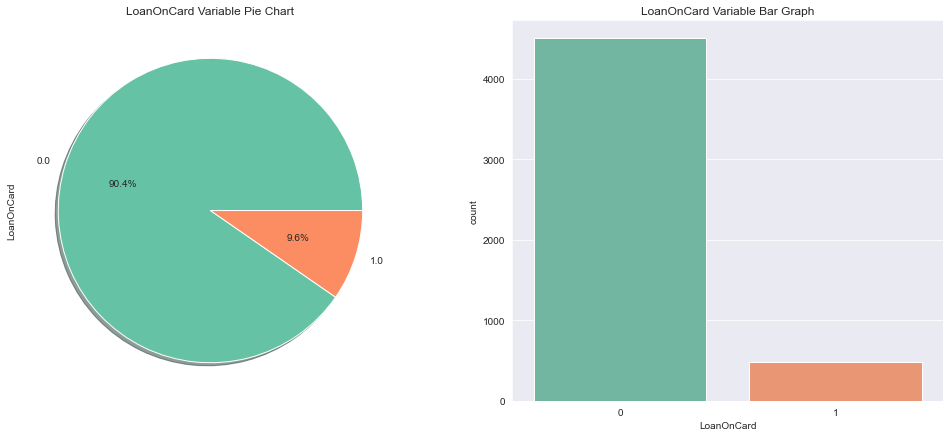

In [298]:
f,axes=plt.subplots(1,2,figsize=(17,7))
dfmodel['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=dfmodel,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

In [299]:
target_count = dfmodel.LoanOnCard.value_counts()
print('LoanOnCard 0:', target_count[0],'\n')
print('LoanOnCard 1:', target_count[1],'\n')

print('Proportion:', round(target_count[0] / target_count[1], 4), ': 1')

LoanOnCard 0: 4499 

LoanOnCard 1: 480 

Proportion: 9.3729 : 1


From this it is understandable that the target variable is unevenly distributed where LoanOnCard 0 has 90.4% while LoanOnCard 1 has 9.6%, so majority of the data would assume LoanOnCard 0. That is around 4499  of "LoanOnCard 0" and 480  of "LoanOnCard 1". 

If minority is within this percentage, then it is considered as :   <b>(Citation: Arora, Nisha. (2021). Re: How to know that our dataset is imbalance?)</b>.     
    
>mild ---> 20-40% of the data set
    
>Moderate ---> 1-20% of the data set
    
>Extreme ---> <1% of the data set 
                 
In this case, the LoanOnCard target attribute is Moderately imbalanced at 9.6% (between 1-20%) and is required to get treated before it can be used for modelling. 

If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them. This will result in a high bias in the model.

A widely adopted technique for dealing with highly unbalanced datasets is called resampling.

**Two widely used resampling methods:**
    
1)Undersampling: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

2) Oversampling: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class

* Here we will use oversampling because undersampling may remove important information from the dataset

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.2.1 Target Balancing with SMOTE

**Smote for entire Data**

In [300]:
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(X1,y1)

In [301]:
print('Before sampling:')
print(y1.value_counts())

Before sampling:
0.0    4499
1.0     480
Name: LoanOnCard, dtype: int64


In [302]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
0.0    4499
1.0    4499
Name: LoanOnCard, dtype: int64


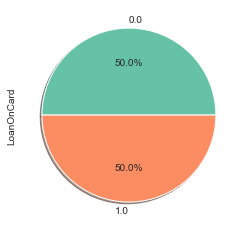

In [303]:
y_s.value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

* Now the Model is balanced

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 4.3 Perform train-test split.

In [304]:
# Split X and y into training and test set in 70:30 ratio
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_s, y_s, train_size = 0.70, test_size=0.30, random_state=10)

In [305]:
# Checking shape of Train dataset (70%)
print(X_train1.shape) 
print(y_train1.shape) 

(6298, 6)
(6298,)


In [306]:
# Checking shape of Test dataset (30%)
print(X_test1.shape)
print(y_test1.shape)

(2700, 6)
(2700,)


<font size="5"><p style="color:black"> <b> 5. Model training, testing and tuning:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 5.1 Design and train a Logistic regression and Naive Bayes classifiers.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.1 Logistic Regression Classifier Model

In [307]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver='lbfgs', max_iter=1000)
logit.fit(X_train1, y_train1)
logit_pred = logit.predict(X_test1)
logit_pred1 = logit.predict(X_train1)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.2 Naive Bayes Classifier Model

In [308]:
from sklearn.naive_bayes import GaussianNB
g_model = GaussianNB()
g_model.fit(X_train1, y_train1.ravel())
g_pred = g_model.predict(X_test1)
g_pred1 = g_model.predict(X_train1)

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 5.2 Display the classification accuracies for train and test data.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.2.1 Logistic Regression Accuracies

In [309]:
print('Accuracy on Training data:',logit.score(X_train1, y_train1) )
print('Accuracy on Test data:',logit.score(X_test1, y_test1) )

Accuracy on Training data: 0.902667513496348
Accuracy on Test data: 0.8977777777777778


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.2.2 Naive Bayes Accuracies

In [310]:
print('Accuracy on Training data:',g_model.score(X_train1, y_train1) )
print('Accuracy on Test data:',g_model.score(X_test1, y_test1) )

Accuracy on Training data: 0.8450301683073992
Accuracy on Test data: 0.8307407407407408


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 5.3 Display and explain the classification report in detail

Classification accuracy is the total number of correct predictions divided by the total number of predictions made for a dataset.

As a performance measure, accuracy is inappropriate for imbalanced classification problems.

The main reason is that the overwhelming number of examples from the majority class (or classes) will overwhelm the number of examples in the minority class, meaning that even unskillful models can achieve accuracy scores of 90 percent, or 99 percent, depending on how severe the class imbalance happens to be.

An alternative to using classification accuracy is to use precision and recall metrics.

**Precision** - it is the ratio of correctly predicted positive observations to the total predicted positive observations.

Precision = TP/TP+FP

**Recall (Sensitivity)** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. 

Recall = TP/TP+FN

**F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

**Support** - It is the number of occurrences of each class in y_true.



<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.3.1 Logistic Regression Classification report

**Confusion Matrix of train data**

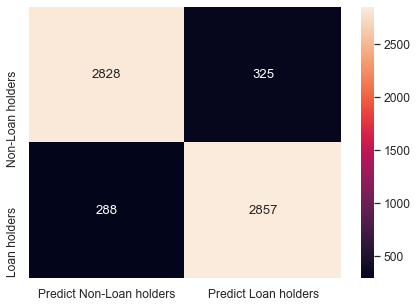

In [311]:
sns.set(font_scale=1.1)
cm = confusion_matrix(y_train1, logit_pred1, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Predict Non-Loan holders","Predict Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

True Positives (TP): we correctly predicted "Bottom right" True positives (Loan holders to Predict Loan holders)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Non-Loan holders to Predict Non-Loan holders)

False Positives (FP): we incorrectly predicted "Bottom left" False Postivies (a "Type I error") that means the samples we predicted as Non-Loan holders were actually Loan holders

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the samples we predicted as Loan holders were Non-Loan holders.

* In this, about 5685 were predicted correctly and 613 were incorrectly predicted out of 6298. That is about 90.26% accurate and 9.73% inaccurate.

**Confusion Matrix of test data**

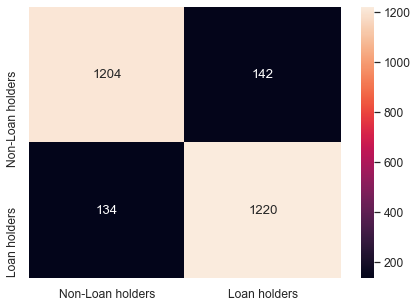

In [312]:
cm = confusion_matrix(y_test1, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

True Positives (TP): we correctly predicted "Bottom right" True positives (Loan holders to Predict Loan holders)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Non-Loan holders to Predict Non-Loan holders)

False Positives (FP): we incorrectly predicted "Bottom left" False Postivies (a "Type I error") that means the samples we predicted as Non-Loan holders were actually Loan holders

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the samples we predicted as Loan holders were Non-Loan holders.

* In this, about 2424 were predicted correctly and 276 were incorrectly predicted out of 2700. That is about 89.77% accurate and 10.22% inaccurate.

**Classification Report of Train Data**

In [313]:
print("classification  Matrix:\n",classification_report(y_train1,logit_pred1))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      3153
         1.0       0.90      0.91      0.90      3145

    accuracy                           0.90      6298
   macro avg       0.90      0.90      0.90      6298
weighted avg       0.90      0.90      0.90      6298



**Classification Report of Test Data**

In [314]:
print("classification  Matrix:\n",classification_report(y_test1,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      1346
         1.0       0.90      0.90      0.90      1354

    accuracy                           0.90      2700
   macro avg       0.90      0.90      0.90      2700
weighted avg       0.90      0.90      0.90      2700



* Really good precision and recall value for both 0 - no loan on card and 1 - loan on card. Hence, even f1-score is pretty good.

**ROC Curve for Train Data**

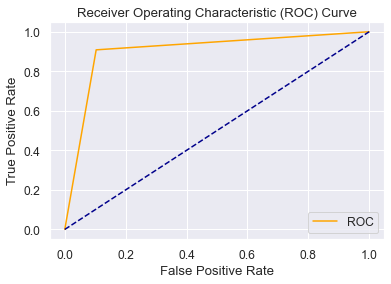

Area under the curve:  0.9026748189954101


In [315]:
# Loading the probability values for positive class
y_prob = logit.predict_proba(X_train1)[:,1]

# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_train1, logit_pred1, pos_label=1)

# Plotting the ROC curve
plot_roc_curve(fpr, tpr)

# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

**ROC Curve for Test Data**

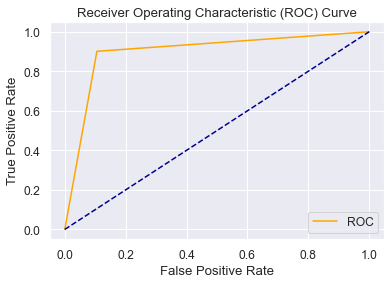

Area under the curve:  0.897768101119132


In [316]:
# Loading the probability values for positive class
y_prob = logit.predict_proba(X_test1)[:,1]

# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test1, logit_pred, pos_label=1)

# Plotting the ROC curve
plot_roc_curve(fpr, tpr)

# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

**Precision-Recall curve**

Area under the curve:  0.897768101119132
Best Threshold=1.000000, F-Score=0.898


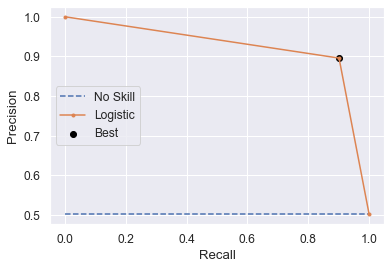

In [317]:
from sklearn.metrics import precision_recall_curve
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

# Calculating the Precision, Recall and the threshold values
precisionz, recallz, thresholdsz = precision_recall_curve(y_test1, logit_pred)

# Calculate the f score for all threshold values
fscorez = (2 * precisionz * recallz) / (precisionz + recallz)

# Locate the index of the largest f score
ixz = np.argmax(fscorez)

# Display the Best cutoff point based on the best f score
print('Best Threshold=%f, F-Score=%.3f' %(thresholdsz[ixz], fscorez[ixz]))

# Plot the precision-recall curve for the model
no_skillz = len(y_test1[y_test1==1]) / len(y_test1)
plt.plot([0,1], [no_skillz,no_skillz], linestyle='--', label='No Skill')
plt.plot(recallz, precisionz, marker='.', label='Logistic')
plt.scatter(recallz[ixz], precisionz[ixz], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [318]:
# Create and display the dataframe of all metric values
df_scores9 = pd.DataFrame({'precision' : pd.Series(precisionz),
                    'recall' : pd.Series(recallz), 
                    'fscore' : pd.Series(fscorez), 
                    'thresholds' : pd.Series(thresholdsz)})
df_scores9

,precision,recall,fscore,thresholds
0,0.501481,1.000000,0.667982,0.0
1,0.895742,0.901034,0.898380,1.0
2,1.000000,0.000000,0.000000,NaN


**Root mean square error (RMSE) for Train Data**

In [319]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train1, logit_pred1)
rmse = sqrt(mse)
print("Root mean square error for Train Data is",rmse)

Root mean square error for Train Data is 0.31198154833844255


**Root mean square error (RMSE) for Test Data**

In [320]:
mse = mean_squared_error(y_test1, logit_pred)
rmse = sqrt(mse)
print("Root mean square error for Test Data is",rmse)

Root mean square error for Test Data is 0.3197221015541813


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.3.2 Naive Bayes Classification report

**Confusion Matrix for Train data**

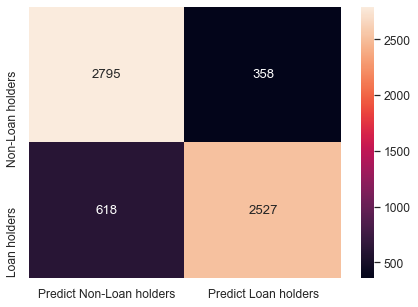

In [321]:
sns.set(font_scale=1.1)
cm = confusion_matrix(y_train1, g_pred1, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Predict Non-Loan holders","Predict Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

True Positives (TP): we correctly predicted "Bottom right" True positives (Loan holders to Predict Loan holders)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Non-Loan holders to Predict Non-Loan holders)

False Positives (FP): we incorrectly predicted "Bottom left" False Postivies (a "Type I error") that means the samples we predicted as Non-Loan holders were actually Loan holders

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the samples we predicted as Loan holders were Non-Loan holders.

* In this, about 5322 were predicted correctly and 976 were incorrectly predicted out of 6298. That is about 84.50% accurate and 15.49% inaccurate.

**Confusion Matrix for Test data**

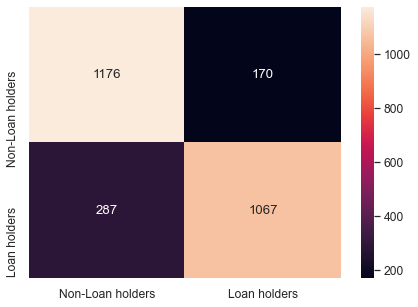

In [322]:
cm = confusion_matrix(y_test1, g_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

True Positives (TP): we correctly predicted "Bottom right" True positives (Loan holders to Predict Loan holders)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Non-Loan holders to Predict Non-Loan holders)

False Positives (FP): we incorrectly predicted "Bottom left" False Postivies (a "Type I error") that means the samples we predicted as Non-Loan holders were actually Loan holders

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the samples we predicted as Loan holders were Non-Loan holders.

* In this, about 2243 were predicted correctly and 457 were incorrectly predicted out of 2700. That is about 83.07% accurate and 16.92% inaccurate.

**Classification Report of Train Data**

In [323]:
print("classification  Matrix:\n",classification_report(y_train1,g_pred1))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      3153
         1.0       0.88      0.80      0.84      3145

    accuracy                           0.85      6298
   macro avg       0.85      0.84      0.84      6298
weighted avg       0.85      0.85      0.84      6298



**Classification Report of Test Data**

In [324]:
print("classification  Matrix:\n",classification_report(y_test1,g_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.80      0.87      0.84      1346
         1.0       0.86      0.79      0.82      1354

    accuracy                           0.83      2700
   macro avg       0.83      0.83      0.83      2700
weighted avg       0.83      0.83      0.83      2700



* The recall value is not very good compared to precision.

**ROC Curve for Train Data**

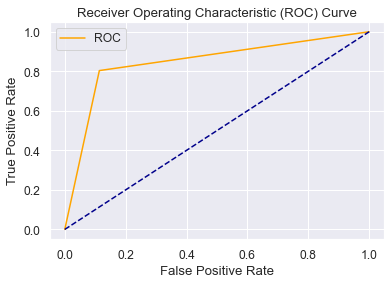

Area under the curve:  0.844977478738043


In [325]:
# Loading the probability values for positive class
y_prob = g_model.predict_proba(X_train1)[:,1]

# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_train1, g_pred1, pos_label=1)

# Plotting the ROC curve
plot_roc_curve(fpr, tpr)

# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

**ROC Curve for Test Data**

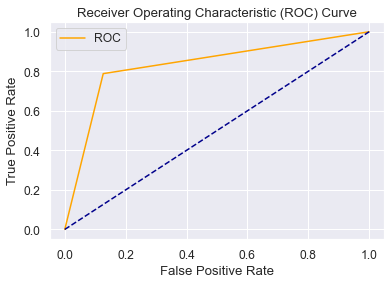

Area under the curve:  0.8308676509642883


In [326]:
# Loading the probability values for positive class
y_prob = g_model.predict_proba(X_test1)[:,1]

# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test1, g_pred, pos_label=1)

# Plotting the ROC curve
plot_roc_curve(fpr, tpr)

# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

**Precision-Recall curve**

Area under the curve:  0.8308676509642883
Best Threshold=1.000000, F-Score=0.824


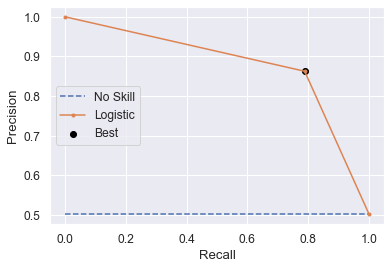

In [327]:
from sklearn.metrics import precision_recall_curve
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

# Calculating the Precision, Recall and the threshold values
precisionx, recallx, thresholdsx = precision_recall_curve(y_test1, g_pred)

# Calculate the f score for all threshold values
fscorex = (2 * precisionx * recallx) / (precisionx + recallx)

# Locate the index of the largest f score
ixx = np.argmax(fscorex)

# Display the Best cutoff point based on the best f score
print('Best Threshold=%f, F-Score=%.3f' %(thresholdsx[ixx], fscorex[ixx]))

# Plot the precision-recall curve for the model
no_skillx = len(y_test1[y_test1==1]) / len(y_test1)
plt.plot([0,1], [no_skillx,no_skillx], linestyle='--', label='No Skill')
plt.plot(recallx, precisionx, marker='.', label='Logistic')
plt.scatter(recallx[ixx], precisionx[ixx], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [328]:
# Create and display the dataframe of all metric values
df_scores8 = pd.DataFrame({'precision' : pd.Series(precisionx),
                    'recall' : pd.Series(recallx), 
                    'fscore' : pd.Series(fscorex), 
                    'thresholds' : pd.Series(thresholdsx)})
df_scores8

,precision,recall,fscore,thresholds
0,0.501481,1.000000,0.667982,0.0
1,0.862571,0.788035,0.823620,1.0
2,1.000000,0.000000,0.000000,NaN


**Root mean square error (RMSE) for Train Data**

In [329]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train1, g_pred1)
rmse = sqrt(mse)
print("Root mean square error for Train Data is",rmse)

Root mean square error for Train Data is 0.39366207804740455


**Root mean square error (RMSE) for Test Data**

In [330]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test1, g_pred)
rmse = sqrt(mse)
print("Root mean square error for Test Data is",rmse)

Root mean square error for Test Data is 0.41141130181274704




<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 5.4 Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained
model with your comments for selecting this model.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.4.1 Logistic Regression Hyperparameter Tuning
    

In [331]:
c_space = np.logspace(-5, 8, 15)
param_grid_lr = {
    'C': c_space,                   
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                           
}

In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=10), param_grid=param_grid_lr, verbose=1, cv=5, n_jobs=-1)
logModel_grid.fit(X_train1, y_train1)
print("Tuned Logistic Regression Parameters: {}".format(logModel_grid.best_estimator_))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Tuned Logistic Regression Parameters: LogisticRegression(C=0.4393970560760795, class_weight='balanced',
                   random_state=10, solver='liblinear')


In [333]:
lgtune_pred1 = logModel_grid.predict(X_train1)
lgtune_pred = logModel_grid.predict(X_test1)

In [334]:
print("Best score is {}".format(logModel_grid.best_score_))

Best score is 0.9047312682022769


**Accuracy**

In [335]:
print('Accuracy on Training data:',logModel_grid.score(X_train1, y_train1) )
print('Accuracy on Test data:',logModel_grid.score(X_test1, y_test1) )

Accuracy on Training data: 0.9060019053667832
Accuracy on Test data: 0.8996296296296297


**Confusion Matrix of train data**

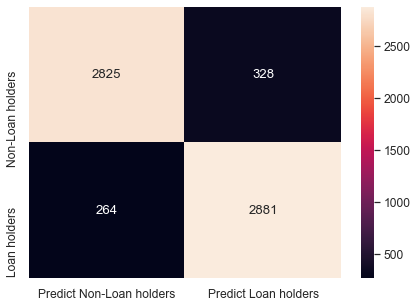

In [336]:
sns.set(font_scale=1.1)
cm = confusion_matrix(y_train1, lgtune_pred1, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Predict Non-Loan holders","Predict Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

True Positives (TP): we correctly predicted "Bottom right" True positives (Loan holders to Predict Loan holders)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Non-Loan holders to Predict Non-Loan holders)

False Positives (FP): we incorrectly predicted "Bottom left" False Postivies (a "Type I error") that means the samples we predicted as Non-Loan holders were actually Loan holders

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the samples we predicted as Loan holders were Non-Loan holders.

* In this, about 5706 were predicted correctly and 592 were incorrectly predicted out of 6298. That is about 90.60% accurate and 9.399% inaccurate.

**Confusion Matrix of test data**

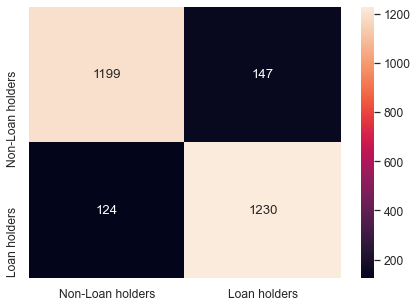

In [337]:
cm = confusion_matrix(y_test1, lgtune_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

True Positives (TP): we correctly predicted "Bottom right" True positives (Loan holders to Predict Loan holders)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Non-Loan holders to Predict Non-Loan holders)

False Positives (FP): we incorrectly predicted "Bottom left" False Postivies (a "Type I error") that means the samples we predicted as Non-Loan holders were actually Loan holders

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the samples we predicted as Loan holders were Non-Loan holders.

* In this, about 2429 were predicted correctly and 271 were incorrectly predicted out of 2700. That is about 89.96% accurate and 10.03% inaccurate.

**Classification Report of Train Data**

In [338]:
print("classification  Matrix:\n",classification_report(y_train1,lgtune_pred1))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.91      3153
         1.0       0.90      0.92      0.91      3145

    accuracy                           0.91      6298
   macro avg       0.91      0.91      0.91      6298
weighted avg       0.91      0.91      0.91      6298



**Classification Report of Test Data**

In [339]:
print("classification  Matrix:\n",classification_report(y_test1,lgtune_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1346
         1.0       0.89      0.91      0.90      1354

    accuracy                           0.90      2700
   macro avg       0.90      0.90      0.90      2700
weighted avg       0.90      0.90      0.90      2700



**ROC Curve for Train Data**

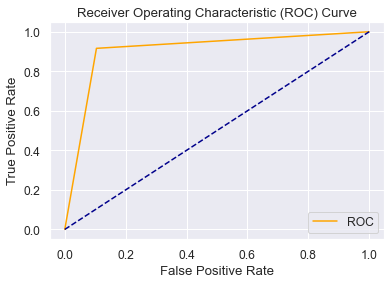

Area under the curve:  0.9060146618886195


In [340]:
# Loading the probability values for positive class
y_prob = logit.predict_proba(X_train1)[:,1]

# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_train1, lgtune_pred1, pos_label=1)

# Plotting the ROC curve
plot_roc_curve(fpr, tpr)

# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

**ROC Curve for Test Data**

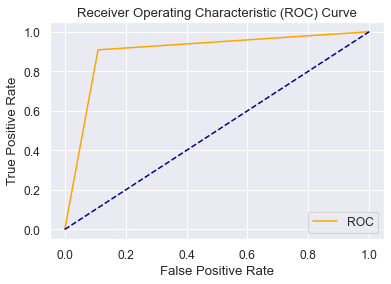

Area under the curve:  0.8996035081789469


In [341]:
# Loading the probability values for positive class
y_prob = logit.predict_proba(X_test1)[:,1]

# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test1, lgtune_pred, pos_label=1)

# Plotting the ROC curve
plot_roc_curve(fpr, tpr)

# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

**Precision-Recall curve**

Area under the curve:  0.8996035081789469
Best Threshold=1.000000, F-Score=0.901


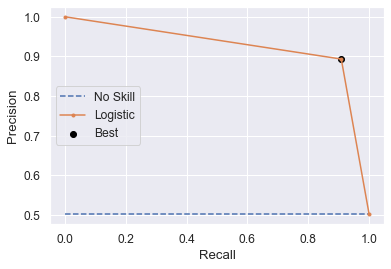

In [342]:
from sklearn.metrics import precision_recall_curve
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

# Calculating the Precision, Recall and the threshold values
precisionz1, recallz1, thresholdsz1 = precision_recall_curve(y_test1, lgtune_pred)

# Calculate the f score for all threshold values
fscorez1 = (2 * precisionz1 * recallz1) / (precisionz1 + recallz1)

# Locate the index of the largest f score
ixz1 = np.argmax(fscorez1)

# Display the Best cutoff point based on the best f score
print('Best Threshold=%f, F-Score=%.3f' %(thresholdsz1[ixz1], fscorez1[ixz1]))

# Plot the precision-recall curve for the model
no_skillz1 = len(y_test1[y_test1==1]) / len(y_test1)
plt.plot([0,1], [no_skillz1,no_skillz1], linestyle='--', label='No Skill')
plt.plot(recallz1, precisionz1, marker='.', label='Logistic')
plt.scatter(recallz1[ixz1], precisionz1[ixz1], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [343]:
# Create and display the dataframe of all metric values
df_scores7 = pd.DataFrame({'precision' : pd.Series(precisionz1),
                    'recall' : pd.Series(recallz1), 
                    'fscore' : pd.Series(fscorez1), 
                    'thresholds' : pd.Series(thresholdsz1)})
df_scores7

,precision,recall,fscore,thresholds
0,0.501481,1.000000,0.667982,0.0
1,0.893246,0.908419,0.900769,1.0
2,1.000000,0.000000,0.000000,NaN


**Root mean square error (RMSE) for Train Data**

In [344]:
mse = mean_squared_error(y_train1, lgtune_pred1)
rmse = sqrt(mse)
print("Root mean square error for Train Data is",rmse)

Root mean square error for Train Data is 0.3065910870087663


**Root mean square error (RMSE) for Test Data**

In [345]:
mse = mean_squared_error(y_test1, lgtune_pred)
rmse = sqrt(mse)
print("Root mean square error for Test Data is",rmse)

Root mean square error for Test Data is 0.31681283176407227


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.4.2 Naive Bayes Hyperparameter Tuning
    

In [346]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train1, y_train1)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [347]:
print("Tuned Naive Bayes Parameters: {}".format(nbModel_grid.best_estimator_))

Tuned Naive Bayes Parameters: GaussianNB(var_smoothing=6.579332246575683e-06)


In [348]:
nbtune_pred1 = nbModel_grid.predict(X_train1)

In [349]:
nbtune_pred = nbModel_grid.predict(X_test1)

**Accuracy**

In [350]:
print('Accuracy on Train data:',accuracy_score(y_train1, nbtune_pred1))
print('Accuracy on Test data:',accuracy_score(y_test1, nbtune_pred))

Accuracy on Train data: 0.8691648142267386
Accuracy on Test data: 0.8562962962962963


**Confusion Matrix of train data**

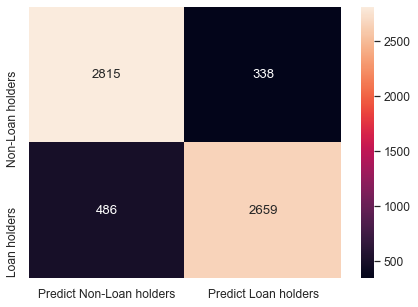

In [351]:
sns.set(font_scale=1.1)
cm = confusion_matrix(y_train1, nbtune_pred1, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Predict Non-Loan holders","Predict Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

True Positives (TP): we correctly predicted "Bottom right" True positives (Loan holders to Predict Loan holders)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Non-Loan holders to Predict Non-Loan holders)

False Positives (FP): we incorrectly predicted "Bottom left" False Postivies (a "Type I error") that means the samples we predicted as Non-Loan holders were actually Loan holders

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the samples we predicted as Loan holders were Non-Loan holders.

* In this, about 5474 were predicted correctly and 824 were incorrectly predicted out of 6298. That is about 86.91% accurate and 13.08% inaccurate.

**Confusion Matrix of test data**

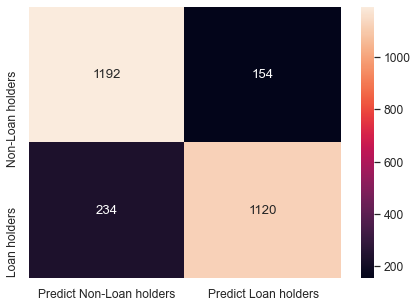

In [352]:
sns.set(font_scale=1.1)
cm = confusion_matrix(y_test1, nbtune_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Predict Non-Loan holders","Predict Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

True Positives (TP): we correctly predicted "Bottom right" True positives (Loan holders to Predict Loan holders)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Non-Loan holders to Predict Non-Loan holders)

False Positives (FP): we incorrectly predicted "Bottom left" False Postivies (a "Type I error") that means the samples we predicted as Non-Loan holders were actually Loan holders

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the samples we predicted as Loan holders were Non-Loan holders.

* In this, about 2312 were predicted correctly and 388 were incorrectly predicted out of 2700. That is about 85.62% accurate and 14.37% inaccurate.

**Classification Report of Train Data**

In [353]:
print("classification  Matrix:\n",classification_report(y_train1,nbtune_pred1))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      3153
         1.0       0.89      0.85      0.87      3145

    accuracy                           0.87      6298
   macro avg       0.87      0.87      0.87      6298
weighted avg       0.87      0.87      0.87      6298



**Classification Report of Test Data**

In [354]:
print("classification  Matrix:\n",classification_report(y_test1,nbtune_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1346
         1.0       0.88      0.83      0.85      1354

    accuracy                           0.86      2700
   macro avg       0.86      0.86      0.86      2700
weighted avg       0.86      0.86      0.86      2700



**ROC Curve for Train Data**

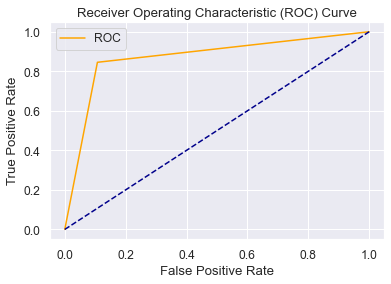

Area under the curve:  0.869134752931697


In [355]:
# Loading the probability values for positive class
y_prob = nbModel_grid.predict_proba(X_train1)[:,1]

# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_train1, nbtune_pred1, pos_label=1)

# Plotting the ROC curve
plot_roc_curve(fpr, tpr)

# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

**ROC Curve for Test Data**

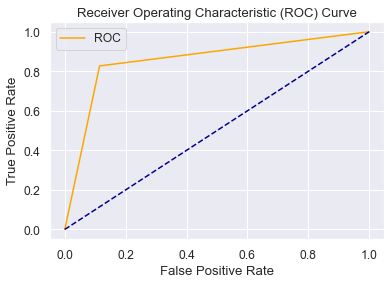

Area under the curve:  0.8563828269548595


In [356]:
# Loading the probability values for positive class
y_prob = nbModel_grid.predict_proba(X_test1)[:,1]

# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test1, nbtune_pred, pos_label=1)

# Plotting the ROC curve
plot_roc_curve(fpr, tpr)

# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

**Precision-Recall curve**

Area under the curve:  0.8563828269548595
Best Threshold=1.000000, F-Score=0.824


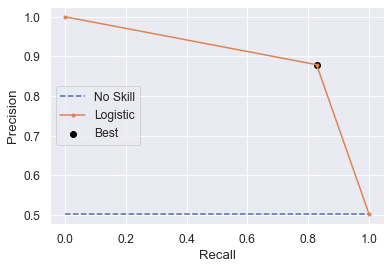

In [357]:
from sklearn.metrics import precision_recall_curve
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

# Calculating the Precision, Recall and the threshold values
precisionx1, recallx1, thresholdsx1 = precision_recall_curve(y_test1, nbtune_pred)

# Calculate the f score for all threshold values
fscorex1 = (2 * precisionx1 * recallx1) / (precisionx1 + recallx1)

# Locate the index of the largest f score
ixx1 = np.argmax(fscorex1)

# Display the Best cutoff point based on the best f score
print('Best Threshold=%f, F-Score=%.3f' %(thresholdsx[ixx1], fscorex[ixx1]))

# Plot the precision-recall curve for the model
no_skillx1 = len(y_test1[y_test1==1]) / len(y_test1)
plt.plot([0,1], [no_skillx1,no_skillx1], linestyle='--', label='No Skill')
plt.plot(recallx1, precisionx1, marker='.', label='Logistic')
plt.scatter(recallx1[ixx1], precisionx1[ixx1], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [358]:
# Create and display the dataframe of all metric values
df_scores6 = pd.DataFrame({'precision' : pd.Series(precisionx1),
                    'recall' : pd.Series(recallx1), 
                    'fscore' : pd.Series(fscorex1), 
                    'thresholds' : pd.Series(thresholdsx1)})
df_scores6

,precision,recall,fscore,thresholds
0,0.501481,1.000000,0.667982,0.0
1,0.879121,0.827179,0.852359,1.0
2,1.000000,0.000000,0.000000,NaN


**Root mean square error (RMSE) for Train Data**

In [359]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train1, nbtune_pred1)
rmse = sqrt(mse)
print("Root mean square error for Train Data is",rmse)

Root mean square error for Train Data is 0.3617114675722369


**Root mean square error (RMSE) for Test Data**

In [360]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test1, nbtune_pred)
rmse = sqrt(mse)
print("Root mean square error for Test Data is",rmse)

Root mean square error for Test Data is 0.37908271353848844


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.5.3 Comments for model selection

## Logistic Regression Classification Model

<font size="3">• The model selection is critically chosen based on Precision,Recall, f1-score, AUC values, because when hypertuning Logistic Regression model which is a classification model, we dont rely on accuracy. </font>

<font size="3">• In this case, the datatype was balanced via target balancing with SMOTE analysis so that the data is not underfit.</font>

<font size="3">• The reason why this model after hyperparameter tuning is the best, is because of the following:</font>

<font size="3">**A) Before Hyperparameter Tuning:**</font>

<font size="3">  1) Accuracy = 0.897</font>

<font size="3">  2) Precision = 0.895</font>

<font size="3">  3) Recall = 0.901</font>

<font size="3">  4) F-Score = 0.898</font>

<font size="3">  5) Area under the curve value (from ROC) = 0.8996</font>
  
<font size="3">  6) RMSE = 0.319</font>

<font size="3">  7) 2424 were predicted correctly and 276 were incorrectly predicted out of 2700. That is about 89.77% accurate and 10.22% inaccurate</font>
  
  
<font size="3">**B) After Hyperparameter Tuning:**</font>
  
<font size="3">  1) Accuracy = 0.899</font>

<font size="3">  2) Precision = 0.893</font>

<font size="3">  3) Recall = 0.908</font>

<font size="3">  4) F-Score = 0.900</font>

<font size="3">  5) Area under the curve value (from ROC) =  0.8996</font>
  
<font size="3">  6) RMSE = 0.316</font>

<font size="3">  7)  2429 were predicted correctly and 271 were incorrectly predicted out of 2700. That is about 89.96% accurate and 10.03% inaccurate.</font> 
  

<font size="3">• In Hyperparameter Tuning, the various Hyperparameters used to improve the model were : C, K-fold Cross validation splitting strategy (cv), solver, class_weight</font>

<font size="3">• In that, the following settings were C = 0.43939, K-fold Cross validation (cv) = 5, solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'class_weight': ['balanced'], n_jobs = -1.</font>

<font size="3">**Explanation of each Hyperparamter:**</font>

<font size="3">  a) C is the The trade-off parameter of logistic regression that determines the strength of the regularization and higher values of C correspond to less regularization (where we can specify the regularization function).C is actually the Inverse of regularization strength(lambda) </font>
  
<font size="3">  b) K-fold cross validation splitting strategy (cv) compares multiple hyperparameter with the model and in this case splits  i into 5 different models with different hyperparameter values etc.</font>
  
<font size="3">  c) solver is an algorithm to use in the optimization problem.</font>

><font size="3">liblinear − It is a good choice for small datasets. It also handles L1 penalty. For multiclass problems, it is limited to one-versus-rest schemes.</font>

><font size="3">newton-cg − It handles only L2 penalty.</font>

><font size="3">lbfgs − For multiclass problems, it handles multinomial loss. It also handles only L2 penalty.</font>

><font size="3">saga − It is a good choice for large datasets. For multiclass problems, it also handles multinomial loss. Along with L1 penalty, it also supports ‘elasticnet’ penalty.</font>

><font size="3">sag − It is also used for large datasets. For multiclass problems, it also handles multinomial loss.</font>
  
<font size="3">  d) class_weight represents the weights associated with classes. If we use the default option, it means all the classes are supposed to have weight one. On the other hand, if you choose class_weight: balanced, it will use the values of y to automatically adjust weights.</font>
  
<font size="3">• This model has been tuned with all the features, hyperparameters, and libraries available. </font>

<font size="3"><b>Reason why this is the best hypertuned model for Logistic Regression Classifier</b> </font>
        
<font size="3">1) 0.2% increase in accuracy</font>
    
<font size="3">2) 0.7% increase in Recall</font>

<font size="3">3) 0.2% increase in F-Score</font>

<font size="3">4) 0.3% decrease in RMSE (Root mean square error)</font>

## Naive Bayes Classification Model

<font size="3">• The model selection is critically chosen based on Precision,Recall, f1-score, AUC values, because when hypertuning Naive Bayes model which is a classification model, we dont rely on accuracy. </font>

<font size="3">• In this case, the datatype was balanced via target balancing with SMOTE analysis so that the data is not underfit.</font>

<font size="3">• The reason why this model after hyperparameter tuning is the best, is because of the following:</font>

<font size="3">**A) Before Hyperparameter Tuning:**</font>

<font size="3">  1) Accuracy = 0.830</font>

<font size="3">  2) Precision = 0.862</font>

<font size="3">  3) Recall = 0.788</font>

<font size="3">  4) F-Score = 0.823</font>

<font size="3">  5) Area under the curve value (from ROC) = 0.856</font>
  
<font size="3">  6) RMSE = 0.411</font>

<font size="3">  7) 2243 were predicted correctly and 457 were incorrectly predicted out of 2700. That is about 83.07% accurate and 16.92% inaccurate.</font>
  
  
<font size="3">**B) After Hyperparameter Tuning:**</font>
  
<font size="3">  1) Accuracy = 0.8562</font>

<font size="3">  2) Precision = 0.879</font>

<font size="3">  3) Recall = 0.827</font>

<font size="3">  4) F-Score = 0.852</font>

<font size="3">  5) Area under the curve value (from ROC) = 0.856</font>
  
<font size="3">  6) RMSE = 0.379</font>

<font size="3">  7)  2312 were predicted correctly and 388 were incorrectly predicted out of 2700. That is about 85.62% accurate and 14.37% inaccurate.</font> 
  
<font size="3">• In Hyperparameter Tuning, the various Hyperparameters used to improve the model were : var_smoothing, K-fold Cross validation splitting strategy (cv)</font>

<font size="3">• In that, the following settings were var_smoothing , K-fold Cross validation (cv) = 10, n_jobs = -1.</font>

<font size="3">**Explanation of each Hyperparamter:**</font>

<font size="3">  a) var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean. In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples. </font>
  
<font size="3">  b) K-fold cross validation splitting strategy (cv) compares multiple hyperparameter with the model and in this case splits  i into 10 different models with different hyperparameter values etc.</font>
  
<font size="3">• This model has been tuned with all the features, hyperparameters, and libraries available. </font>

<font size="3"><b>Reason why this is the best hypertuned model for Naives Bayes Classifier</b> </font>
        
<font size="3">1) 2.6% increase in accuracy</font>
    
<font size="3">2) 1.7% increase in Precision</font>

<font size="3">2) 3.9% increase in Recall </font>

<font size="3">3) 2.9% increase in F-Score</font>

<font size="3">4) 3.2% decrease in RMSE (Root mean square error)</font>

<font size="4"> <b>Out of the two classifiers</b> : Logistic Regression and Naive Bayes.</font>

<font size="4">Logistic Regression Classifer has better accuracy, precision, recall, F-score and RMSE than Naive Bayes Classifier. Hence, that is the ideal Classifier preferred for this dataset.</font>

<font size="5"><p style="color:black"> <b> 6. Conclusion and improvisation:</p></font>



<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 6.1 Write your conclusion on the results.

<font size="3">• The conclusion for the results are as follows:</font>

<font size="3"><b>1) Import and warehouse data:</b>

The conclusion for Import and warehouse data is, importing of the 2 datasets and compiling them to make a single dataset to get all values under one dataset. The columns/attributes had different names, so it was merged together. They had a final data shape of (5000,14)

<font size="3"><b>2) Data cleansing:</b>

The conclusion for Data cleansing is that the data was fixed for duplicate indexing, null values in the "LoanOnCard" dataset was removed as the target datatype shouldnt have null values. Some of the numerical attributes were converted to categorical attributes for better processing 'HiddenScore','Level','Security','FixedDepositAccount','InternetBanking', 'LoanOnCard', 'ZipCode'. Also, ZipCode was checked for and the 'County' for these zip codes were determined. "ID" column was dropped before analysis as we cannot draw any inference from that attribute, its only a unique identifier of the dataset. </font>
    
<font size="3"><b>3) Data analysis & visualisation:</b></font>
    
The conclusion for Data analysis & visualisation is as follows,

<font size="3"><p style="color:blue"><b>a)</b> Univariate analysis: </p>
    
I) we have observed that the dataset's structure is bimodal in nature, which means, it has two modes. This would mean that, it follows Chebyshevs rule, 1-1/K, here, K=2. mean ± 2 standard deviations 
    
II) We observed that, the count of the following attributes is as follows:
    
>Hidden Score 1 > Hidden Score 2 > Hidden Score 4 > Hidden Score 3 in count
    
>Level 1 > Level 3 > Level 2 in count
    
>Security (0) > Secuiry (1)
    
>FixedDepositAccount (0) > FixedDepositAccount (1) in count
    
>Internet Banking (1) > Internet Banking (0) in count
    
>Credit card (0) > Credit Card (1) in count
    
>LoanOnCard (0) > LoanOnCard (1) in count
    
>Bay Area > Southern > Los Angeles Region > Central > Superior in count
    
III) These are the various categories/attributes present in the dataset, we found that, they have:   
    
>Age= 0 outliers,Left skewed or Negative Skewness and peak with high depression
    
>CustomerSince = 0 outlier,Left skewed or Negative Skewness and peak with high depression
    
>HighestSpend = 96 outliers,Right skewed or Postive Skewness and peak with moderate depression
    
>MonthlyAverageSpend = 324 outliers,Right skewed or Postive Skewness and peak with extremely high sharpness
    
>Mortgage = 291 outlierS,Right skewed or Postive Skewness and peak with extremely high sharpness
    
>Total = 711 outliers</font>
    
<font size="3"><p style="color:blue"><b>b)</b> Bivariate analysis:</p> 
    
I) From barplot between numerical and categorical, we have observed:
    
> Bank prioritizes Hidden score 1 > Hidden score 2 > Hidden score 3 > Hidden score 4. The Hidden score seems to be credit scores which is a number that is calculated based on credit information collected by bank, so that lenders use this to assess the risk based on this score, and will accordingly charge interest rate when loaning money.

>Bank prioritizes level 1 > level 2 > level 2 > level 3. These are priority levels.
    
>when a customer leaves security assets with the bank, they have slightly higher expenditure monthly and would take more loans but lower maximum expenditure and vice versa for without security assets with the bank. The bank is benefitted with customers with security assets (1) rather than customers without security assets (0)
 
>when a customer has a FixedDepositAccount with the bank, they have higher maximum expenditure, higher expenditure monthly and would take more loans with the bank in comparison to customer without FixedDepositAccount with the bank. Bank is benefitted by the customers with FD (1) than without FD (0).
   
>when a customer has a InternetBanking with the bank, they have higher maximum expenditure, same expenditure monthly and would take fewer loans with the bank in comparison to customer without InternetBanking with the bank. Bank is benefitted by the customers with IB (1) than without IB (0) in max expenditure alone but customers without IB would take mortgage which would benefit the bank too. Hence, both are of equivalent weightage to the bank.
    
>when a customer has a Creditcard with the bank, they have lower maximum expenditure, same expenditure monthly and would take fewer loans with the bank in comparison to customer without Creditcard with the bank. Bank is benefitted by the customers without CredCd (0) than with CredCd (0) as they will get more maximum expenditures and more loans from customers without creditcards. However, this will all vary from person to person, based on their credit score.
    
>when a customer has a LoanonCard with the bank, they have higher maximum expenditure, higher monthly expenditure and would take more loans with the bank in comparison to customer without LoanonCard with the bank. Bank is benefitted by the customers with loan (1) than without loan (0) as they will get more maximum expenditures, monthly expenditure and more loans from customers with loan on cards.
    
> Expenditure : LOS ANGELES > SOUTH > BAY AREA > SUPERIOR > CENTRAL and Loan : SUPERIOR > CENTRAL > SOUTH > LOS ANGELES > BAY AREA

II) barplot with 2 categorical and 1 numerical attribute where hue = "LoanOnCard"

>Hidden score 2 and 4 has higher proportion of aged customers with loan and Hidden score 1 and 3 higher proportion of aged customers without loan. Hidden score 2 and 4 has higher proportion of older customers with loan and Hidden score 1 and 3 higher proportion of older customers without loan. All hidden scores are favouring loan for customers with highest max expenditure, average monthly expenditure and mortgage than without loan.
    
>level 1 higher proportion of aged customers with loan while level 2 and 3 have higher proportion of aged customers without loan. level 1 higher proportion of older customers with loan while level 2 and 3 have higher proportion of older customers without loan. All levels are favouring loan for customers with highest max expenditure, average monthly expenditure and mortgage than without loan.
    
>Both with and without security of asset, theres higher proportion of aged customers without loan. Both with and without security of asset, theres higher proportion of older customers without loan. For with and without security it is favouring loan for customers with highest max expenditure, average monthly expenditure and mortgage than without loan.
    
>Customers with FD have a higher proportion of aged customers with loan and for customers without FD, theres higher proportion of aged customers without loan. For customers with FD, theres a higher proportion of older customers with loan and for customers without FD, theres higher proportion of older customers without loan. For with and without FixedDeposits it is favouring loan for customers with highest max expenditure, average monthly expenditure and mortgage than without loan.
    
>Both with and without Internet Banking, theres higher proportion of aged customers without loan. For customers with Internet Banking, theres a higher proportion of older customers with loan and for customers without Internet Banking, theres higher proportion of older customers without loan. For with and without Internet Banking it is favouring loan for customers with highest max expenditure, average monthly expenditure and mortgage than without loan. 
    
>Customers with credit card have a higher proportion of older customers with loan and without loan while the customers without credit card have a higher proportion of older customers without loan. For customers with credit card, theres a higher proportion of older customers with loan and without loan while the customers without credit card have a higher proportion of older customers without loan. For with and without Credit Card it is favouring loan for customers with highest max expenditure, average monthly expenditure and mortgage than without loan.
    
>In Southern, Bay area and Central the higher proportion of older customers dont have loan. While in Los Angeles and Superior Region, the higher proportion of older customers have loan. In Southern, Bay area and Central the higher proportion of older customers dont have loan. While in Los Angeles and Superior Region, the higher proportion of older customers have loan. For all regions it is favouring loan for customers with highest max expenditure, average monthly expenditure and mortgage than without loan. </font>
    
<font size="3"><p style="color:blue"><b>c)</b> Multivariate analysis:</p>
    
From Correlation heatmap:
    
>Age and CustomerSince are extremely correlated. hence, we can drop either one.

>HighestSpend has high correlation with MonthlyAverageSpend

>Mortgage and HighestSpend have low correlation with each other.

>Rest of the variables do not have any relation.    
    
    
<font size="3"><b>4) Data pre-processing: </b></font>
    
<font size="3"> I) Hypothesis testing to remove non impactful attributes, we check numerical attribute with t test and remove 'Age' and 'CustomerSince' as they are insignificant for target variable. Using Chi squared test, we remove categorical attributes such as'ZipCode', 'CreditCard', 'InternetBanking', 'Security', 'County', and 'Regions'. As they're insignificant for modelling. Also outlier treatment is not performed as most of these outliers are not computational errors and are from a real dataset, so these values would be applicable in real life scenario, so they should not be removed.
    
II) The Dataset with the model is now divied for predictor and target. Here the predictor would be the attributes HighestSpend, HiddenScore, MonthlyAverageSpend, Level, Mortgage, and FixedDepositAccount. While the target attribute would be LoanOnCard. 
    
III) After the predictor and target attribute were determined, the dataset is verified on whether it has imbalances so target balancing. The target balancing is performed in the dataset to balance out the target attributes so that the prediction is not based off the highest occuring class category. 
    
>a) In this case, Barplot to see distribution of Target attribute "LoanOnCard(0)" and "LoanOnCard(1)", here the "LoanOnCard(0)" has 90.4% and "LoanOnCard(1)" has only 9.6%. , so majority of the data would assume "LoanOnCard". Where LoanOnCard 0 = 4499 and LoanOnCard 1 = 480 .
    
>Degree of imbalance Proportion of Minority Class <b>(Citation: Arora, Nisha. (2021). Re: How to know that our dataset is imbalance?)</b>.      
    
If minority is within this percentage, then it is considered as :    
    
mild ---> 20-40% of the data set
    
Moderate ---> 1-20% of the data set
    
Extreme ---> less than 1% of the data set 
 
In this case, the class attribute is Moderately imbalanced at 9.6% (between 1-20%) and the dataset should be balanced. In this case, we're using SMOTE analysis for the balancing and we oversampled the data to prevent any loss of data from the model. 
    
<font size="3"><b>5) Perform train-test split </b></font>  
    
Now train-test split is performed with the oversampled data x_s and y_s. The shape for the dataset is (6289,6) for train set and (2700,6) for test set.    
    
<font size="3"><b>6) Model training, testing and tuning: </b></font>   
    
Model is fitted, trained and tuned with Logistic Regression and Naive Bayes Classification model.
    
font size="3"><b>7) Display the classification accuracies for train and test data. </b></font>  

The Classification accuracies for Logistic Regression and Naive Bayes are as follows:
    
>Logisic Regression =  Train: 0.902, Test: 0.897;  

>Naive Bayes = Train: 0.845, Test: 0.830.
    
<font size="3"><b>Display and explain the classification report in detail</b></font> 

<font size="4"><p style="color:red"> Logistic Regression Classifier</p></font>     
    
The model is now checked for the precision, recall, f-score, confusion matrix, ROC curve's AUC, and RMSE
    
>Accuracy = 0.897

>Precision = 0.895

>Recall = 0.901

>F-Score = 0.898

>Area under the curve value (from ROC) = 0.8996
  
>RMSE = 0.319

>2424 were predicted correctly and 276 were incorrectly predicted out of 2700. That is about 89.77% accurate and 10.22% inaccurate
    
<font size="4"><p style="color:red"> Naive Bayes Classifier</p></font>   

The model is now checked for the precision, recall, f-score, confusion matrix, ROC curve's AUC, and RMSE

>Accuracy = 0.830

>Precision = 0.862

>Recall = 0.788

>F-Score = 0.823

>Area under the curve value (from ROC) = 0.856
  
>RMSE = 0.411

>2243 were predicted correctly and 457 were incorrectly predicted out of 2700. That is about 83.07% accurate and 16.92% inaccurate.    

<font size="3"><b> 7) Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model</b></font>   
    
<font size="4"><p style="color:red">Logistic Regression Classifier</p></font>
    
I) Using GridsearchCV library, we have used all the tuning techniques and Hyperparameters available to create the best model for this classifier. The following are the Hyperparameters used to improve the model : C, K-fold Cross validation splitting strategy (cv), solver, class_weight. In that, the following settings were C = 0.43939, K-fold Cross validation (cv) = 5, solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'class_weight': ['balanced'], n_jobs = -1.</font>
     
II) After the Hyperparamter tuning, we have observed the following:
    
>Accuracy = 0.899

>Precision = 0.893

>Recall = 0.908

>F-Score = 0.900

>Area under the curve value (from ROC) =  0.8996
  
>RMSE = 0.316

>2429 were predicted correctly and 271 were incorrectly predicted out of 2700. That is about 89.96% accurate and 10.03% inaccurate.
    
III) Reason why this is the best hypertuned model for Logistic Regression Classifier
        
1) 0.2% increase in accuracy
    
2) 0.7% increase in Recall

3) 0.2% increase in F-Score

4) 0.3% decrease in RMSE (Root mean square error)
    
These factors highlight the reason for the model to be the best tuned model for Logistic Regression Classifier.
    
<font size="4"><p style="color:red"> Naive Bayes Classifier </p></font>
    
I) Using GridsearchCV library, we have used all the tuning techniques and Hyperparameters available to create the best model for this classifier. The following are the Hyperparameters used to improve the model :var_smoothing, K-fold Cross validation splitting strategy (cv). In that, the following settings were var_smoothing , K-fold Cross validation (cv) = 10, n_jobs = -1.
    
II) After the Hyperparamter tuning, we have observed the following:
    
>Accuracy = 0.8562

>Precision = 0.879

>Recall = 0.827

>F-Score = 0.852

>Area under the curve value (from ROC) = 0.856
  
>RMSE = 0.379
    
>2312 were predicted correctly and 388 were incorrectly predicted out of 2700. That is about 85.62% accurate and 14.37% inaccurate.
    
III) Reason why this is the best hypertuned model for Naive Bayes Classifier
    
1) 2.6% increase in accuracy
    
2) 1.7% increase in Precision

2) 3.9% increase in Recall

3) 2.9% increase in F-Score

4) 3.2% decrease in RMSE (Root mean square error)
 
These factors highlight the reason for the model to be the best tuned model for Naive Bayes Classifier.

<font size="4"> <b>Out of the two classifiers</b> : Logistic Regression and Naive Bayes.</font>

<font size="4">Logistic Regression Classifer has better accuracy, precision, recall, F-score and RMSE than Naive Bayes Classifier. Hence, that is the ideal Classifier preferred for this dataset.</font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 6.2 Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points
collected by the research team to perform a better data analysis in future.

<font size="4">Three datasets with 13 features/attributes and 1 target attribute was provided for data analysis and data modelling.</font>
    
<font size="4">I)"Part2 - Data1.csv"</font>

<font size="4">II)"Part2 - Data2.csv" </font>
    
<font size="4">The detailed suggestions/improvements on the data points collected are the following:
    
<b>1) Quality of the dataset</b>
    
The data collection methods needs to be improved as the data had missing values in the Target Attribute "LoanOnCard", hence it had to be removed from the dataset. Also instead of having two separate datasets, there couldve been one dataset which was pre processed and selected for data analysis. The issue that occured was that, there were duplicate index which resulted in misarrangment of data.
    
<b>a)</b> The quality of the dataset can be improved by collecting information without any missing values or should be complete/comprehensive.
    
<b>b)</b> The consistency of the dataset should be the same and no room for manual errors as that would deviate the interpretation/inference.
    
<b>c)</b> The data should be accurate and should match with the actual observation.
    
<b>d)</b> The dataset didn't have much information about the attributes mentioned beforehand,

•This made it harder to understand and interpret the data. As the attributes cannot be associated with each other in any other way except statistically and computationally. More information on the attributes would help understand how each attribute would play a role in contributing to the 'LoanOnCard' target attribute. 
    
<b>e)</b>The domain for the dataset was declared to be "Banking and Finance" and the "Loan Dataset" was part of data description, the 'LoanOnCard' was then understood to have relationship with several attributes via correlation. 
    
<b>f)</b> The timeframe for recording the data can be given which will give a point of reference and will give more inference.
    
</font>

<font size="4"><b> 2) Quantity of the dataset</b>

•In datacollection, the quantity of the data is looked at as the most important factor as the more the quantity of the data, the more information that can be interpreted, hence, when looking at data quantity, more attributes, even meaningless information can be added which can be correlated with statistics and can potentially give inference.
    
•The quantity should be there for the data but if the data is inaccurate or is not valid then the whole data analysis step becomes a waste of time. Hence, the priority should be to obtain consistent data regardless of quantity, and if accurate and large quanitity data is brought, we can understand hidden patterns and model it for improving business etc. </font>

<font size="4"><b> 3) Variety of the dataset</b>
    
•The dataset only had 13 features with which we had to predict the target attribute with. However, with more number of attributes, the more the accuracy and better the data balance. In this case, the target attribute 'LoanOnCard' was imbalanced and was in the ratio 90:10 which needed to be oversampled to balance the dataset before processing.
    
•It can be improved with more number of data and  attributes with weightage, more the accuracy. This would result in giving better predictive outputs with higher accuracy. </font>

<font size="4"><b> 4) Velocity of the dataset</b> 

The datasets in this project is definitely a high velocity dataset because data has over 5000 rows and 14 columns/attributes. However, the high velocity datasets are always not the best, even though the data is automated, small errors or deviations can lead to predicting a completely different result. Thats why data velocity also matters. </font>

<font size="4"><b> 5) Veracity of the dataset</b> 
    
•The veracity is the most important aspect in the dataset which addresses Quality, quanity, varienty and velocity of the data. The veracity is the accuracy of the data, where the information should make sense and should be able to give expected results. The main purpose of veracity is the analysis of dataset before submitting it, it is checked on whether the data has missing, duplicates, null, irrelevant values and filtered out. 
    
•The accuracy of the dataset can be predicted using Machine Learning Algorithms, the accuracy would be prediction of a target class and this prediction would help understand hidden patterns for the dataset. However, there are limitations to this as well, if the data or input information is inaccurate, the output accuracy would not matter at all. This could be very expensive in case it is part of business requirements.

<font size="4"><p style="color:green"> The above points are both the improvements as well as the ideal ways for data processing, which is an essential part of data analysis and data modelling </font>